## **IS 737: Credit Card Default Rate**
**Team 6:** Jose Portillo Lopez, Karan Vyas, Partth Gajanan Ghayal, Tharun Patteti

# Backgroud 
## **Objective** 
Our main objective of this project is to find the best machine learning model that predicts the likelihood a customer will default on their credit loan while dealing with our imbalanced data.

## **Problem** **Background**

The product team has asked us to help them predict what type of customers are likely to default in the future given historical trends. They have provided a clean dataset with various customer demographics, and a 'target' indicator of customers who have defaulted on their loans in the past.
       
**They’re** hoping to use this information to establish early intervention strategies and decrease approval rates and credit limits for low performing segments. 
       
They warned us that less than 1/2 a percent of customers have defaulted on their loans.





# Data Definitions
#### Data source: https://www.kaggle.com/datasets/laotse/credit-card-approval

| **Feature Name**| **Description** |
| --- | --- | 
|ID|Client Number|
|CODE_GENDER|Gender|
|FLAG_OWN_CAR|Is there a car|
|FLAG_OWN_REALTY|Is there a property|
|CNT_CHILDREN|Number of Children|
|AMT_INCOME_TOTAL|Annual Income|
|NAME_EDUCATION_TYPE|Education Level|
|NAME_FAMILY_STATUS|Marital Status|
|NAME_HOUSING_TYPE|Way of Living|
|DAYS_BIRTH|Age in days|
|DAYS_EMPLOYED|Duration of work in days|
|FLAG_MOBIL|Is there a mobile phone|
|FLAG_WORK_PHONE|Is there a work phone|
|FLAG_PHONE|Is there a phone|
|FLAG_EMAIL|Is there an email|
|JOB|Job Description|
|BEGIN_MONTHS|Record month: The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on|
|STATUS|Status: 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month|
|TARGET|Target: Risk user are marked as '1', else are '0'|


### To run the report: 
###### 1) Import the following packages. 
###### 2) Update the location of the credit card dataset to where it's currently saved.
###### 3) Review the notes throughout the document.

# IMPORT LIBRARIES

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [276]:
# Connect to the google drive where project and data are saved.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
# data_df = pd.read_csv('/content/drive/MyDrive/MK842_project/credit_card_approval.csv')
# data_df = pd.read_csv('/content/drive/MyDrive/QST_737/Project/credit_card_approval.csv')
# data_df = pd.read_csv('/content/drive/MyDrive/IS737/IS737 Final Project/credit_card_approval.csv')
data_df = pd.read_csv('/content/drive/MyDrive/credit_card_approval.csv')

In [278]:
data_df.head(3)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN  \
0  5065438           F            Y               N  2+ children   
1  5142753           F            N               N  No children   
2  5111146           M            Y               Y  No children   

   AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          270000.0  Secondary / secondary special               Married   
1           81000.0  Secondary / secondary special  Single / not married   
2          270000.0               Higher education               Married   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0       With parents      -13258          -2300           1                0   
1  House / apartment      -17876           -377           1                1   
2  House / apartment      -19579          -1028           1                0   

   FLAG_PHONE  FLAG_EMAIL                    JOB  BEGIN_MONTHS STATUS  TARGET  
0           0           0               Managers            -6      C       0  
1           1           0  Private service staff            -4      0       0  
2           1           0               Laborers             0      C       0

##Exploratory Data Analysis

Explore the data and the relationship between customer characteristics and target variable.

In [279]:
data_df.shape
# shows the number of rows and columns in the dataset

(537667, 19)

In [280]:
data_df.dtypes
# Check to see how the data was imported and interpreted. Note down any columns that require changes from str to float and vice-versa. 

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN            object
AMT_INCOME_TOTAL       float64
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
JOB                     object
BEGIN_MONTHS             int64
STATUS                  object
TARGET                   int64
dtype: object

In [281]:
## check for null values in our dataset
data_df.isnull().values.any()
#there is no null value in our dataset.

False

In [282]:
##the following code describes all numerical columns in the data 

'''count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.'''

data_df.describe()

ID  AMT_INCOME_TOTAL     DAYS_BIRTH  DAYS_EMPLOYED  \
count  5.376670e+05      5.376670e+05  537667.000000  537667.000000   
mean   5.079231e+06      1.971171e+05  -15010.958999   -2762.029935   
std    4.200200e+04      1.041390e+05    3416.418092    2393.919456   
min    5.008806e+06      2.700000e+04  -24611.000000  -15713.000000   
25%    5.044925e+06      1.350000e+05  -17594.000000   -3661.000000   
50%    5.079091e+06      1.800000e+05  -14785.000000   -2147.000000   
75%    5.115755e+06      2.295000e+05  -12239.000000   -1050.000000   
max    5.150487e+06      1.575000e+06   -7489.000000     -17.000000   

       FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE     FLAG_EMAIL  \
count    537667.0    537667.000000  537667.000000  537667.000000   
mean          1.0         0.281615       0.298893       0.100730   
std           0.0         0.449787       0.457773       0.300971   
min           1.0         0.000000       0.000000       0.000000   
25%           1.0         0.000000       0.000000       0.000000   
50%           1.0         0.000000       0.000000       0.000000   
75%           1.0         1.000000       1.000000       0.000000   
max           1.0         1.000000       1.000000       1.000000   

        BEGIN_MONTHS         TARGET  
count  537667.000000  537667.000000  
mean      -19.305241       0.003649  
std        14.037827       0.060298  
min       -60.000000       0.000000  
25%       -29.000000       0.000000  
50%       -17.000000       0.000000  
75%        -8.000000       0.000000  
max         0.000000       1.000000

In [283]:
# sns.pairplot(data_df)

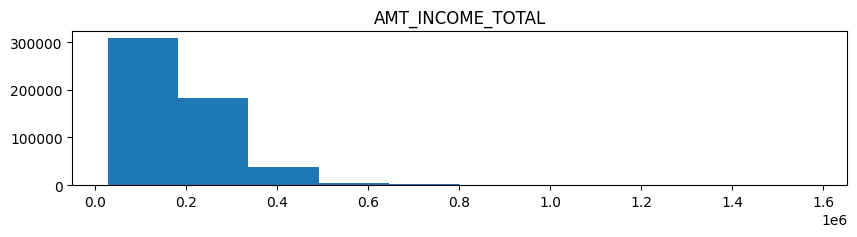

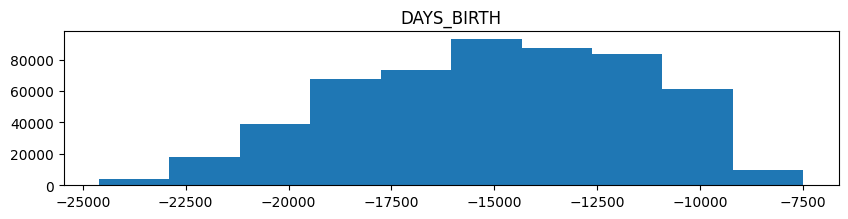

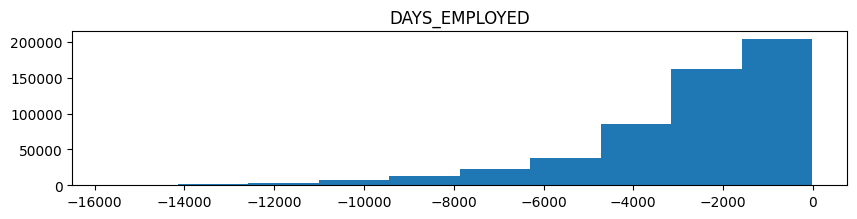

In [284]:
# plot continuous variables 
x_vars = ['AMT_INCOME_TOTAL','DAYS_BIRTH', 'DAYS_EMPLOYED']

for x in x_vars: 
  plt.figure(figsize=(10,2))
  plt.hist(data_df[x])
  plt.title(x)
  plt.show

In [285]:
## group continuous variables for visualization purposes 
## the following code converts negative numbers to positive, divides days / 365 to convert to years, and then creates equal bins by using a qcut 

data_df['Days_birth1'] = np.ceil(pd.to_timedelta(data_df['DAYS_BIRTH'], unit='D').dt.days * (-1))
#negative Days_employed means unemployed
data_df.loc[(data_df['DAYS_BIRTH'] > 0), 'Days_birth1'] = 0

data_df['years_birth'] = data_df['Days_birth1']/365
data_df['years_birth'] =data_df['years_birth'].round(0)

data_df['Birth_group'] = pd.qcut(data_df['years_birth'], q=6, duplicates='drop').astype(str)

# convert days employee to years and then groups it into 6 bins
data_df['Days_Emp'] = np.ceil(pd.to_timedelta(data_df['DAYS_EMPLOYED'], unit='D').dt.days * (-1))
#negative Days_employed means unemployed
data_df.loc[(data_df['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0

data_df['years_emp'] = data_df['Days_Emp']/365
data_df['years_emp'] =data_df['years_emp'].round(0)

data_df['YRS_EMP_GRP'] = pd.qcut(data_df['years_emp'], q=6, duplicates='drop').astype(str)

#convert income to 6 different bins 
data_df['INCOME_BUCKET'] = pd.qcut(data_df['AMT_INCOME_TOTAL'], q=6, duplicates='drop').astype(str)

data_df.head(2)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN  \
0  5065438           F            Y               N  2+ children   
1  5142753           F            N               N  No children   

   AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          270000.0  Secondary / secondary special               Married   
1           81000.0  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  DAYS_BIRTH  ...  BEGIN_MONTHS  STATUS  TARGET  \
0       With parents      -13258  ...            -6       C       0   
1  House / apartment      -17876  ...            -4       0       0   

   Days_birth1  years_birth   Birth_group  Days_Emp years_emp    YRS_EMP_GRP  \
0      13258.0         36.0  (31.0, 36.0]    2300.0       6.0     (4.0, 6.0]   
1      17876.0         49.0  (45.0, 51.0]     377.0       1.0  (-0.001, 2.0]   

           INCOME_BUCKET  
0   (225000.0, 270000.0]  
1  (26999.999, 112500.0]  

[2 rows x 26 columns]

In [286]:

x_vars = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'JOB', 
       'STATUS', 'YRS_EMP_GRP','Birth_group','INCOME_BUCKET'
      #  'AMT_INCOME_TOTAL','BEGIN_MONTHS', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
       ]

for x in x_vars: 

    print(f"\nUnique values for {x}:")
    
    unique_vals = data_df[x].unique()
    
    for val in unique_vals:
        print(val)


Unique values for CODE_GENDER:
F
M

Unique values for FLAG_OWN_CAR:
Y
N

Unique values for FLAG_OWN_REALTY:
N
Y

Unique values for CNT_CHILDREN:
2+ children
No children
1 children

Unique values for NAME_EDUCATION_TYPE:
Secondary / secondary special
Higher education
Incomplete higher
Lower secondary
Academic degree

Unique values for NAME_FAMILY_STATUS:
Married
Single / not married
Civil marriage
Separated
Widow

Unique values for NAME_HOUSING_TYPE:
With parents
House / apartment
Rented apartment
Municipal apartment
Co-op apartment
Office apartment

Unique values for FLAG_MOBIL:
1

Unique values for FLAG_WORK_PHONE:
0
1

Unique values for FLAG_PHONE:
0
1

Unique values for FLAG_EMAIL:
0
1

Unique values for JOB:
Managers
Private service staff
Laborers
Core staff
Drivers
High skill tech staff
Realty agents
Secretaries
Accountants
Sales staff
Medicine staff
Waiters/barmen staff
Low-skill Laborers
Cleaning staff
HR staff
Cooking staff
Security staff
IT staff

Unique values for STATUS:
C


Average Target: 0.0036%


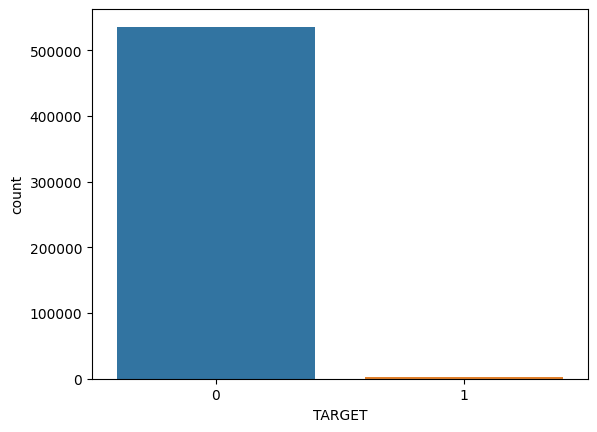

In [287]:
# count plot by target 
# 99.6% of data are 0, and remaining .4% are 1s (predictor)
avg = data_df["TARGET"].mean()
print(f"Average Target: {avg:.4f}%")

sns.countplot(data=data_df, x = data_df["TARGET"])

plt.show()
# check our target average 


In [288]:
data_df.groupby('TARGET').mean()

<ipython-input-288-9a163b6276ad>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_df.groupby('TARGET').mean()


ID  AMT_INCOME_TOTAL    DAYS_BIRTH  DAYS_EMPLOYED  \
TARGET                                                                
0       5.079189e+06     197098.929133 -15009.842324   -2764.815942   
1       5.090834e+06     202085.788991 -15315.856269   -2001.337920   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  BEGIN_MONTHS  \
TARGET                                                                      
0              1.0         0.281496    0.298653    0.100763    -19.303843   
1              1.0         0.313965    0.364424    0.091743    -19.687054   

         Days_birth1  years_birth     Days_Emp  years_emp  
TARGET                                                     
0       15009.842324    41.129286  2764.815942   7.590164  
1       15315.856269    41.949032  2001.337920   5.523445

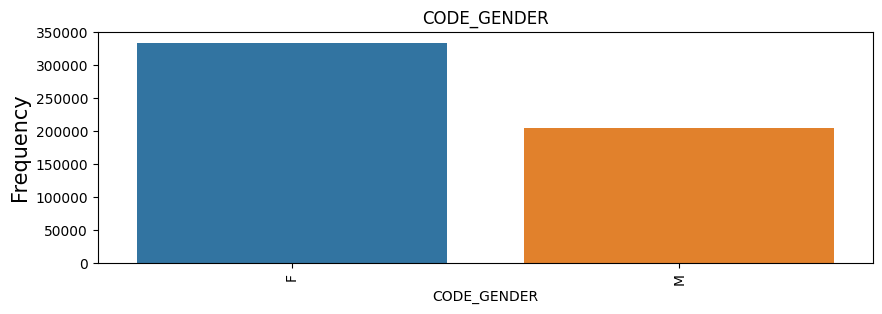

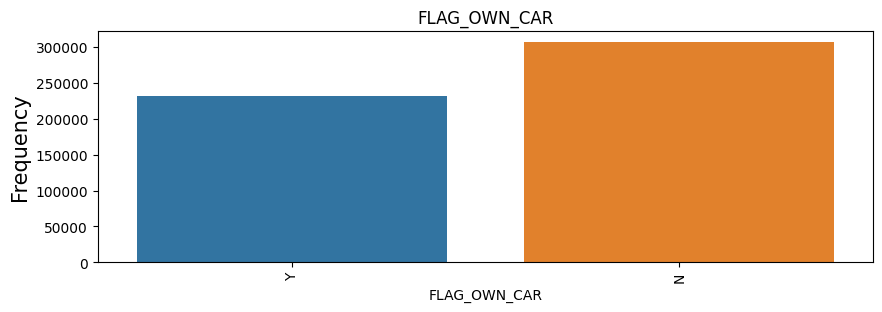

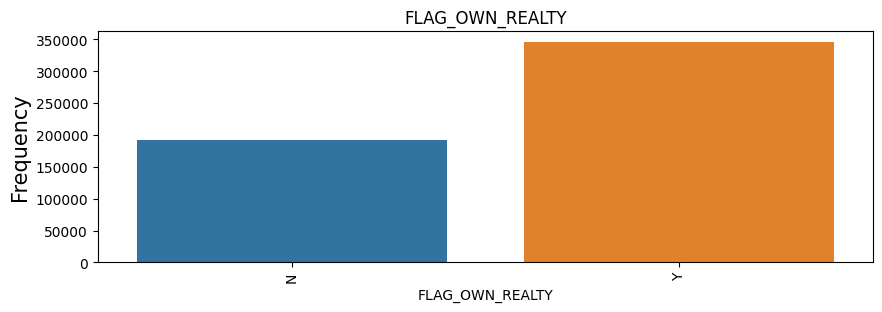

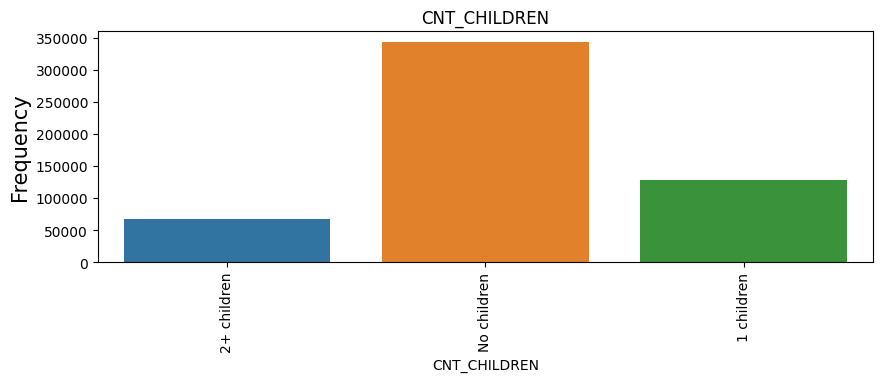

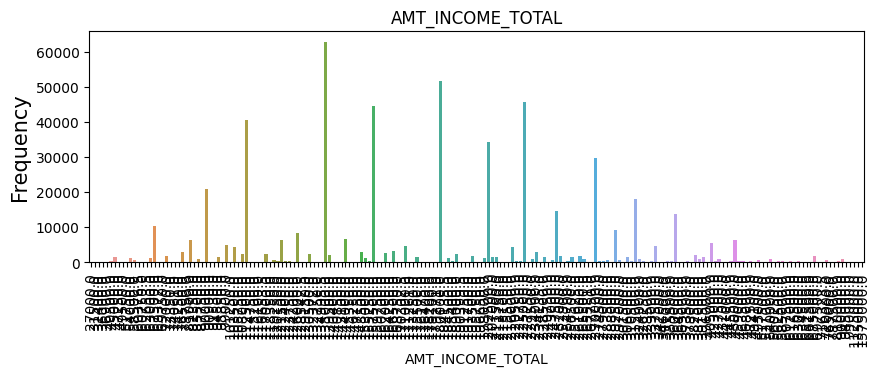

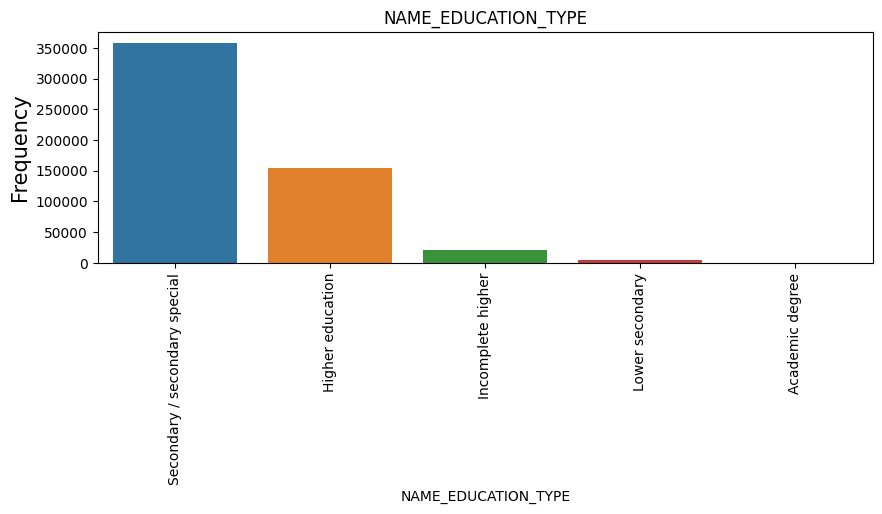

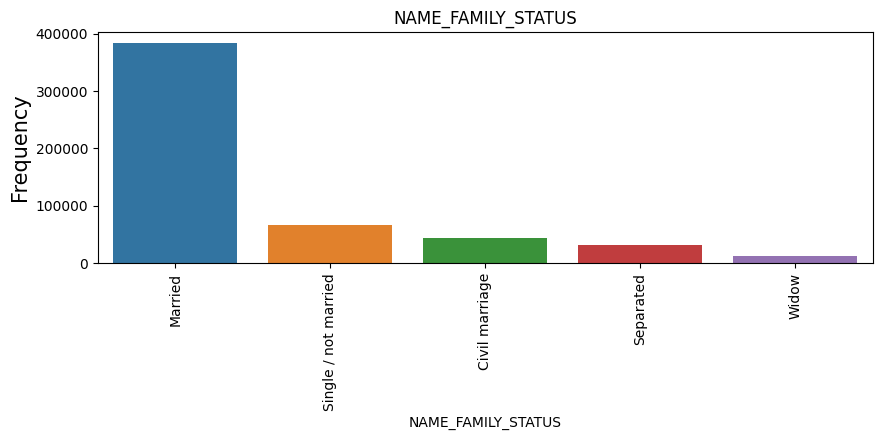

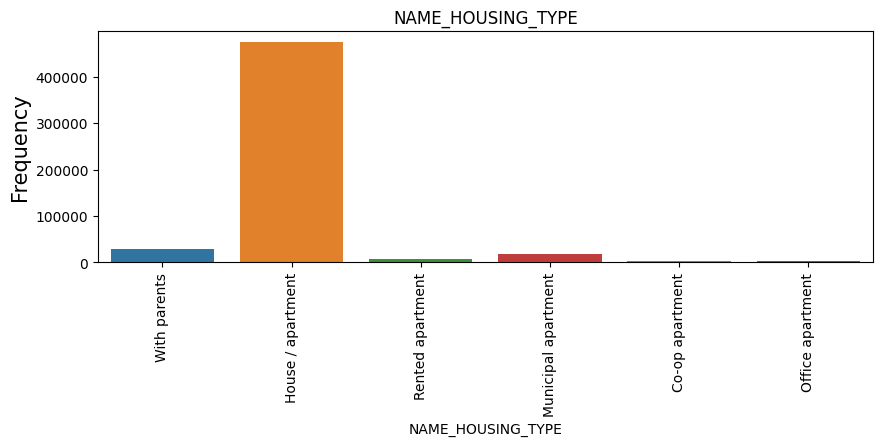

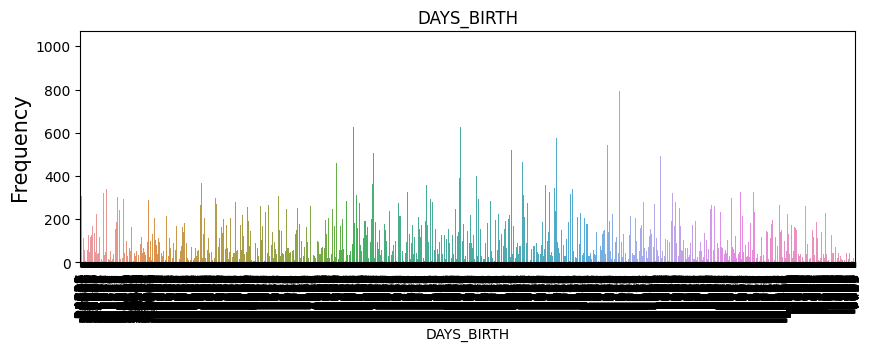

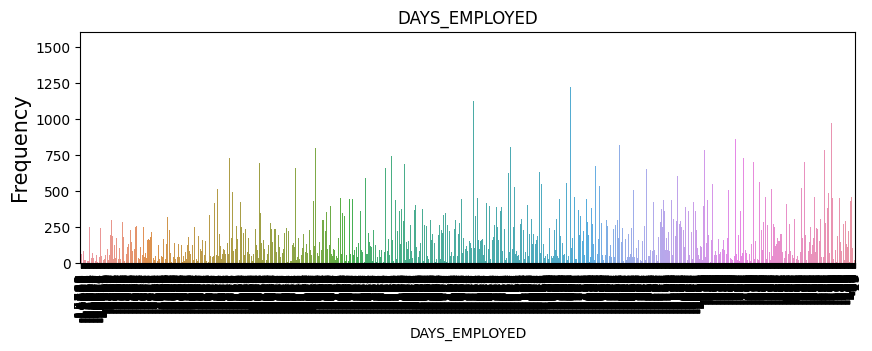

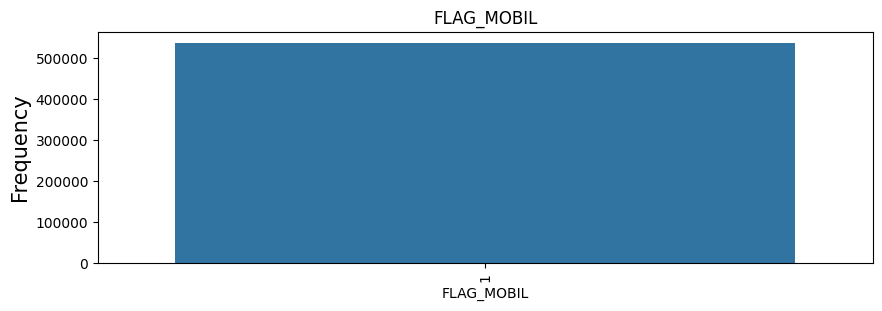

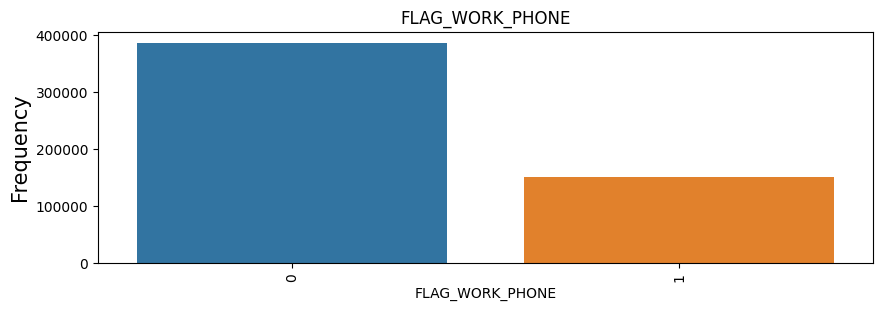

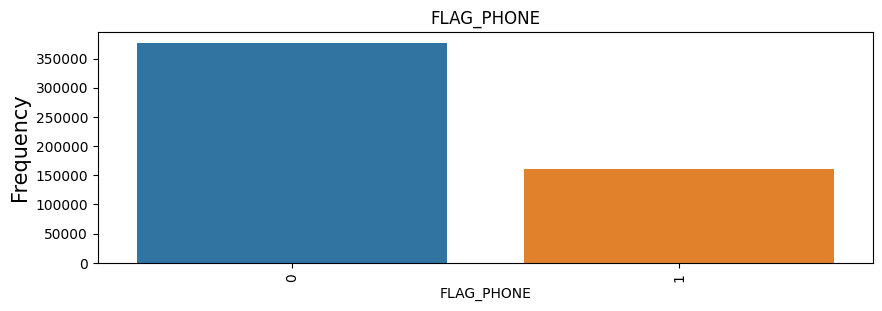

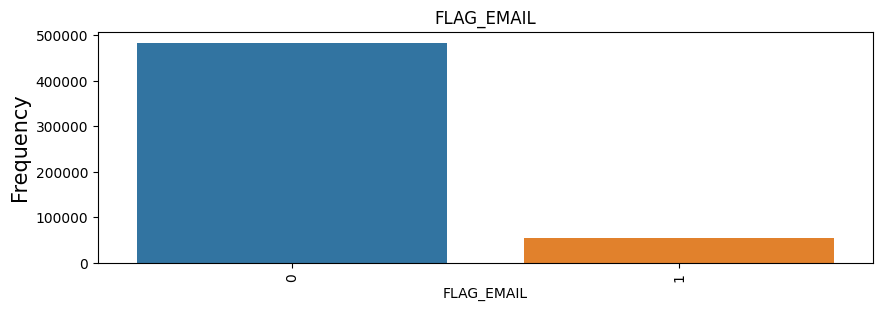

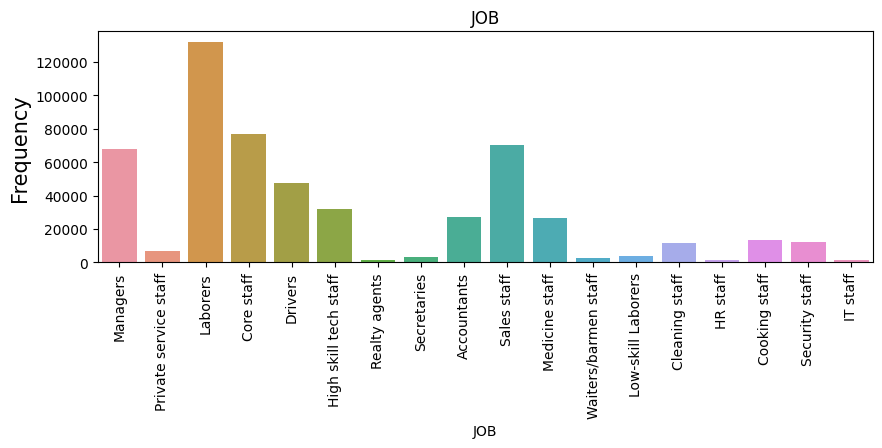

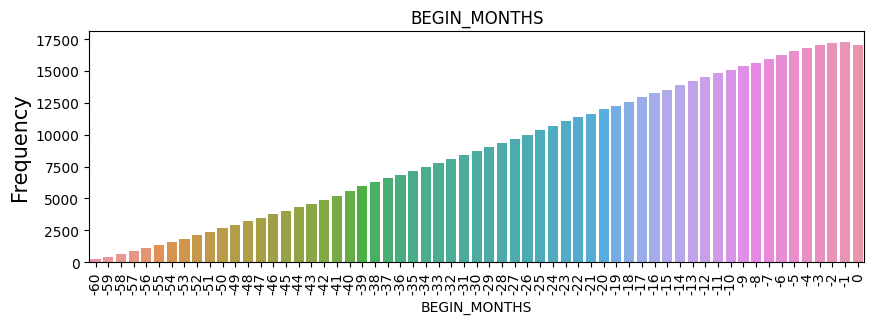

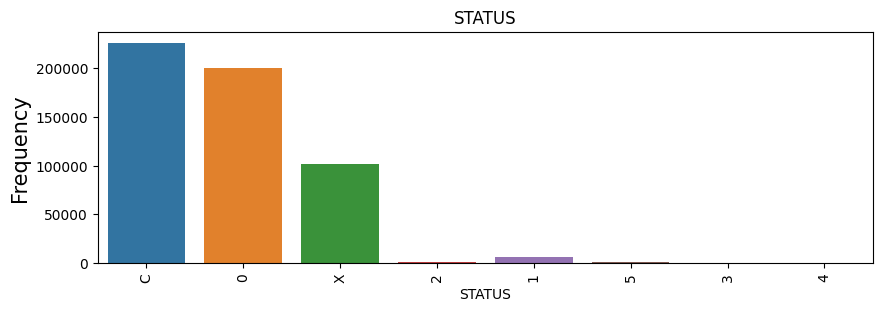

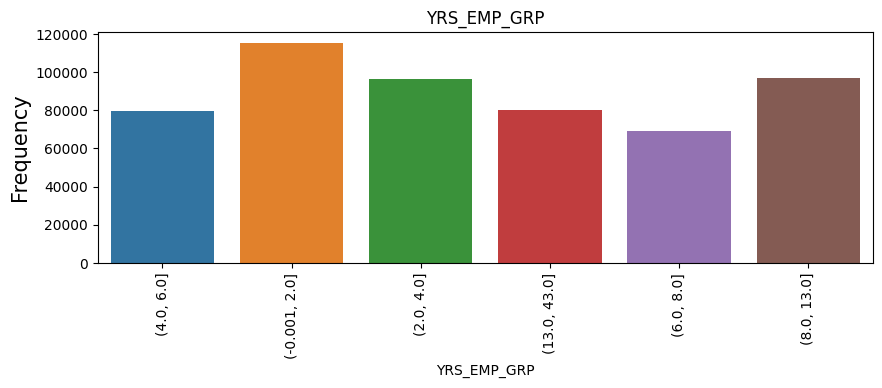

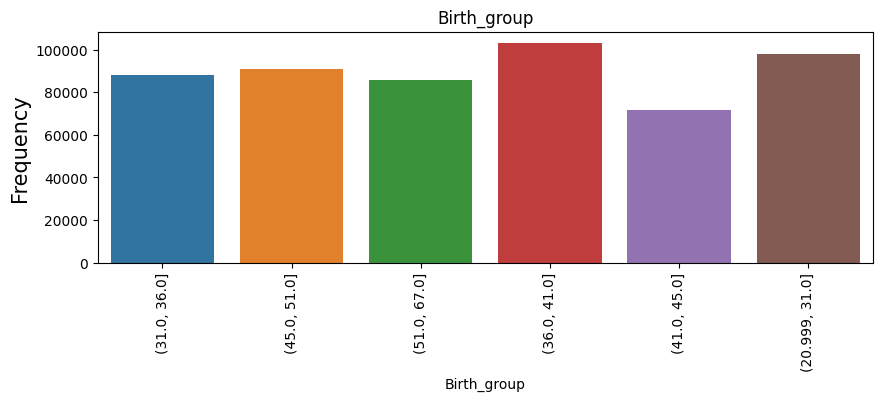

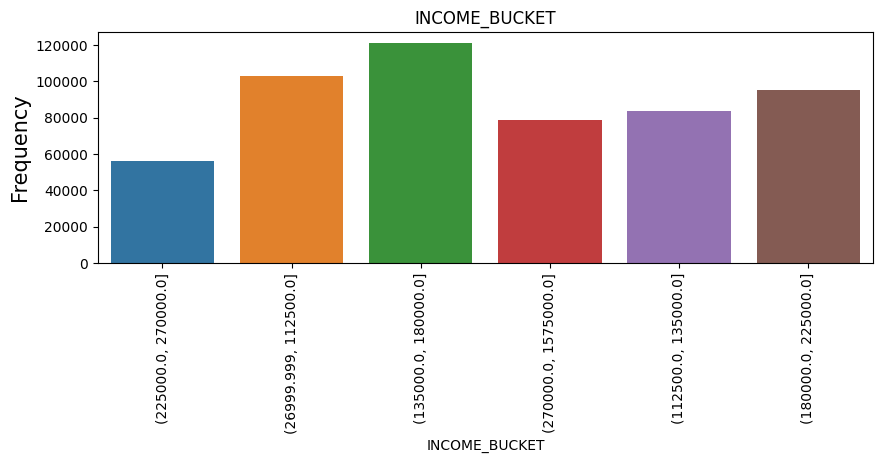

In [289]:
# Create frequency plots for variables
x_vars = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'JOB', 'BEGIN_MONTHS',
       'STATUS','YRS_EMP_GRP','Birth_group','INCOME_BUCKET']
       
# create a countplot for each variable in the list above
for x in x_vars: 
    plt.figure(figsize=(10,3))
    sns.countplot(data=data_df, x = x)
    plt.title(x)
    plt.ylabel('Frequency', fontsize=15)
    plt.xticks(rotation=90)

plt.show()

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


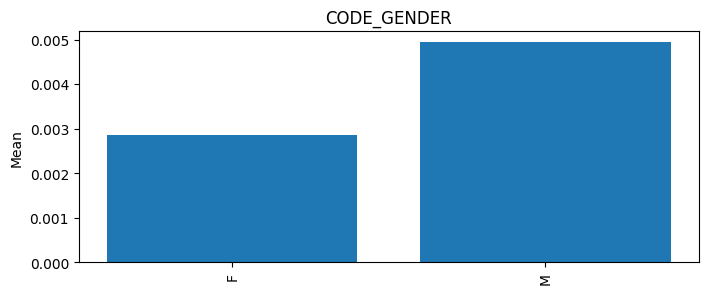

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


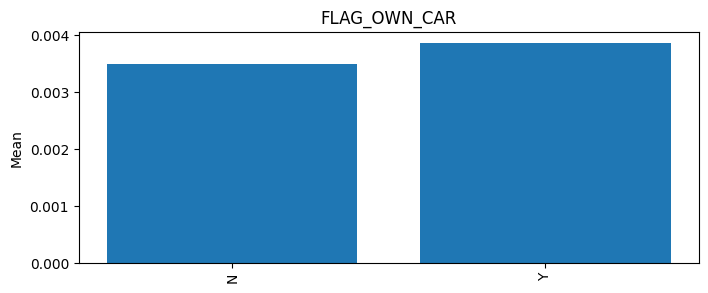

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


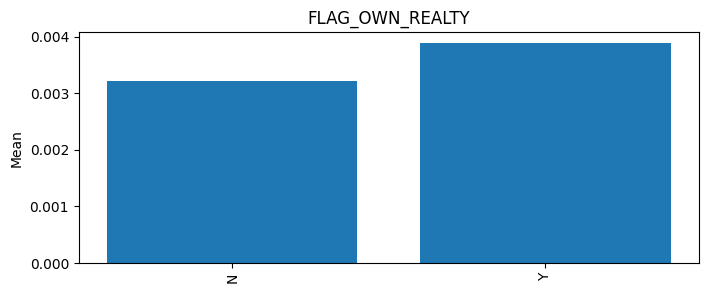

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


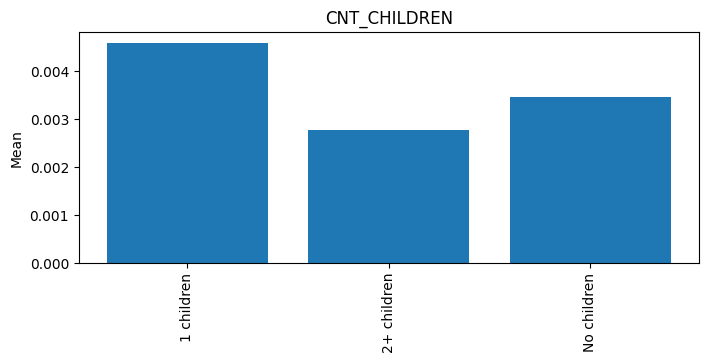

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


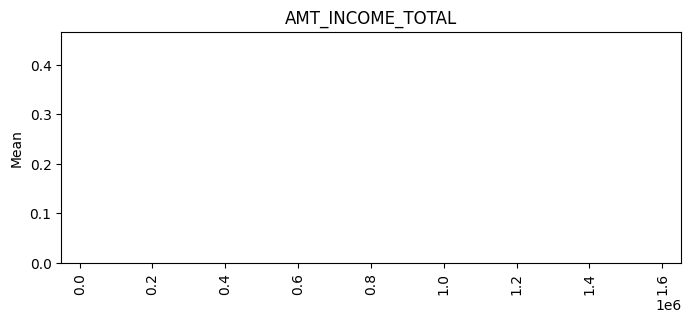

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


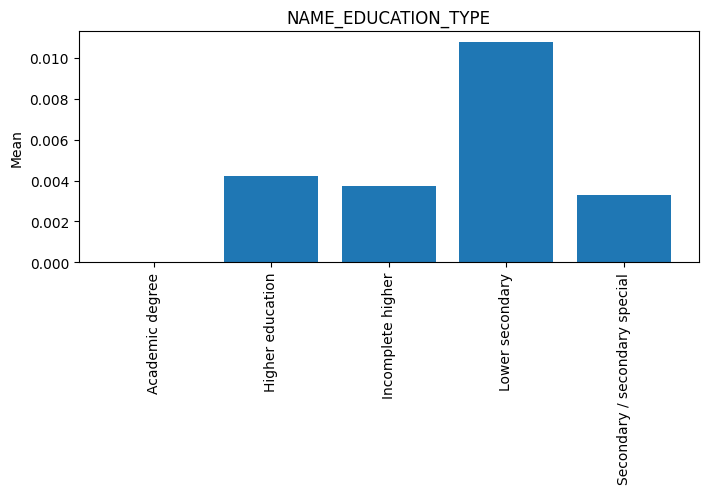

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


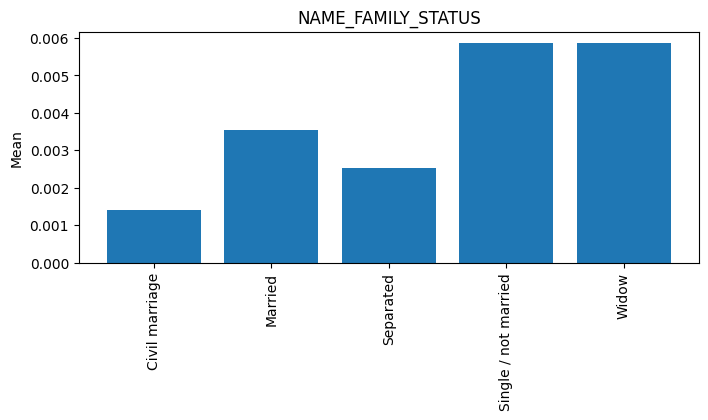

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


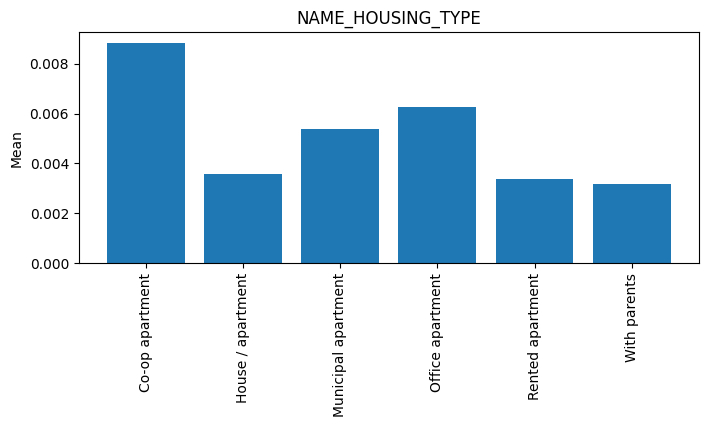

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


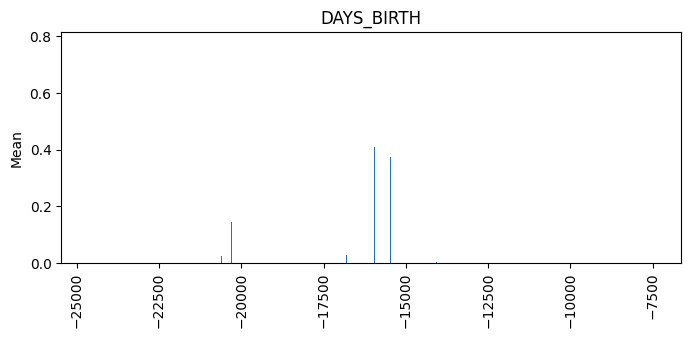

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


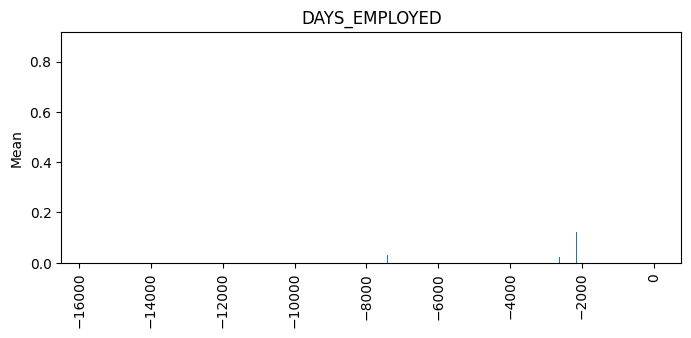

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


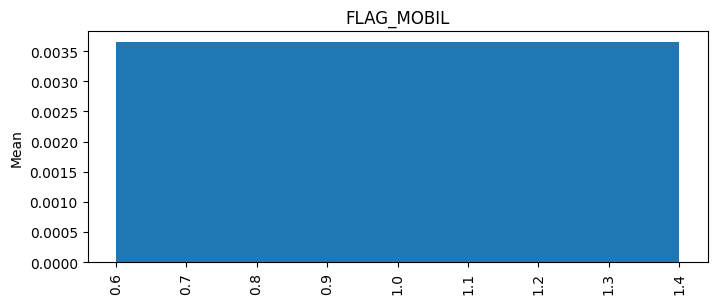

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


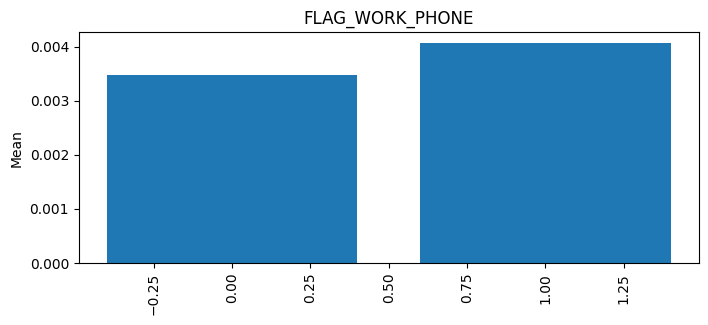

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


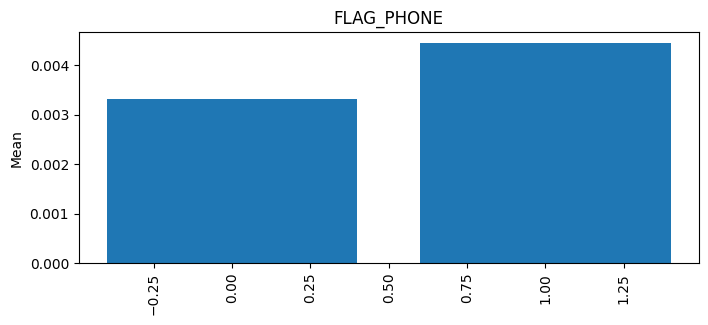

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


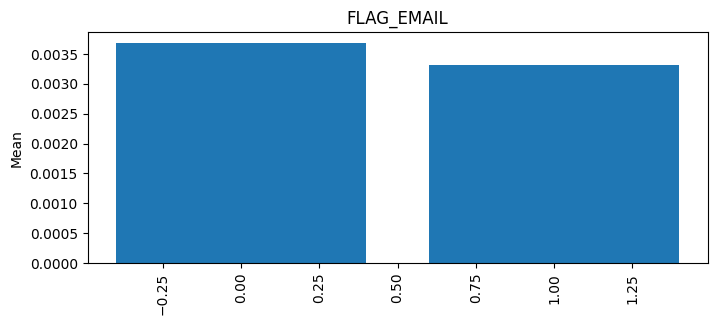

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


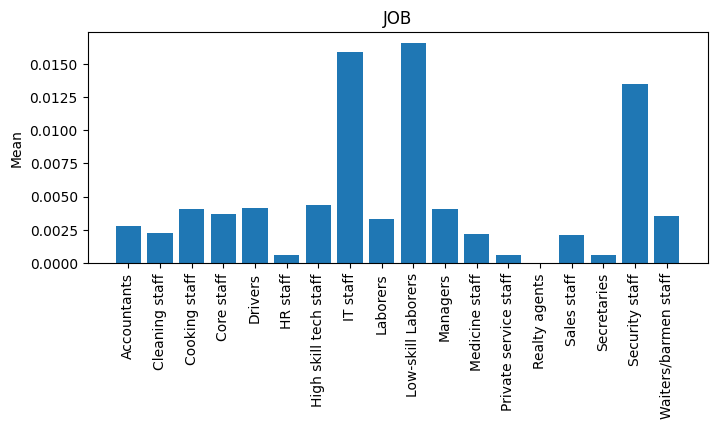

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


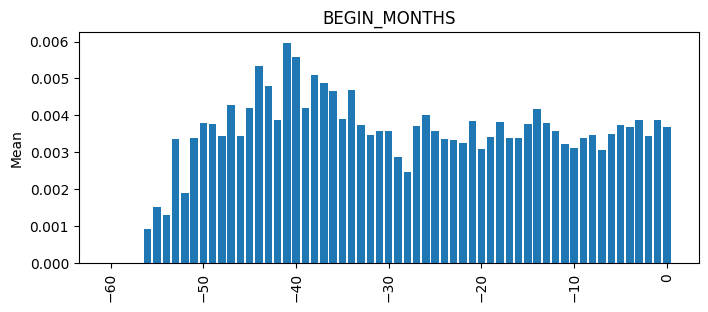

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


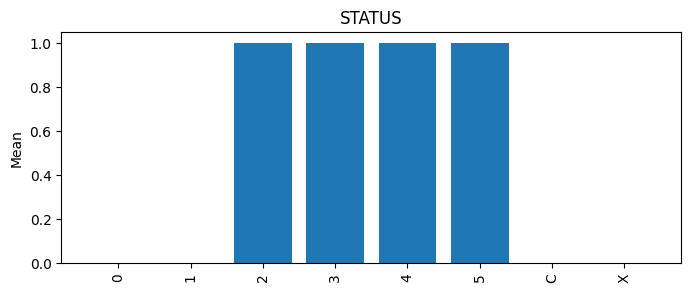

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


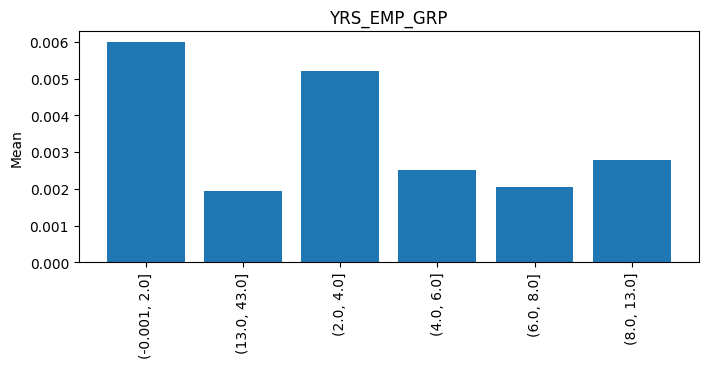

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


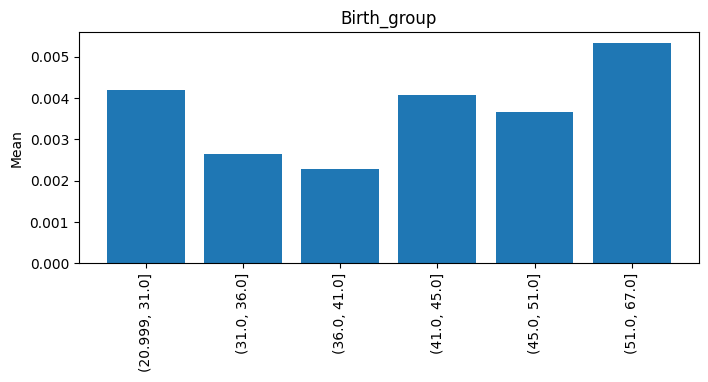

<ipython-input-290-a2ff2e624c3e>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = data_df.groupby(x).mean()[y_var].reset_index()


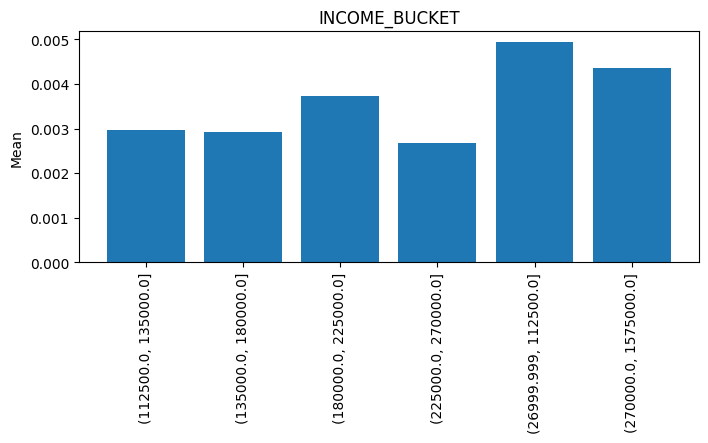

In [290]:
 # create one way plots to see the relationship between target and customer characteristics

#Y variable trying to graph
y_var = 'TARGET'

# x variables to plot against the y variable
x_vars = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'JOB', 'BEGIN_MONTHS',
       'STATUS', 'YRS_EMP_GRP','Birth_group','INCOME_BUCKET']

# create a new plot for each x variable in the list above
for x in x_vars: 
  plt.figure(figsize=(8,3))
  x1 = data_df.groupby(x).mean()[y_var].reset_index()
  plt.bar(x1[x], x1[y_var]) 
  plt.title(x)
  plt.ylabel('Mean')
  plt.xticks(rotation=90)

  plt.show()

<ipython-input-291-ef83c3f1886c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_df.corr(method = 'pearson')


<Axes: >

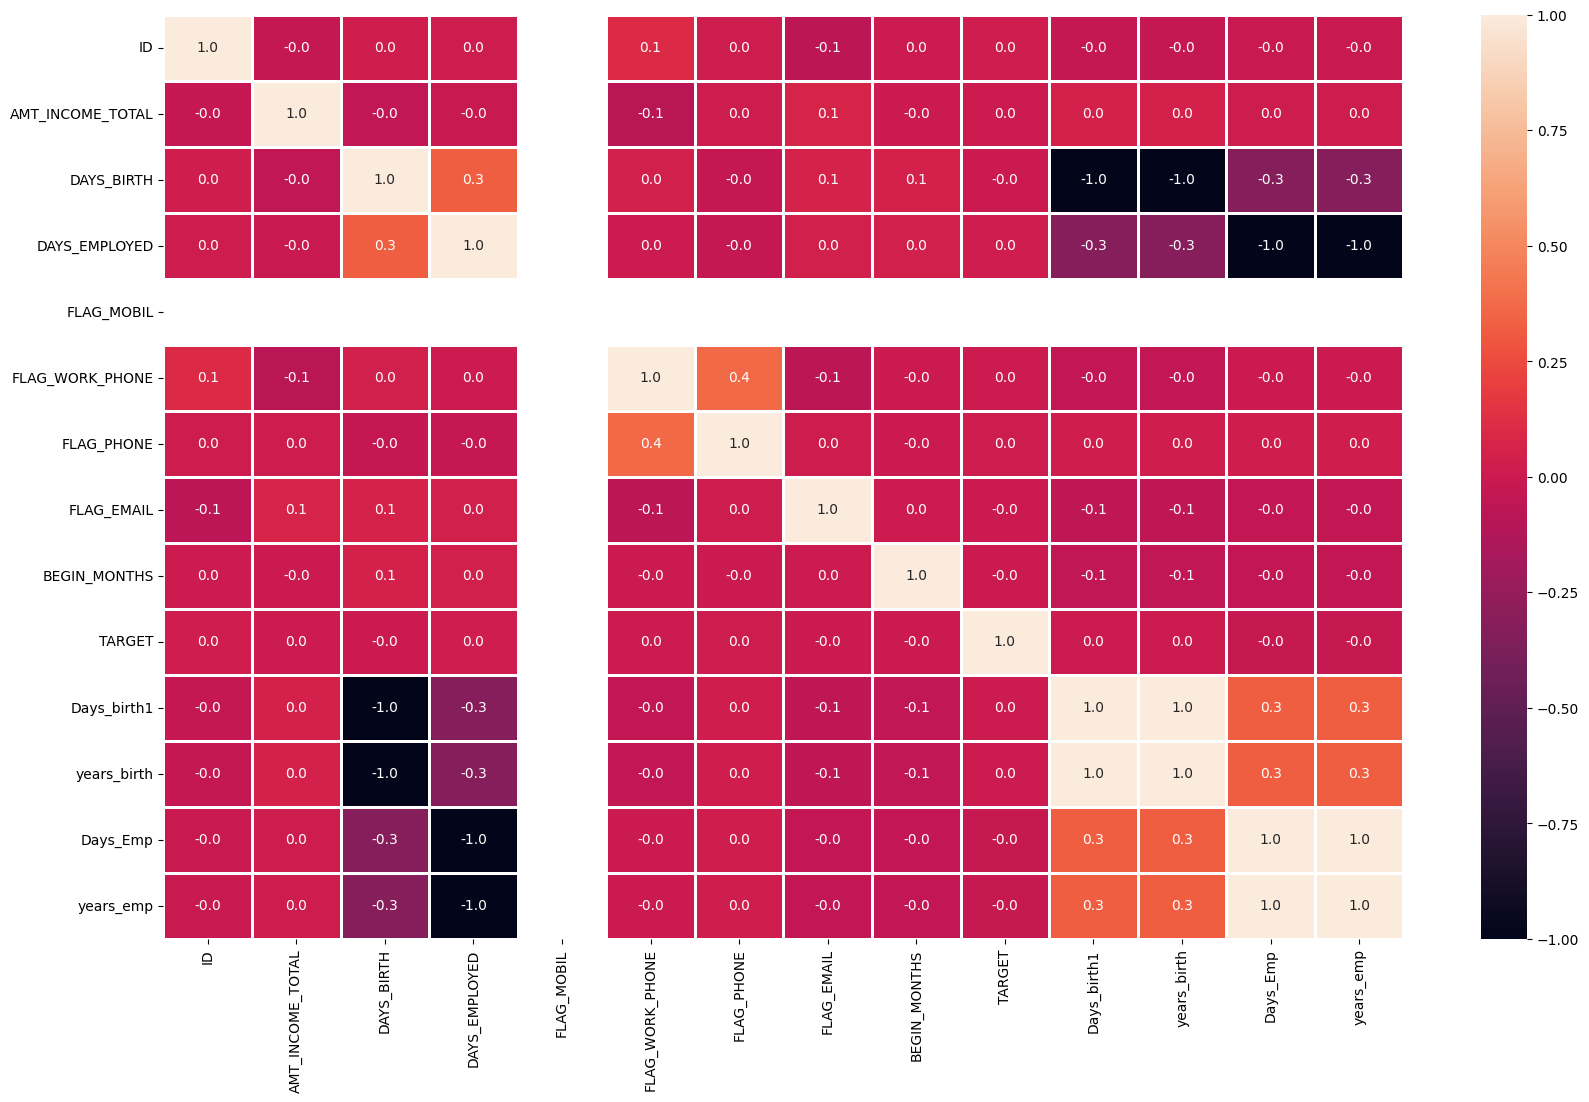

In [291]:
#create a pearson correlation plot
#Pre-Process data shows no correlation between Target and other variables due to imbalance issue
corr = data_df.corr(method = 'pearson')
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,linewidths=1,fmt='.1f')

##Data Preprocessing

Manipulate the data to make it easier to interpret and use.

In [292]:
# rename columns for easier interpretation
data_df.rename(columns={'CODE_GENDER':'Gender',
                     'FLAG_OWN_CAR':'Has_a_car',
                     'FLAG_OWN_REALTY':'Has_a_property',
                     'CNT_CHILDREN':'Children_count',
                     'AMT_INCOME_TOTAL':'Income',
                     'NAME_EDUCATION_TYPE':'Education_level',
                     'NAME_FAMILY_STATUS':'Marital_status',
                     'NAME_HOUSING_TYPE':'Residence',
                     'DAYS_BIRTH':'Days_birth',
                     'DAYS_EMPLOYED':'Days_employed',
                     'FLAG_MOBIL':'Has_a_mobile_phone',
                     'FLAG_WORK_PHONE':'Has_a_work_phone',
                     'FLAG_PHONE':'Has_a_phone',
                     'FLAG_EMAIL':'E-mail',
                     'JOB':'Job_title',
                     'BEGIN_MONTHS':'Begin_month',
                     'STATUS':'Status',
                     'TARGET':'Target'
                    },inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  537667 non-null  int64  
 1   Gender              537667 non-null  object 
 2   Has_a_car           537667 non-null  object 
 3   Has_a_property      537667 non-null  object 
 4   Children_count      537667 non-null  object 
 5   Income              537667 non-null  float64
 6   Education_level     537667 non-null  object 
 7   Marital_status      537667 non-null  object 
 8   Residence           537667 non-null  object 
 9   Days_birth          537667 non-null  int64  
 10  Days_employed       537667 non-null  int64  
 11  Has_a_mobile_phone  537667 non-null  int64  
 12  Has_a_work_phone    537667 non-null  int64  
 13  Has_a_phone         537667 non-null  int64  
 14  E-mail              537667 non-null  int64  
 15  Job_title           537667 non-nul

In [293]:
# Transform non-numerical labels to numerical. 
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data_df['Gender']= label_encoder.fit_transform(data_df['Gender'])
data_df['Has_a_car']= label_encoder.fit_transform(data_df['Has_a_car'])
data_df['Has_a_property']= label_encoder.fit_transform(data_df['Has_a_property'])
data_df['Education_level']= label_encoder.fit_transform(data_df['Education_level'])
data_df['Children_count']= label_encoder.fit_transform(data_df['Children_count'])
data_df['Marital_status']= label_encoder.fit_transform(data_df['Marital_status'])
data_df['Residence']= label_encoder.fit_transform(data_df['Residence'])
data_df['Job_title'] = label_encoder.fit_transform(data_df['Job_title'])
#data_df['Status']= label_encoder.fit_transform(data_df['Status'])

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  537667 non-null  int64  
 1   Gender              537667 non-null  int64  
 2   Has_a_car           537667 non-null  int64  
 3   Has_a_property      537667 non-null  int64  
 4   Children_count      537667 non-null  int64  
 5   Income              537667 non-null  float64
 6   Education_level     537667 non-null  int64  
 7   Marital_status      537667 non-null  int64  
 8   Residence           537667 non-null  int64  
 9   Days_birth          537667 non-null  int64  
 10  Days_employed       537667 non-null  int64  
 11  Has_a_mobile_phone  537667 non-null  int64  
 12  Has_a_work_phone    537667 non-null  int64  
 13  Has_a_phone         537667 non-null  int64  
 14  E-mail              537667 non-null  int64  
 15  Job_title           537667 non-nul

In [294]:
df2 = pd.DataFrame()

In [295]:
data_df['Days_Age'] = np.ceil(pd.to_timedelta(data_df['Days_birth'], unit='D').dt.days * (-1))

In [296]:
data_df['Days_Emp'] = np.ceil(pd.to_timedelta(data_df['Days_employed'], unit='D').dt.days * (-1))
#negative Days_employed means unemployed
data_df.loc[(data_df['Days_employed'] > 0), 'Days_employed'] = 0
data_df.head(2)

ID  Gender  Has_a_car  Has_a_property  Children_count    Income  \
0  5065438       0          1               0               1  270000.0   
1  5142753       0          0               0               2   81000.0   

   Education_level  Marital_status  Residence  Days_birth  ...  Status  \
0                4               1          5      -13258  ...       C   
1                4               3          1      -17876  ...       0   

   Target  Days_birth1  years_birth   Birth_group  Days_Emp  years_emp  \
0       0      13258.0         36.0  (31.0, 36.0]    2300.0        6.0   
1       0      17876.0         49.0  (45.0, 51.0]     377.0        1.0   

     YRS_EMP_GRP          INCOME_BUCKET  Days_Age  
0     (4.0, 6.0]   (225000.0, 270000.0]   13258.0  
1  (-0.001, 2.0]  (26999.999, 112500.0]   17876.0  

[2 rows x 27 columns]

In [297]:
df1 = data_df.drop(["Days_birth", "Has_a_mobile_phone", "Days_employed"], axis = 1)

<ipython-input-298-39da6f55ba6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


<Axes: >

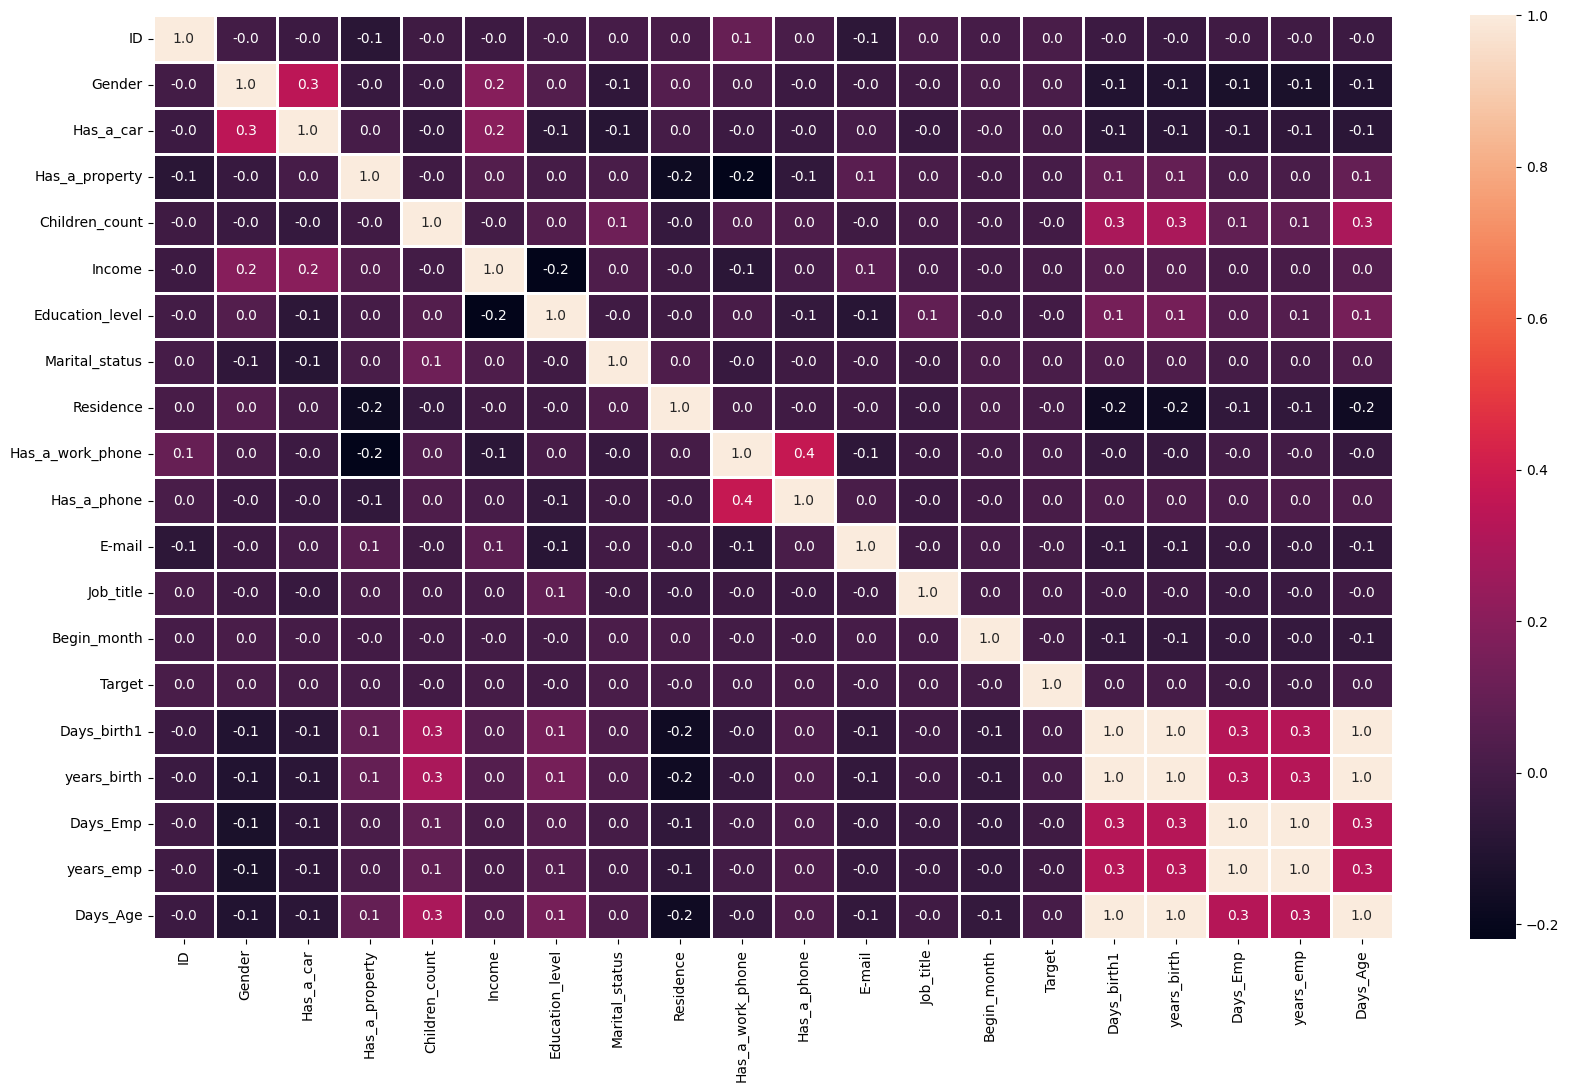

In [298]:
# check correlation among predictors
corr = df1.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,linewidths=1,fmt='.1f')
#no coorelation between any two columns.

In [299]:
df = data_df.drop(["ID","Gender","Children_count","Residence", "Has_a_work_phone","Has_a_phone","E-mail","Job_title","Status"], axis=1)
df.head(2)

Has_a_car  Has_a_property    Income  Education_level  Marital_status  \
0          1               0  270000.0                4               1   
1          0               0   81000.0                4               3   

   Days_birth  Days_employed  Has_a_mobile_phone  Begin_month  Target  \
0      -13258          -2300                   1           -6       0   
1      -17876           -377                   1           -4       0   

   Days_birth1  years_birth   Birth_group  Days_Emp  years_emp    YRS_EMP_GRP  \
0      13258.0         36.0  (31.0, 36.0]    2300.0        6.0     (4.0, 6.0]   
1      17876.0         49.0  (45.0, 51.0]     377.0        1.0  (-0.001, 2.0]   

           INCOME_BUCKET  Days_Age  
0   (225000.0, 270000.0]   13258.0  
1  (26999.999, 112500.0]   17876.0

In [300]:
df2['mean_income'] = df.groupby('Target')['Days_Emp'].mean()

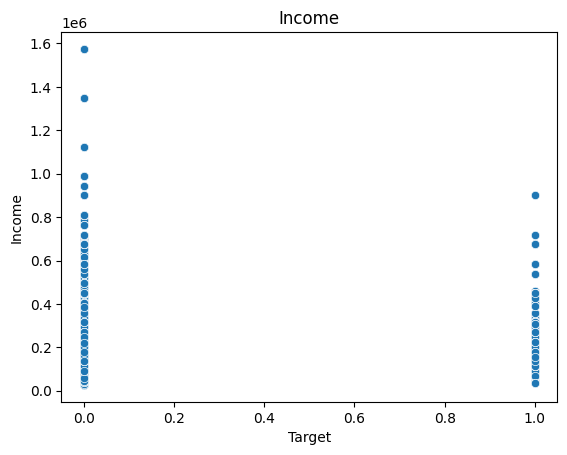

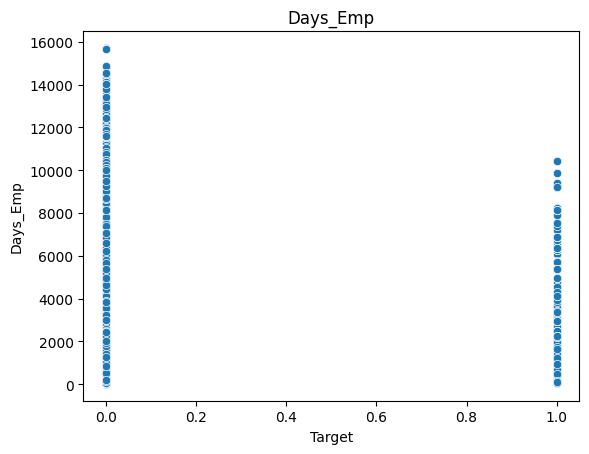

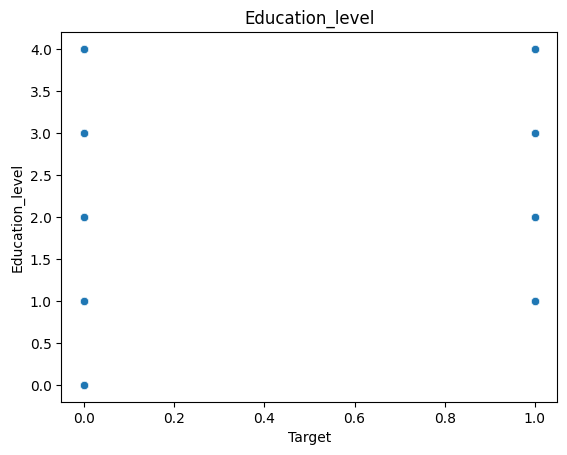

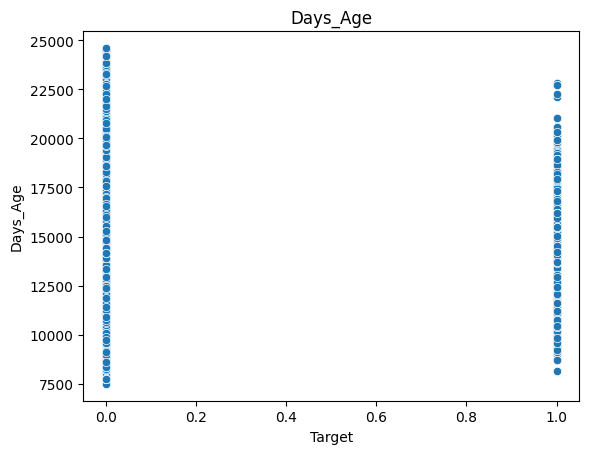

In [301]:
# Check relationship between predictors and target
x ='Target'

y_vars = ['Income','Days_Emp','Education_level','Days_Age']

for y in y_vars: 
  sns.scatterplot(data = df, x = x, y = y)
  plt.title(y)
  plt.show()
 

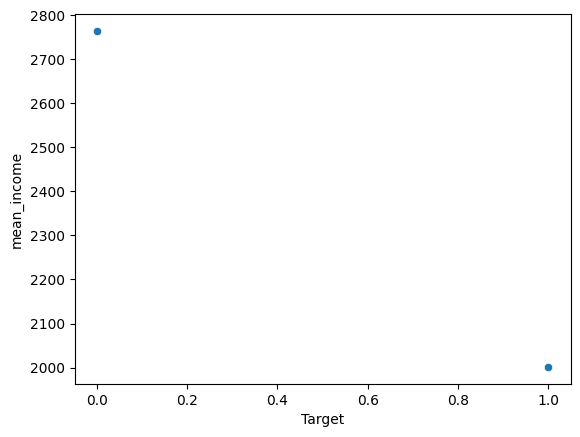

In [302]:
sns.scatterplot(data = df2, x = 'Target', y = 'mean_income');

<Figure size 1000x1000 with 0 Axes>

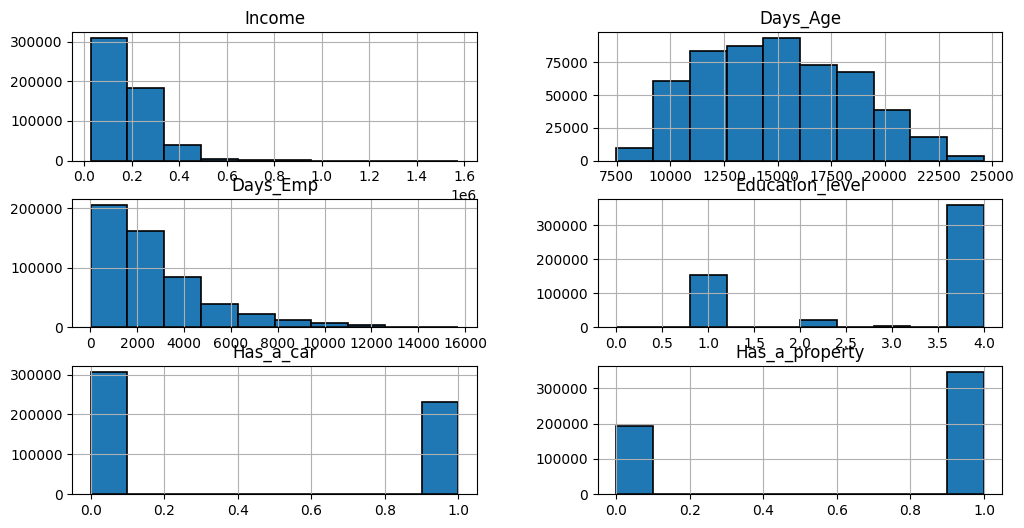

In [303]:
# check distribution of continuous variables 
plt.figure(figsize=(10,10))

cols_to_plot = ["Income","Days_Age","Days_Emp","Education_level","Has_a_car","Has_a_property"]
df[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

In [304]:
df.head(2)

Has_a_car  Has_a_property    Income  Education_level  Marital_status  \
0          1               0  270000.0                4               1   
1          0               0   81000.0                4               3   

   Days_birth  Days_employed  Has_a_mobile_phone  Begin_month  Target  \
0      -13258          -2300                   1           -6       0   
1      -17876           -377                   1           -4       0   

   Days_birth1  years_birth   Birth_group  Days_Emp  years_emp    YRS_EMP_GRP  \
0      13258.0         36.0  (31.0, 36.0]    2300.0        6.0     (4.0, 6.0]   
1      17876.0         49.0  (45.0, 51.0]     377.0        1.0  (-0.001, 2.0]   

           INCOME_BUCKET  Days_Age  
0   (225000.0, 270000.0]   13258.0  
1  (26999.999, 112500.0]   17876.0

##**FINAL DATA** 
 Data used for aNalysis

In [305]:
#features = ['Has_a_car','Has_a_property','Income','Education_level','Marital_status','Begin_month','Days_Age','Days_Emp']
features = ['Has_a_car','Has_a_property','Income','Education_level','Marital_status','Days_Age','Days_Emp']
X = df.loc[:, features]
y = df.loc[:, ['Target']]

In [306]:
main_x = X.copy()
main_y= y.copy()

In [307]:
# Normalisation of continuous variables 
X['Income'] = (X['Income'] - X['Income'].min()) / (X['Income'].max() - X['Income'].min()) 
X['Days_Age'] = (X['Days_Age'] - X['Days_Age'].min()) / (X['Days_Age'].max() - X['Days_Age'].min()) 
X['Days_Emp'] = (X['Days_Emp'] - X['Days_Emp'].min()) / (X['Days_Emp'].max() - X['Days_Emp'].min()) 

In [308]:
X.head()

Has_a_car  Has_a_property    Income  Education_level  Marital_status  \
0          1               0  0.156977                4               1   
1          0               0  0.034884                4               3   
2          1               1  0.156977                1               1   
3          1               1  0.055233                4               1   
4          1               1  0.072674                4               1   

   Days_Age  Days_Emp  
0  0.336935  0.145451  
1  0.606646  0.022936  
2  0.706109  0.064411  
3  0.445041  0.123535  
4  0.571896  0.354294

In [309]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Has_a_car        537667 non-null  int64  
 1   Has_a_property   537667 non-null  int64  
 2   Income           537667 non-null  float64
 3   Education_level  537667 non-null  int64  
 4   Marital_status   537667 non-null  int64  
 5   Days_Age         537667 non-null  float64
 6   Days_Emp         537667 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 28.7 MB


In [310]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Target  537667 non-null  int64
dtypes: int64(1)
memory usage: 4.1 MB


In [311]:
y.head()

Target
0       0
1       0
2       0
3       0
4       0

# Base Model



In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.8)

In [313]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [314]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    107125
           1       0.00      0.00      0.00       409

    accuracy                           1.00    107534
   macro avg       0.50      0.50      0.50    107534
weighted avg       0.99      1.00      0.99    107534



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


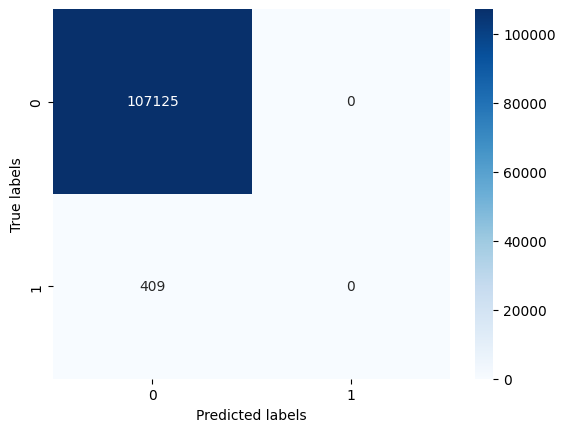

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# assuming you have y_true and y_pred as the true and predicted labels
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


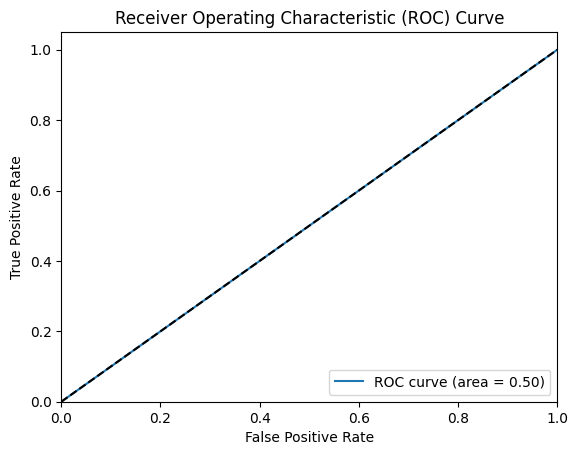

In [316]:
from sklearn.metrics import roc_curve, auc

# assuming you have y_true and y_pred_prob as the true labels and predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##**Ridge Regression**

A model tuning method used to analyze multicollinearity of the data. 

In [317]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.transform(X_test)

ridge = RidgeCV(alphas=np.logspace(-4, 6, 10), cv=5)   # instantiate with cross-validation
ridge.fit(X_std_train, y_train)            # fit to training data
predictions = ridge.predict(X_std_test)
print("Best alpha for Ridge:", ridge.alpha_)
print("Coefficients for Ridge:", ridge.coef_)

Best alpha for Ridge: 5994.842503189421
Coefficients for Ridge: [[ 2.53727299e-04  1.91003099e-04  3.50149210e-05 -4.61172350e-04
   9.70059058e-04  8.18761416e-04 -1.39972545e-03]]


In [318]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# calculate the R-squared coefficient
r2 = r2_score(y_test, predictions)

# print the results
print("Mean squared error: {:.2f}".format(mse))
print("Root mean squared error: {:.2f}".format(rmse))
print("R-squared coefficient: {:.2f}".format(r2))

Mean squared error: 0.00
Root mean squared error: 0.06
R-squared coefficient: 0.00


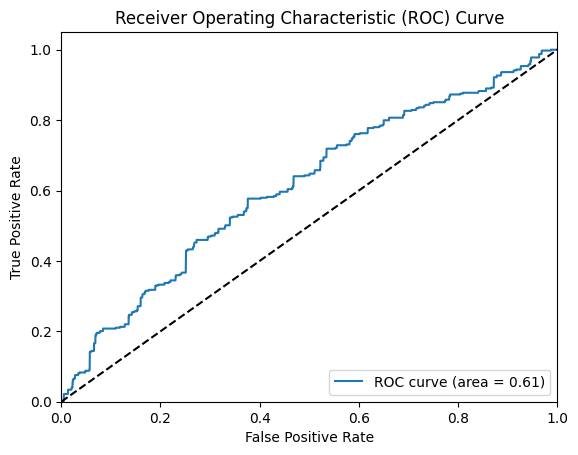

In [319]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## **Lasso Regression**

A model used to improve the prediction accuracy and interpretability of regression models.

In [320]:
from sklearn.linear_model import LassoCV

# Standardize the features
scaler = StandardScaler() 
X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.transform(X_test)

# Fit the LassoCV model to the training data
lasso = LassoCV(alphas=np.logspace(-10, 1, 10), cv=5)
lasso.fit(X_std_train, y_train)
predictions = lasso.predict(X_std_test)
# Print the results
print("Best alpha for Lasso:", lasso.alpha_)
print("Coefficients for Lasso:", lasso.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha for Lasso: 7.742636826811277e-06
Coefficients for Lasso: [ 2.51247683e-04  1.85535018e-04  2.78050322e-05 -4.62117590e-04
  9.75710538e-04  8.27830950e-04 -1.41439761e-03]


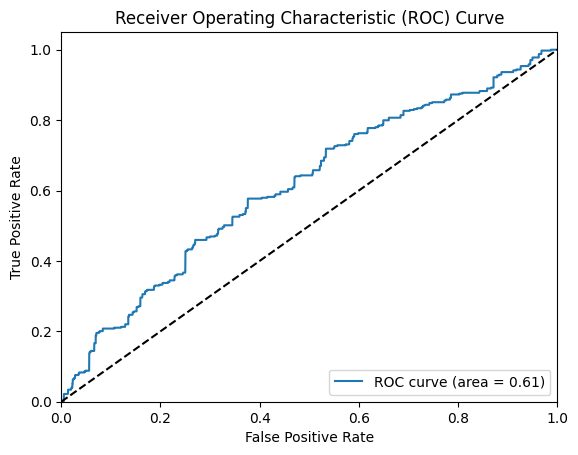

In [321]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [322]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [323]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [324]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.996596425316644


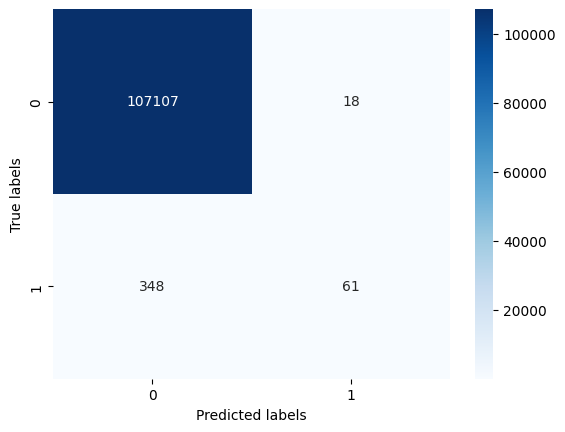

In [325]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

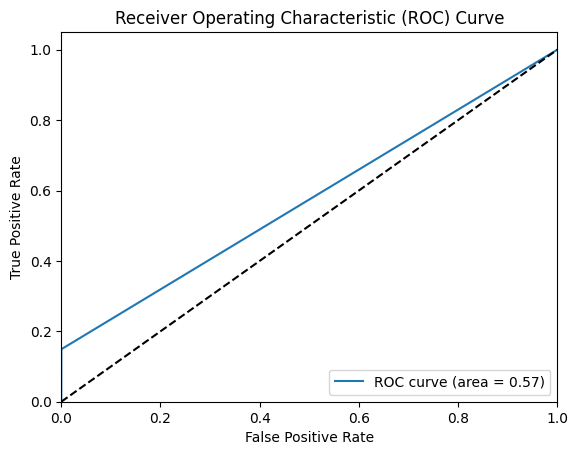

In [326]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## **KNN Classifier**

In [327]:
#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

k = 5
clf = KNeighborsClassifier(n_neighbors=k)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.996484832704075


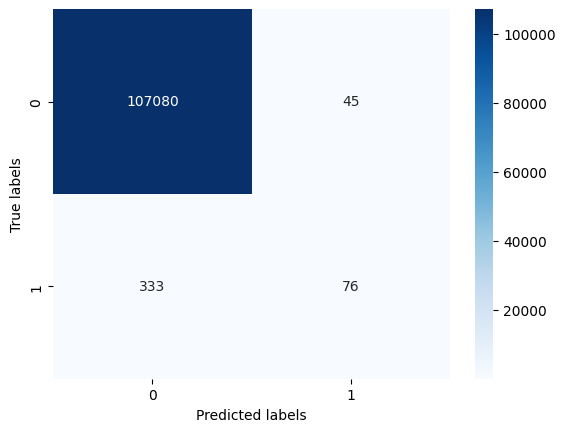

In [328]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

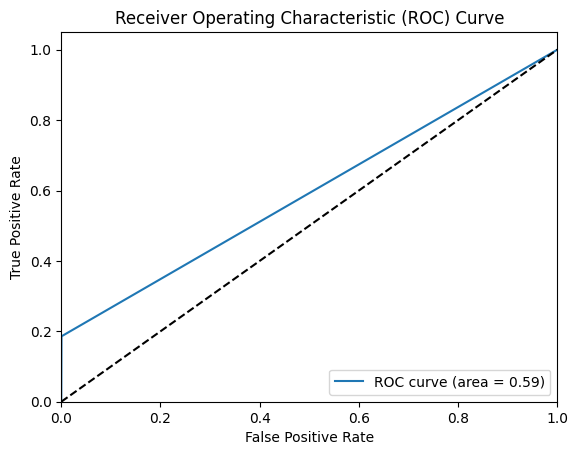

In [329]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [330]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    107125
           1       0.63      0.19      0.29       409

    accuracy                           1.00    107534
   macro avg       0.81      0.59      0.64    107534
weighted avg       1.00      1.00      1.00    107534



# Implementation of ML Models
Experiment with various re-sampling techniques to find what work's best for our imbalanced dataset problem.

In [331]:
# DataFrame copy (reset to clean data )

X = main_x.copy()
y = main_y.copy()

In [332]:
# All imports that are required to run code below
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics 

In [333]:
# Common method/function to run all the models

def model_prediction(model_name, initialized_model, X_train, y_train, X_test, y_test, stat_df):
  model = initialized_model
  model.fit(X_train, y_train)
  model_pred = model.predict(X_test)

  accuracy = metrics.accuracy_score(y_test, model_pred)
  roc_auc = roc_auc_score(y_test, model_pred)
  precision = precision_score(y_test, model_pred)
  recall = recall_score(y_test, model_pred)
  f1 = f1_score(y_test, model_pred)
  stat_df[model_name] = [accuracy, roc_auc, precision, recall, f1]
  print("---------------------" + model_name + " statistics ------------------------------")
  print(f'{model_name} Accuracy: {accuracy}')
  print(f'{model_name} ROC AUC score: {roc_auc}')
  print(f'{model_name} Precision: {precision}')
  print(f'{model_name} Recall: {recall}')
  print(f'{model_name} F1-score: {f1}')
  print("---------------------------------------------------------------------------------")
  cm = confusion_matrix(y_test, model_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()

  print("------------------------------------- ROC Plot ---------------------------------")
  
  fpr, tpr, thresholds = roc_curve(y_test, model_pred)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(model_name + ' (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()


## Imbalanced Data - Before Balancing

In [334]:
# Since Data is imbalance containing the target values as 0 for 99.6% of the records/rows and just 0.4% of the records contain target value as 1
# Before balancing first we want explore how each of the model we choose to implement works and compare them on different metrics

In [335]:
# Splitting the data into train and test
# train to test ratio is 4:1

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.8)

In [336]:
# Dataframe to store all the metrics related to each ML Model
stats_before_balancing_data = pd.DataFrame()
stats_before_balancing_data['Metrics'] = ['Accuracy', 'ROC AUC score', 'Precision', 'Recall', 'F1-score']

In [337]:
stats_before_balancing_data

Metrics
0       Accuracy
1  ROC AUC score
2      Precision
3         Recall
4       F1-score

#### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------------------Logistic Regression statistics ------------------------------
Logistic Regression Accuracy: 0.9961965517882716
Logistic Regression ROC AUC score: 0.5
Logistic Regression Precision: 0.0
Logistic Regression Recall: 0.0
Logistic Regression F1-score: 0.0
---------------------------------------------------------------------------------


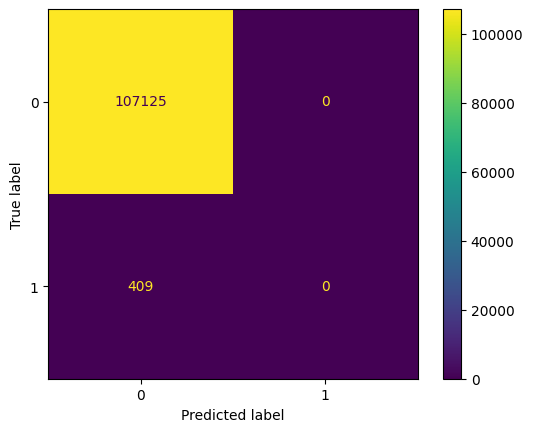

------------------------------------- ROC Plot ---------------------------------


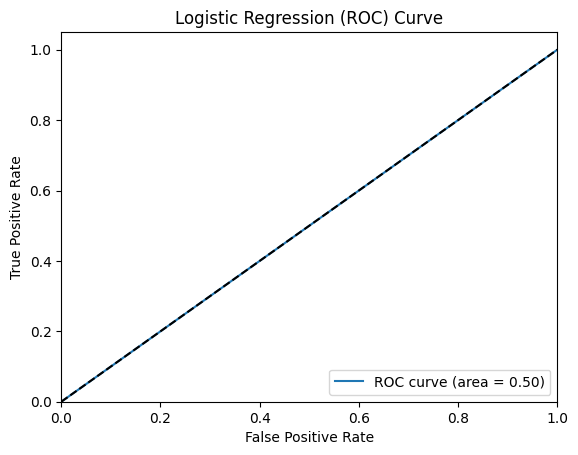

In [338]:
# Logistic Regression

model = LogisticRegression()
model_prediction("Logistic Regression", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

#### Decision Tree

---------------------Decision Tree Classifier statistics ------------------------------
Decision Tree Classifier Accuracy: 0.996596425316644
Decision Tree Classifier ROC AUC score: 0.5744881131370306
Decision Tree Classifier Precision: 0.7721518987341772
Decision Tree Classifier Recall: 0.1491442542787286
Decision Tree Classifier F1-score: 0.25
---------------------------------------------------------------------------------


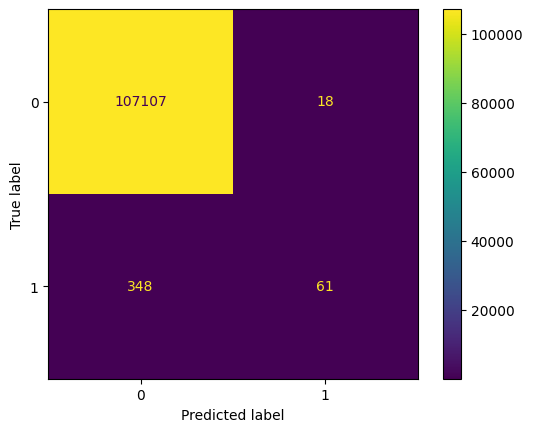

------------------------------------- ROC Plot ---------------------------------


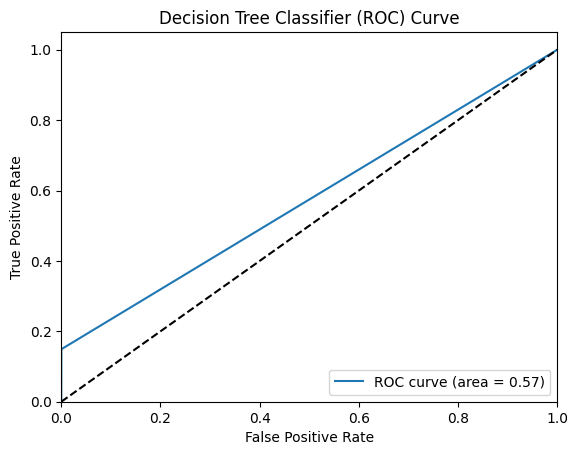

In [339]:
model = DecisionTreeClassifier()
model_prediction("Decision Tree Classifier", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

### Ensemble Methods

#### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier statistics ------------------------------
Random Forest Classifier Accuracy: 0.9965778265478825
Random Forest Classifier ROC AUC score: 0.5756966046908388
Random Forest Classifier Precision: 0.7469879518072289
Random Forest Classifier Recall: 0.15158924205378974
Random Forest Classifier F1-score: 0.25203252032520324
---------------------------------------------------------------------------------


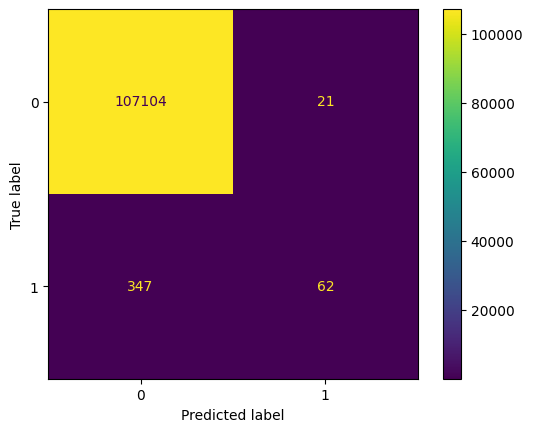

------------------------------------- ROC Plot ---------------------------------


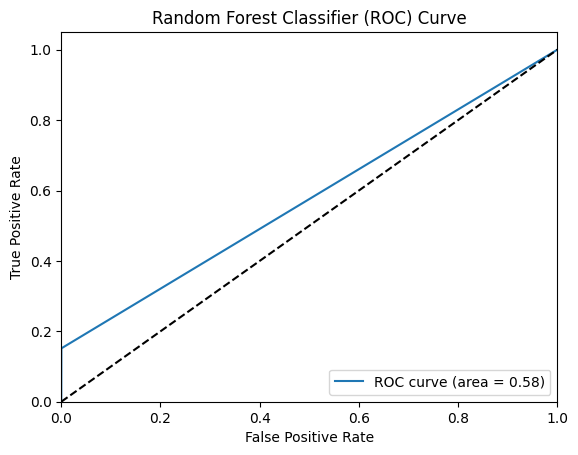

In [340]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

#### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier statistics ------------------------------
Bagging Classifier Accuracy: 0.9965871259322633
Bagging Classifier ROC AUC score: 0.5744834456924565
Bagging Classifier Precision: 0.7625
Bagging Classifier Recall: 0.1491442542787286
Bagging Classifier F1-score: 0.24948875255623723
---------------------------------------------------------------------------------


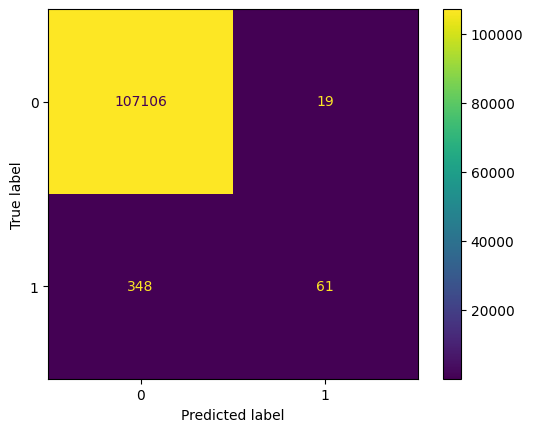

------------------------------------- ROC Plot ---------------------------------


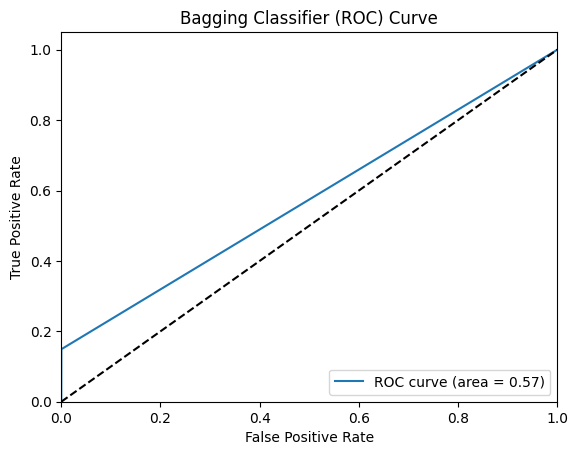

In [341]:
model = BaggingClassifier()
model_prediction("Bagging Classifier", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

#### XGBoost

---------------------XG Boosting Classifier statistics ------------------------------
XG Boosting Classifier Accuracy: 0.9965871259322633
XG Boosting Classifier ROC AUC score: 0.5732656192495
XG Boosting Classifier Precision: 0.7692307692307693
XG Boosting Classifier Recall: 0.1466992665036675
XG Boosting Classifier F1-score: 0.24640657084188913
---------------------------------------------------------------------------------


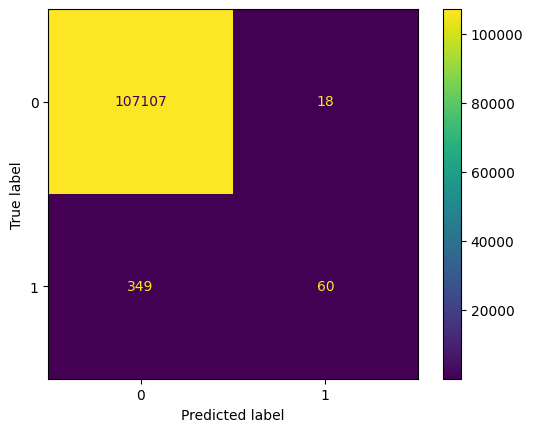

------------------------------------- ROC Plot ---------------------------------


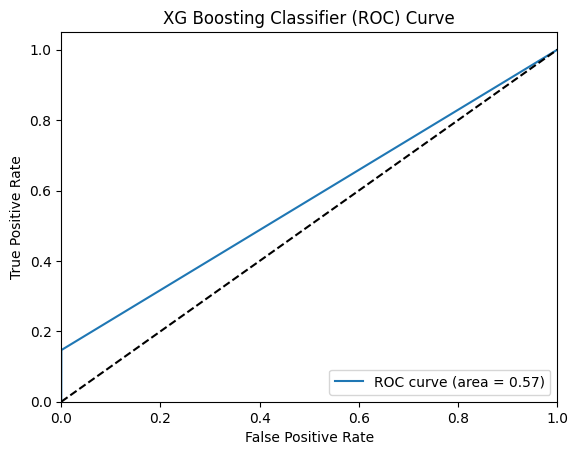

In [342]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

### Adding class weights 

#### Logistic regression with class weight balanced

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Logistic Regression(Balanced) statistics ------------------------------
Logistic Regression(Balanced) Accuracy: 0.4700652816783529
Logistic Regression(Balanced) ROC AUC score: 0.5903174832317204
Logistic Regression(Balanced) Precision: 0.005091061775048549
Logistic Regression(Balanced) Recall: 0.7114914425427873
Logistic Regression(Balanced) F1-score: 0.010109783212896052
---------------------------------------------------------------------------------


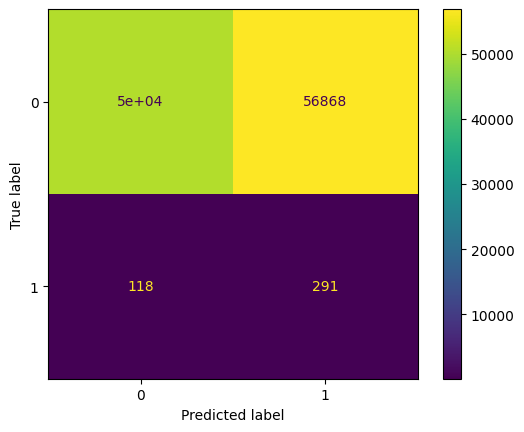

------------------------------------- ROC Plot ---------------------------------


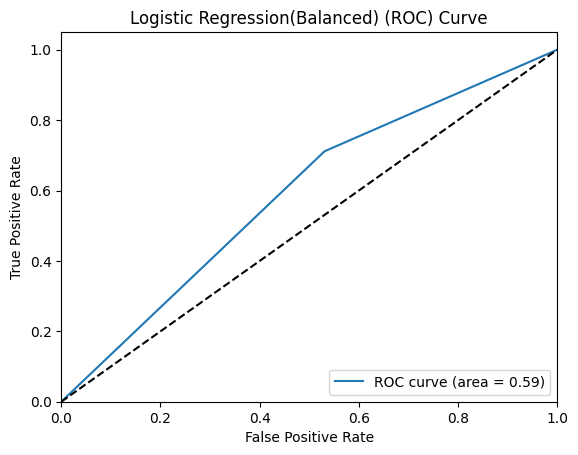

In [343]:
# Logistic Regression

model = LogisticRegression(class_weight="balanced")
model_prediction("Logistic Regression(Balanced)", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

#### Decision Tree regression with class weight balanced

---------------------Decision Tree Classifier(balanced) statistics ------------------------------
Decision Tree Classifier(balanced) Accuracy: 0.9467331262670411
Decision Tree Classifier(balanced) ROC AUC score: 0.9562153072781894
Decision Tree Classifier(balanced) Precision: 0.06465870027827796
Decision Tree Classifier(balanced) Recall: 0.9657701711491442
Decision Tree Classifier(balanced) F1-score: 0.12120282295182572
---------------------------------------------------------------------------------


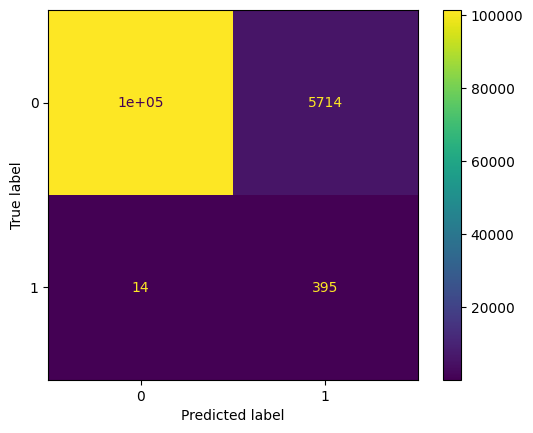

------------------------------------- ROC Plot ---------------------------------


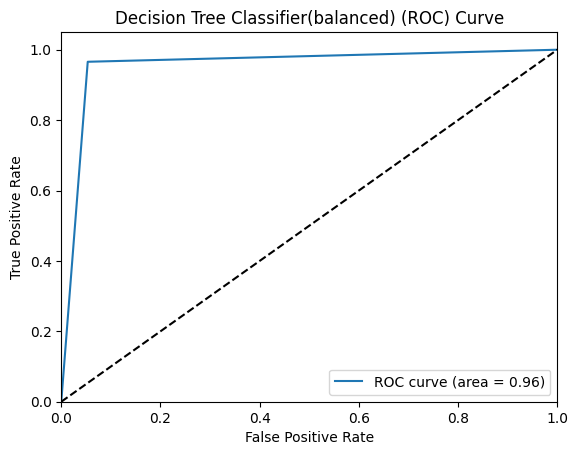

In [344]:
model = DecisionTreeClassifier(class_weight="balanced")
model_prediction("Decision Tree Classifier(balanced)", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

### Before Balancing Data - Model Comparision

In [345]:
stats_before_balancing_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.996197                  0.996596   
1  ROC AUC score             0.500000                  0.574488   
2      Precision             0.000000                  0.772152   
3         Recall             0.000000                  0.149144   
4       F1-score             0.000000                  0.250000   

   Random Forest Classifier  Bagging Classifier  XG Boosting Classifier  \
0                  0.996578            0.996587                0.996587   
1                  0.575697            0.574483                0.573266   
2                  0.746988            0.762500                0.769231   
3                  0.151589            0.149144                0.146699   
4                  0.252033            0.249489                0.246407   

   Logistic Regression(Balanced)  Decision Tree Classifier(balanced)  
0                       0.470065                            0.946733  
1                       0.590317                            0.956215  
2                       0.005091                            0.064659  
3                       0.711491                            0.965770  
4                       0.010110                            0.121203

In [346]:
# Observation on above statistics
# With imbalance data we can see that Decision trees, Random Forest, Bagging and XG Boosting classifiers have similar metrics(since both bagging and Random forest use Decision trees internally) on both F1 score, ROC AUC values.
# Logistic regression performs very badly in case of imbalanced data where it is unable to predicts the minority class(in this case number of credit card defaulters)
# As both metrics F1-score and ROC AUC values of all the models implemented on Imbalanced data are low which indicate that the models are not good predictors

## Over Sampling Imbalanced Data - Before splitting data into train and test

### Method 1 : Random over sampling of data (1:1 ratio of both the samples)

In [347]:
# Random oversampling takes the minority class samples and duplicates the records in such a way that number of samples in minority class are comparable to majority class
# By default the ratio of minority and majority class samples will be 1:1
# DataFrame copy (reset to clean data )

X = main_x.copy()
y = main_y.copy()

In [348]:
ros = RandomOverSampler(random_state=42)
print('Original dataset size', y.shape[0])

# oversampling
x_ros, y_ros = ros.fit_resample(X, y)

print('Over sampling dataset size', y_ros.shape[0])

Original dataset size 537667
Over sampling dataset size 1071410


In [349]:
print(y_ros.value_counts())
y_ros.value_counts()[1]/y_ros.value_counts()[0]

Target
0         535705
1         535705
dtype: int64


1.0

In [350]:
# Splitting the data into train and test
# train to test ratio is 4:1

from sklearn.model_selection import train_test_split
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(x_ros, y_ros, random_state=0, train_size = 0.8)

In [351]:
# Dataframe to store all the metrics related to each ML Model
stats_after_over_sampling_data = pd.DataFrame()
stats_after_over_sampling_data['Metrics'] = ['Accuracy', 'ROC AUC score', 'Precision', 'Recall', 'F1-score']

In [352]:
stats_after_over_sampling_data

Metrics
0       Accuracy
1  ROC AUC score
2      Precision
3         Recall
4       F1-score

#### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Logistic Regression statistics ------------------------------
Logistic Regression Accuracy: 0.5956449911798471
Logistic Regression ROC AUC score: 0.595460590073063
Logistic Regression Precision: 0.5766703054336445
Logistic Regression Recall: 0.7237522717740809
Logistic Regression F1-score: 0.6418935674254823
---------------------------------------------------------------------------------


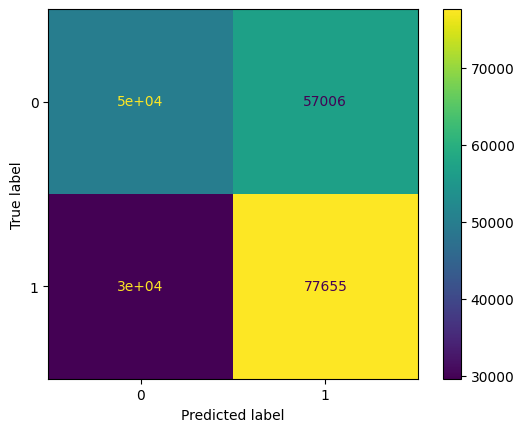

------------------------------------- ROC Plot ---------------------------------


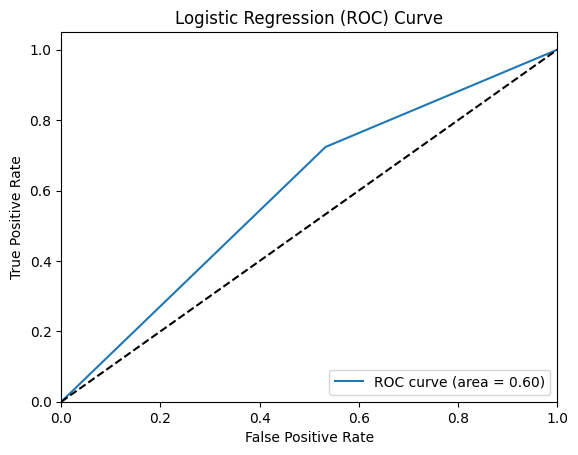

In [353]:
# Logistic Regression

model = LogisticRegression()
model_prediction("Logistic Regression", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

#### Decision Tree

---------------------Decision Tree Classifier statistics ------------------------------
Decision Tree Classifier Accuracy: 0.9714488384465331
Decision Tree Classifier ROC AUC score: 0.9714107730539073
Decision Tree Classifier Precision: 0.947840405095564
Decision Tree Classifier Recall: 0.9978936576727714
Decision Tree Classifier F1-score: 0.9722232311492083
---------------------------------------------------------------------------------


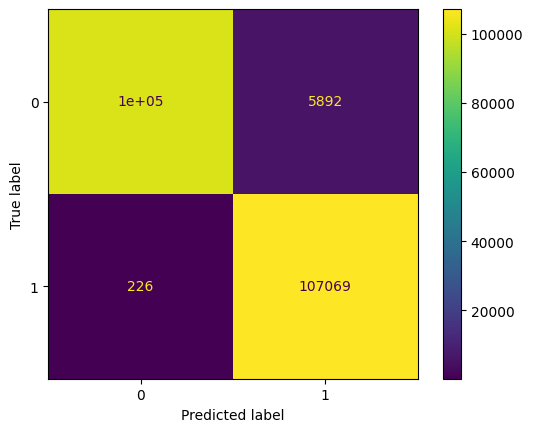

------------------------------------- ROC Plot ---------------------------------


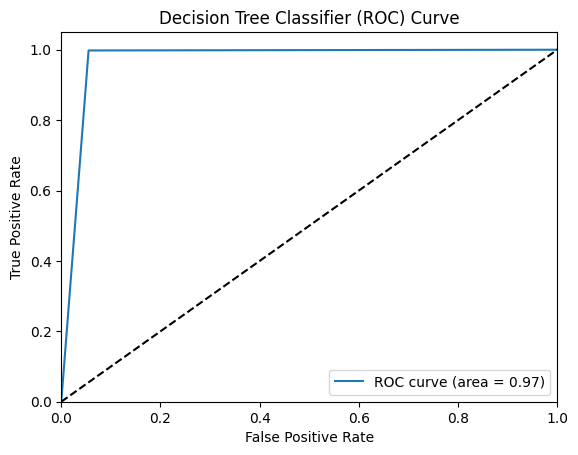

In [354]:
model = DecisionTreeClassifier()
model_prediction("Decision Tree Classifier", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

#### Ensemble Methods

#### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier statistics ------------------------------
Random Forest Classifier Accuracy: 0.9714488384465331
Random Forest Classifier ROC AUC score: 0.9714107730539073
Random Forest Classifier Precision: 0.947840405095564
Random Forest Classifier Recall: 0.9978936576727714
Random Forest Classifier F1-score: 0.9722232311492083
---------------------------------------------------------------------------------


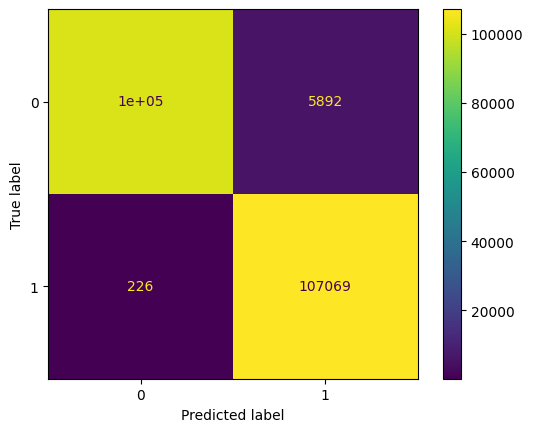

------------------------------------- ROC Plot ---------------------------------


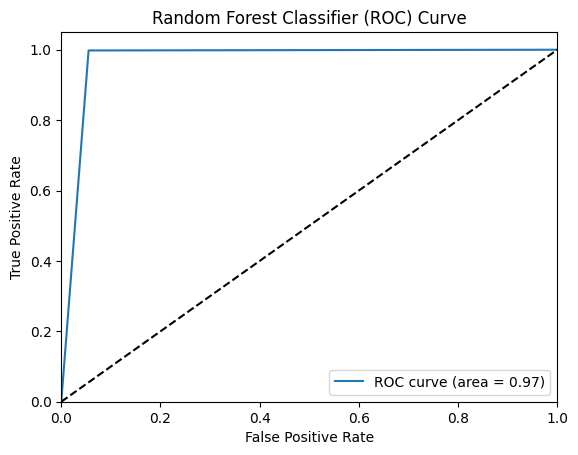

In [355]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

#### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier statistics ------------------------------
Bagging Classifier Accuracy: 0.9714395049514192
Bagging Classifier ROC AUC score: 0.9714014261239066
Bagging Classifier Precision: 0.9478236236643857
Bagging Classifier Recall: 0.9978936576727714
Bagging Classifier F1-score: 0.9722144031090812
---------------------------------------------------------------------------------


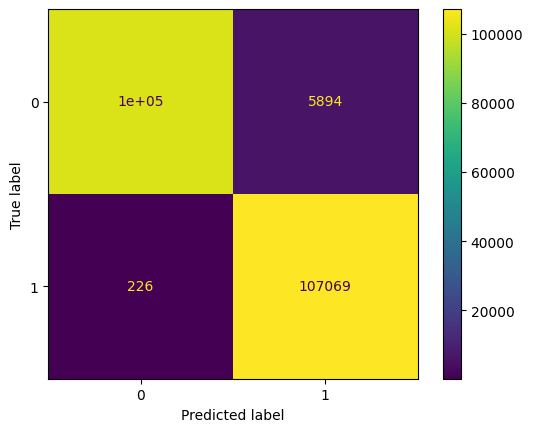

------------------------------------- ROC Plot ---------------------------------


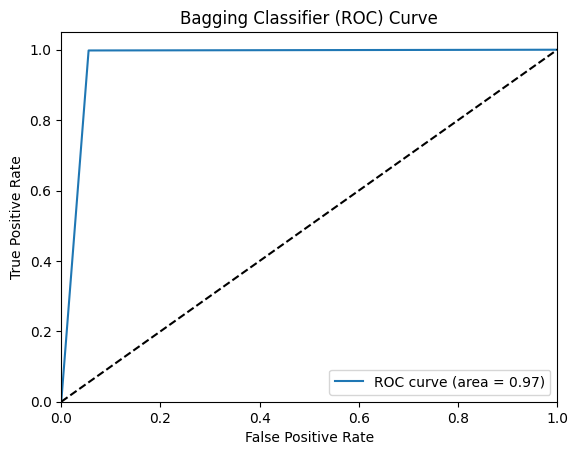

In [356]:
model = BaggingClassifier()
model_prediction("Bagging Classifier", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

#### XGBoost

---------------------XG Boosting Classifier statistics ------------------------------
XG Boosting Classifier Accuracy: 0.9682194491371183
XG Boosting Classifier ROC AUC score: 0.9681935181940916
XG Boosting Classifier Precision: 0.9520202247393186
XG Boosting Classifier Recall: 0.9862342140826693
XG Boosting Classifier F1-score: 0.9688252474295708
---------------------------------------------------------------------------------


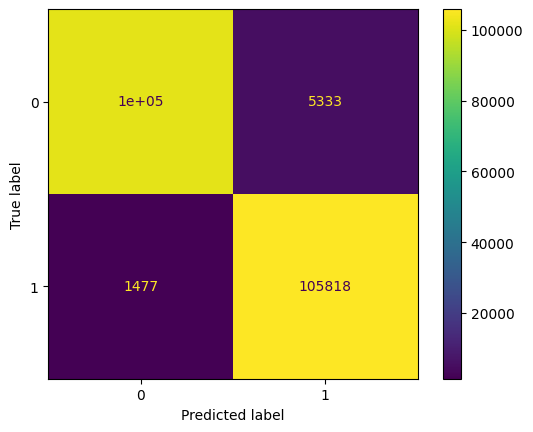

------------------------------------- ROC Plot ---------------------------------


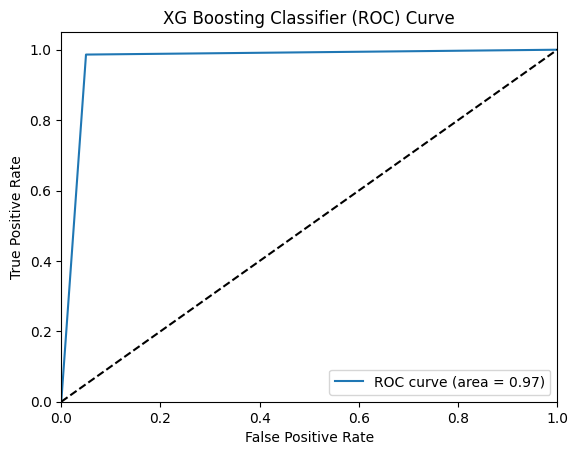

In [357]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

### Method 2 : Random over sampling of data (sampling_strategy = 0.7)

In [358]:
# Random oversampling takes the minority class samples and duplicates the records in such a way that number of samples in minority class are comparable to majority class
# By default the ratio of minority and majority class samples will be 0.7

In [359]:
# DataFrame copy (reset to clean data )

X = main_x.copy()
y = main_y.copy()

In [360]:
ros = RandomOverSampler(random_state=42, sampling_strategy=0.7)
print('Original dataset size', y.shape[0])

# oversampling
x_ros, y_ros = ros.fit_resample(X, y)

print('Over sampling dataset size with sampling strategy of 0.7 is : ', y_ros.shape[0])

Original dataset size 537667
Over sampling dataset size with sampling strategy of 0.7 is :  910698


In [361]:
print(y_ros.value_counts())
y_ros.value_counts()[1]/y_ros.value_counts()[0]

Target
0         535705
1         374993
dtype: int64


0.6999990666504886

In [362]:
# Splitting the data into train and test
# train to test ratio is 4:1

from sklearn.model_selection import train_test_split
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(x_ros, y_ros, random_state=0, train_size = 0.8)

In [363]:
stats_after_over_sampling_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.595645                  0.971449   
1  ROC AUC score             0.595461                  0.971411   
2      Precision             0.576670                  0.947840   
3         Recall             0.723752                  0.997894   
4       F1-score             0.641894                  0.972223   

   Random Forest Classifier  Bagging Classifier  XG Boosting Classifier  
0                  0.971449            0.971440                0.968219  
1                  0.971411            0.971401                0.968194  
2                  0.947840            0.947824                0.952020  
3                  0.997894            0.997894                0.986234  
4                  0.972223            0.972214                0.968825

#### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Logistic Regression(0.7) statistics ------------------------------
Logistic Regression(0.7) Accuracy: 0.6037224113319425
Logistic Regression(0.7) ROC AUC score: 0.54625560663356
Logistic Regression(0.7) Precision: 0.5412614347616755
Logistic Regression(0.7) Recall: 0.22559499123734097
Logistic Regression(0.7) F1-score: 0.31845822631817494
---------------------------------------------------------------------------------


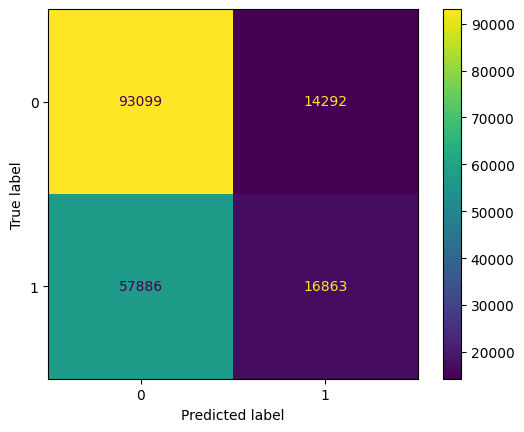

------------------------------------- ROC Plot ---------------------------------


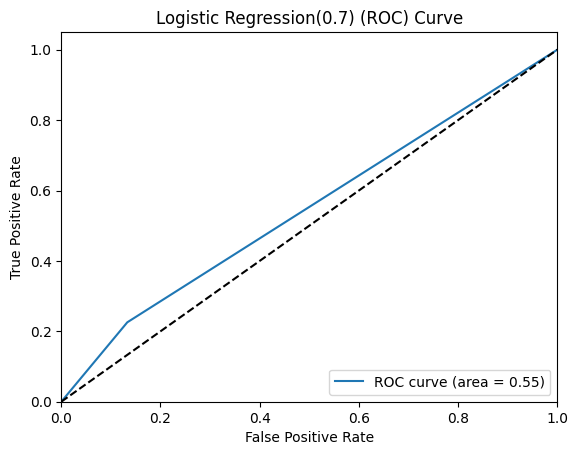

In [364]:
# Logistic Regression

model = LogisticRegression()
model_prediction("Logistic Regression(0.7)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

#### Decision Tree

---------------------Decision Tree Classifier(0.7) statistics ------------------------------
Decision Tree Classifier(0.7) Accuracy: 0.9669869331283628
Decision Tree Classifier(0.7) ROC AUC score: 0.9707639385474589
Decision Tree Classifier(0.7) Precision: 0.9320736214829901
Decision Tree Classifier(0.7) Recall: 0.9918393557104442
Decision Tree Classifier(0.7) F1-score: 0.9610281869972973
---------------------------------------------------------------------------------


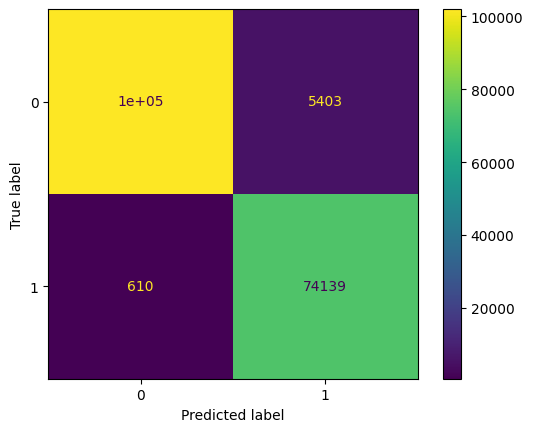

------------------------------------- ROC Plot ---------------------------------


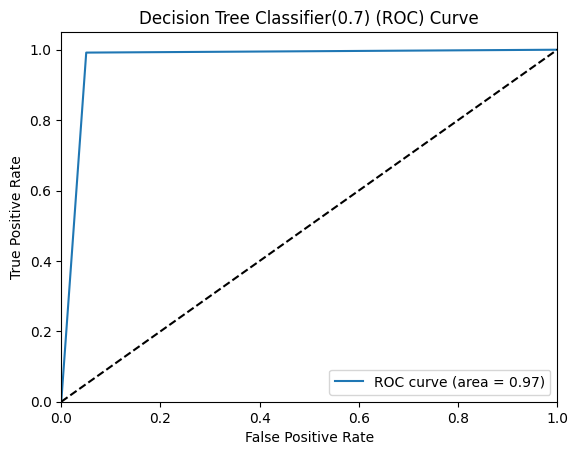

In [365]:
model = DecisionTreeClassifier()
model_prediction("Decision Tree Classifier(0.7)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

#### Ensemble Methods

##### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier(0.7) statistics ------------------------------
Random Forest Classifier(0.7) Accuracy: 0.9669869331283628
Random Forest Classifier(0.7) ROC AUC score: 0.9707639385474589
Random Forest Classifier(0.7) Precision: 0.9320736214829901
Random Forest Classifier(0.7) Recall: 0.9918393557104442
Random Forest Classifier(0.7) F1-score: 0.9610281869972973
---------------------------------------------------------------------------------


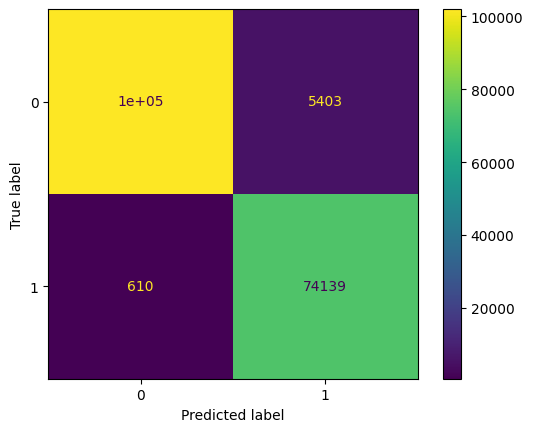

------------------------------------- ROC Plot ---------------------------------


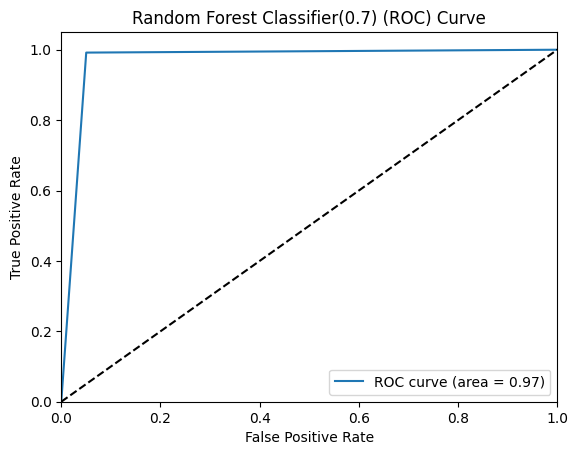

In [366]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier(0.7)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

##### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier(0.7) statistics ------------------------------
Bagging Classifier(0.7) Accuracy: 0.9669869331283628
Bagging Classifier(0.7) ROC AUC score: 0.9707639385474589
Bagging Classifier(0.7) Precision: 0.9320736214829901
Bagging Classifier(0.7) Recall: 0.9918393557104442
Bagging Classifier(0.7) F1-score: 0.9610281869972973
---------------------------------------------------------------------------------


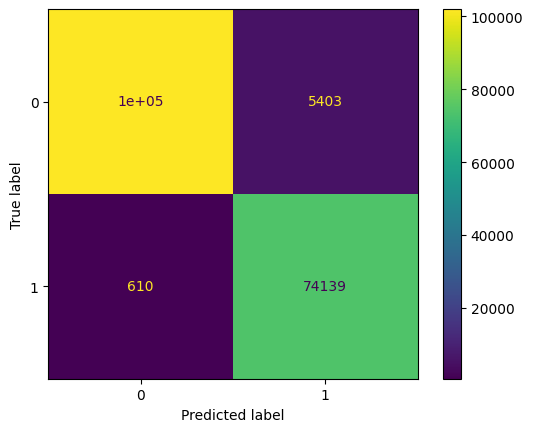

------------------------------------- ROC Plot ---------------------------------


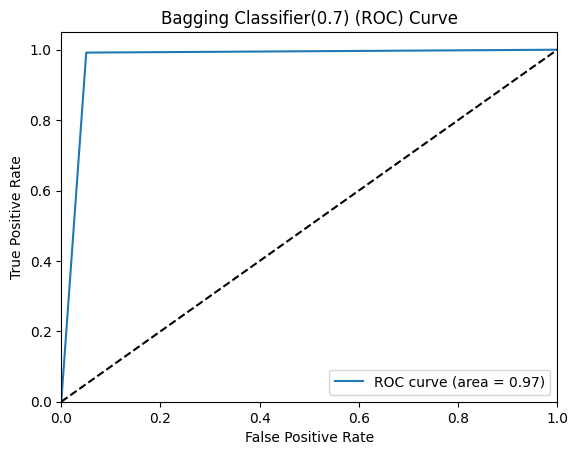

In [367]:
model = BaggingClassifier()
model_prediction("Bagging Classifier(0.7)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

##### XGBoost

---------------------XG Boosting Classifier(0.7) statistics ------------------------------
XG Boosting Classifier(0.7) Accuracy: 0.9652410233886022
XG Boosting Classifier(0.7) ROC AUC score: 0.9673620227917793
XG Boosting Classifier(0.7) Precision: 0.9387456714120815
XG Boosting Classifier(0.7) Recall: 0.9791970461143293
XG Boosting Classifier(0.7) F1-score: 0.9585447783183495
---------------------------------------------------------------------------------


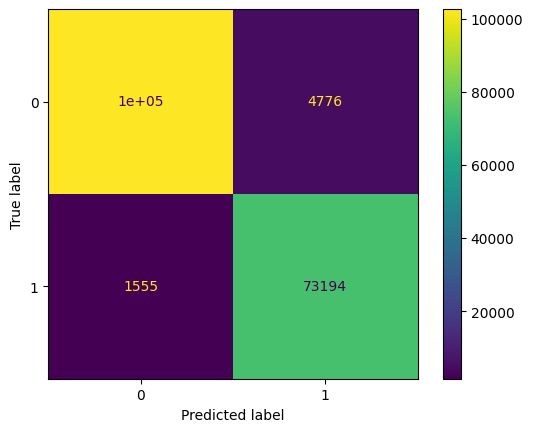

------------------------------------- ROC Plot ---------------------------------


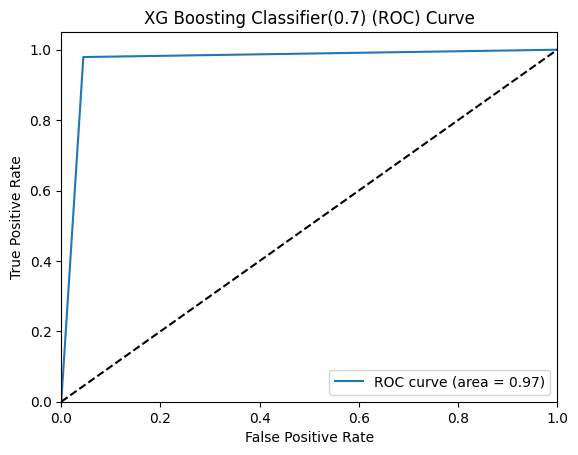

In [368]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier(0.7)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

### Method 3 : SMOTE(Synthetic Minority Oversampling Technique)

In [369]:
# This method is an alternative to random sampling where it will not just duplicate the minority class samples
# SMOTE techniques takes difference between a sample and its nearest neighbour
# Multiply the difference by a random number between 0 and 1
# Add this difference to the sample to generate a new synthetic example in feature space
# Continue on with next nearest neighbour untill the size of samples in different classes are in the given ratio

In [370]:
# DataFrame copy (reset to clean data )

X = main_x.copy()
y = main_y.copy()

In [371]:
smote = SMOTE()

print('Original dataset shape', y.shape)

x_ros, y_ros = smote.fit_resample(X, y)

print('Over sampling dataset size with SMOTE technique : ', y_ros.shape[0])

Original dataset shape (537667, 1)
Over sampling dataset size with SMOTE technique :  1071410


In [372]:
print(y_ros.value_counts())
y_ros.value_counts()[1]/y_ros.value_counts()[0]

Target
0         535705
1         535705
dtype: int64


1.0

In [373]:
# Splitting the data into train and test
# train to test ratio is 4:1

from sklearn.model_selection import train_test_split
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(x_ros, y_ros, random_state=0, train_size = 0.8)

In [374]:
stats_after_over_sampling_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.595645                  0.971449   
1  ROC AUC score             0.595461                  0.971411   
2      Precision             0.576670                  0.947840   
3         Recall             0.723752                  0.997894   
4       F1-score             0.641894                  0.972223   

   Random Forest Classifier  Bagging Classifier  XG Boosting Classifier  \
0                  0.971449            0.971440                0.968219   
1                  0.971411            0.971401                0.968194   
2                  0.947840            0.947824                0.952020   
3                  0.997894            0.997894                0.986234   
4                  0.972223            0.972214                0.968825   

   Logistic Regression(0.7)  Decision Tree Classifier(0.7)  \
0                  0.603722                       0.966987   
1                  0.546256                       0.970764   
2                  0.541261                       0.932074   
3                  0.225595                       0.991839   
4                  0.318458                       0.961028   

   Random Forest Classifier(0.7)  Bagging Classifier(0.7)  \
0                       0.966987                 0.966987   
1                       0.970764                 0.970764   
2                       0.932074                 0.932074   
3                       0.991839                 0.991839   
4                       0.961028                 0.961028   

   XG Boosting Classifier(0.7)  
0                     0.965241  
1                     0.967362  
2                     0.938746  
3                     0.979197  
4                     0.958545

#### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Logistic Regression(smote-1) statistics ------------------------------
Logistic Regression(smote-1) Accuracy: 0.599635060341046
Logistic Regression(smote-1) ROC AUC score: 0.5994495070280196
Logistic Regression(smote-1) Precision: 0.5797424981829509
Logistic Regression(smote-1) Recall: 0.7285428025537071
Logistic Regression(smote-1) F1-score: 0.6456806082707978
---------------------------------------------------------------------------------


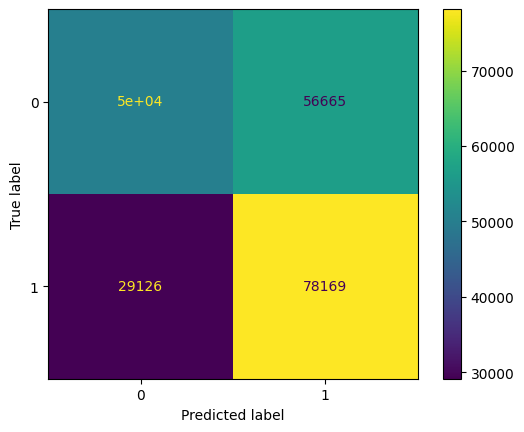

------------------------------------- ROC Plot ---------------------------------


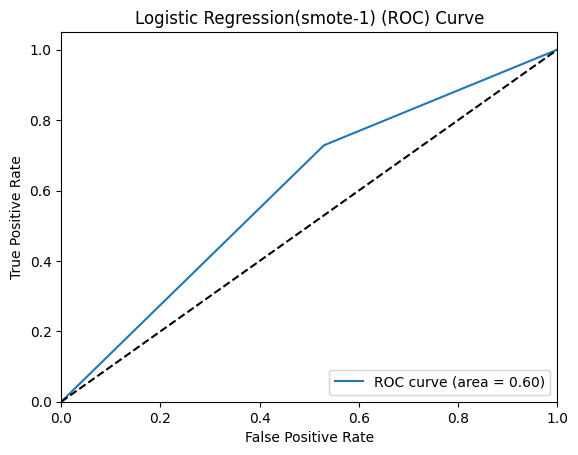

In [375]:
# Logistic Regression

model = LogisticRegression()
model_prediction("Logistic Regression(smote-1)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

#### Decision Tree

---------------------Decision Tree Classifier(smote-1) statistics ------------------------------
Decision Tree Classifier(smote-1) Accuracy: 0.9805303291923727
Decision Tree Classifier(smote-1) ROC AUC score: 0.9805102192245444
Decision Tree Classifier(smote-1) Precision: 0.9675211040285799
Decision Tree Classifier(smote-1) Recall: 0.9945011417121021
Decision Tree Classifier(smote-1) F1-score: 0.9808256197663409
---------------------------------------------------------------------------------


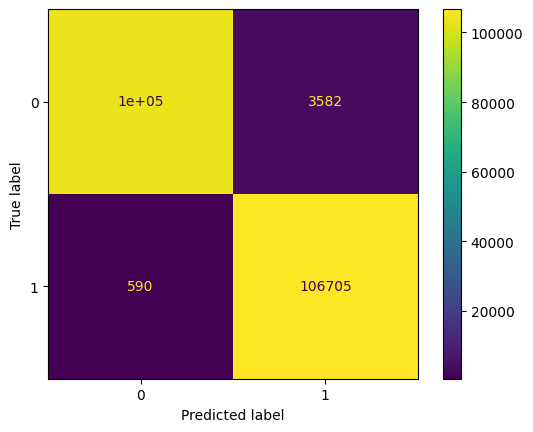

------------------------------------- ROC Plot ---------------------------------


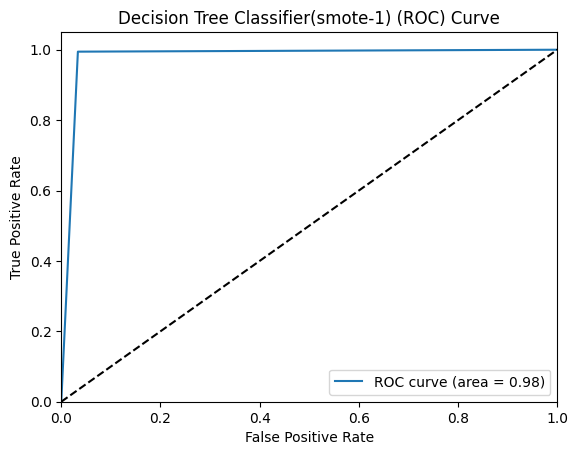

In [376]:
model = DecisionTreeClassifier()
model_prediction("Decision Tree Classifier(smote-1)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

#### Ensemble Methods

##### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier(smote-1) statistics ------------------------------
Random Forest Classifier(smote-1) Accuracy: 0.980712332347094
Random Forest Classifier(smote-1) ROC AUC score: 0.9806916660077232
Random Forest Classifier(smote-1) Precision: 0.9673461991483193
Random Forest Classifier(smote-1) Recall: 0.995069667738478
Random Forest Classifier(smote-1) F1-score: 0.9810121057588496
---------------------------------------------------------------------------------


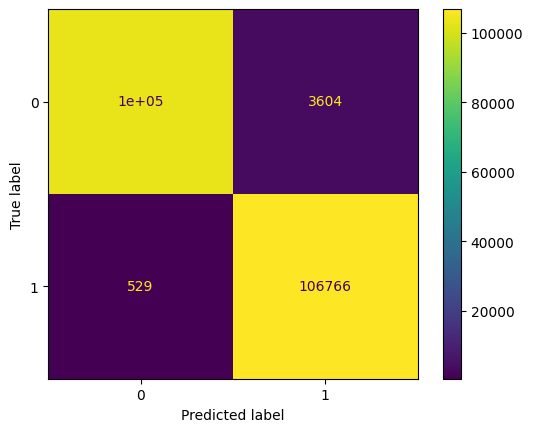

------------------------------------- ROC Plot ---------------------------------


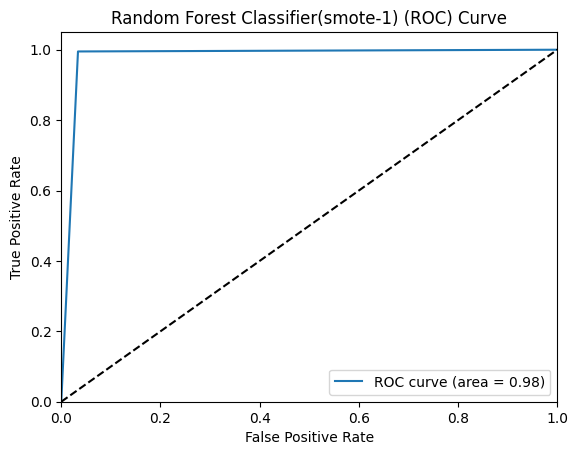

In [377]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier(smote-1)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

##### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier(smote-1) statistics ------------------------------
Bagging Classifier(smote-1) Accuracy: 0.9805489961826005
Bagging Classifier(smote-1) ROC AUC score: 0.9805285508632409
Bagging Classifier(smote-1) Precision: 0.9673273697852941
Bagging Classifier(smote-1) Recall: 0.9947527843795144
Bagging Classifier(smote-1) F1-score: 0.9808484046463756
---------------------------------------------------------------------------------


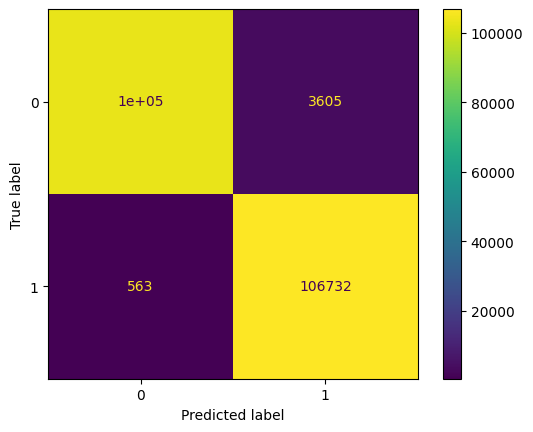

------------------------------------- ROC Plot ---------------------------------


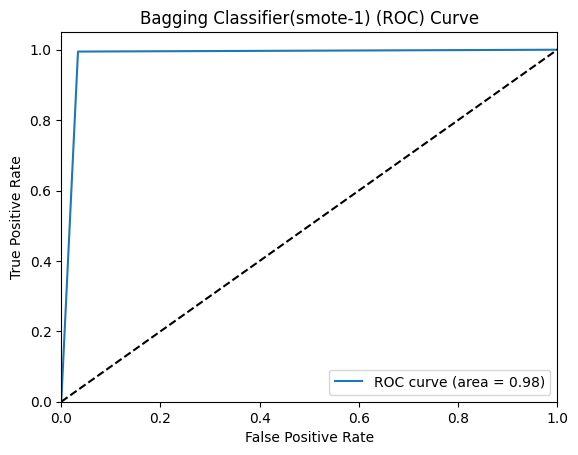

In [378]:
model = BaggingClassifier()
model_prediction("Bagging Classifier(smote-1)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

##### XGBoost

---------------------XG Boosting Classifier(smote-1) statistics ------------------------------
XG Boosting Classifier(smote-1) Accuracy: 0.9698294770442688
XG Boosting Classifier(smote-1) ROC AUC score: 0.9698236258787962
XG Boosting Classifier(smote-1) Precision: 0.9661236339429353
XG Boosting Classifier(smote-1) Recall: 0.9738944032806748
XG Boosting Classifier(smote-1) F1-score: 0.9699934556492599
---------------------------------------------------------------------------------


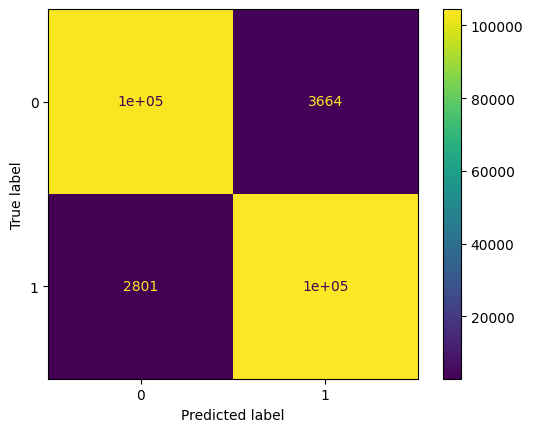

------------------------------------- ROC Plot ---------------------------------


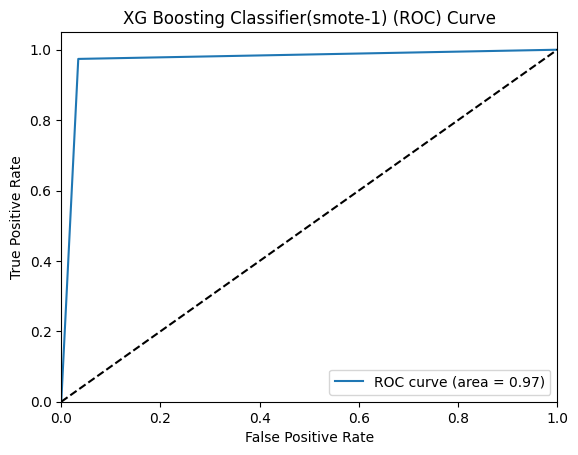

In [379]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier(smote-1)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

### Method 4 : SMOTE(Synthetic Minority Oversampling Technique) with sampling strategy equal to 0.5

In [380]:
# This method is an alternative to random sampling where it will not just duplicate the minority class samples
# SMOTE techniques takes difference between a sample and its nearest neighbour
# Multiply the difference by a random number between 0 and 1
# Add this difference to the sample to generate a new synthetic example in feature space
# Continue on with next nearest neighbour untill the size of samples in different classes are in the given ratio

In [381]:
# DataFrame copy (reset to clean data )

X = main_x.copy()
y = main_y.copy()

In [382]:
smote = SMOTE(sampling_strategy = 0.5)

print('Original dataset shape', y.shape)

x_ros, y_ros = smote.fit_resample(X, y)

print('Over sampling dataset size with SMOTE technique : ', y_ros.shape[0])

Original dataset shape (537667, 1)
Over sampling dataset size with SMOTE technique :  803557


In [383]:
print(y_ros.value_counts())
y_ros.value_counts()[1]/y_ros.value_counts()[0]

Target
0         535705
1         267852
dtype: int64


0.4999990666504886

In [384]:
# Splitting the data into train and test
# train to test ratio is 4:1

from sklearn.model_selection import train_test_split
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(x_ros, y_ros, random_state=0, train_size = 0.8)

In [385]:
stats_after_over_sampling_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.595645                  0.971449   
1  ROC AUC score             0.595461                  0.971411   
2      Precision             0.576670                  0.947840   
3         Recall             0.723752                  0.997894   
4       F1-score             0.641894                  0.972223   

   Random Forest Classifier  Bagging Classifier  XG Boosting Classifier  \
0                  0.971449            0.971440                0.968219   
1                  0.971411            0.971401                0.968194   
2                  0.947840            0.947824                0.952020   
3                  0.997894            0.997894                0.986234   
4                  0.972223            0.972214                0.968825   

   Logistic Regression(0.7)  Decision Tree Classifier(0.7)  \
0                  0.603722                       0.966987   
1                  0.546256                       0.970764   
2                  0.541261                       0.932074   
3                  0.225595                       0.991839   
4                  0.318458                       0.961028   

   Random Forest Classifier(0.7)  Bagging Classifier(0.7)  \
0                       0.966987                 0.966987   
1                       0.970764                 0.970764   
2                       0.932074                 0.932074   
3                       0.991839                 0.991839   
4                       0.961028                 0.961028   

   XG Boosting Classifier(0.7)  Logistic Regression(smote-1)  \
0                     0.965241                      0.599635   
1                     0.967362                      0.599450   
2                     0.938746                      0.579742   
3                     0.979197                      0.728543   
4                     0.958545                      0.645681   

   Decision Tree Classifier(smote-1)  Random Forest Classifier(smote-1)  \
0                           0.980530                           0.980712   
1                           0.980510                           0.980692   
2                           0.967521                           0.967346   
3                           0.994501                           0.995070   
4                           0.980826                           0.981012   

   Bagging Classifier(smote-1)  XG Boosting Classifier(smote-1)  
0                     0.980549                         0.969829  
1                     0.980529                         0.969824  
2                     0.967327                         0.966124  
3                     0.994753                         0.973894  
4                     0.980848                         0.969993

#### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------------------Logistic Regression(smote-0.5) statistics ------------------------------
Logistic Regression(smote-0.5) Accuracy: 0.6664654786201404
Logistic Regression(smote-0.5) ROC AUC score: 0.5
Logistic Regression(smote-0.5) Precision: 0.0
Logistic Regression(smote-0.5) Recall: 0.0
Logistic Regression(smote-0.5) F1-score: 0.0
---------------------------------------------------------------------------------


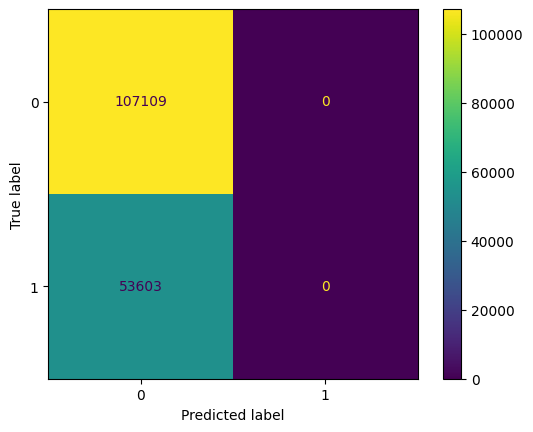

------------------------------------- ROC Plot ---------------------------------


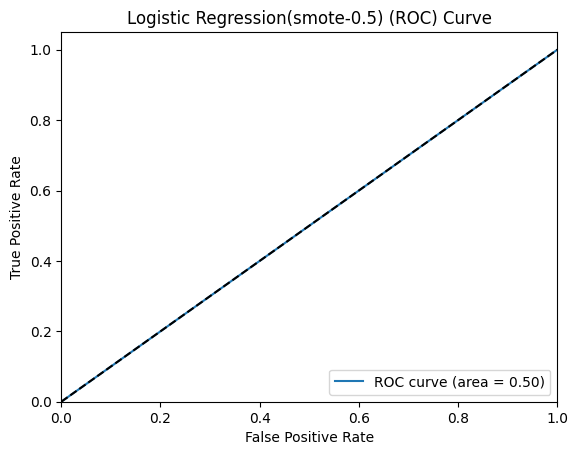

In [386]:
# Logistic Regression

model = LogisticRegression()
model_prediction("Logistic Regression(smote-0.5)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

#### Decision Tree

---------------------Decision Tree Classifier(smote-0.5) statistics ------------------------------
Decision Tree Classifier(smote-0.5) Accuracy: 0.9757640997560855
Decision Tree Classifier(smote-0.5) ROC AUC score: 0.9788307236260908
Decision Tree Classifier(smote-0.5) Precision: 0.942116123523552
Decision Tree Classifier(smote-0.5) Recall: 0.988041714083167
Decision Tree Classifier(smote-0.5) F1-score: 0.964532549012466
---------------------------------------------------------------------------------


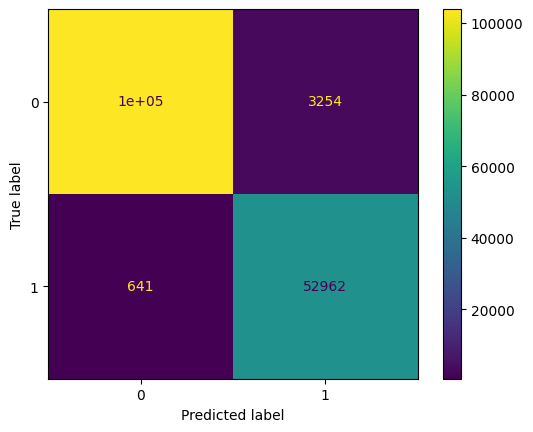

------------------------------------- ROC Plot ---------------------------------


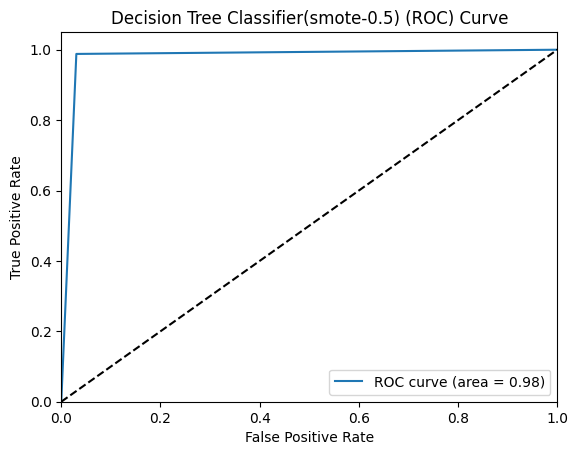

In [387]:
model = DecisionTreeClassifier()
model_prediction("Decision Tree Classifier(smote-0.5)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

#### Ensemble Methods

##### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier(smote-0.5) statistics ------------------------------
Random Forest Classifier(smote-0.5) Accuracy: 0.9760752152919508
Random Forest Classifier(smote-0.5) ROC AUC score: 0.9793017751268488
Random Forest Classifier(smote-0.5) Precision: 0.9421518447430156
Random Forest Classifier(smote-0.5) Recall: 0.9889931533682816
Random Forest Classifier(smote-0.5) F1-score: 0.9650044142676412
---------------------------------------------------------------------------------


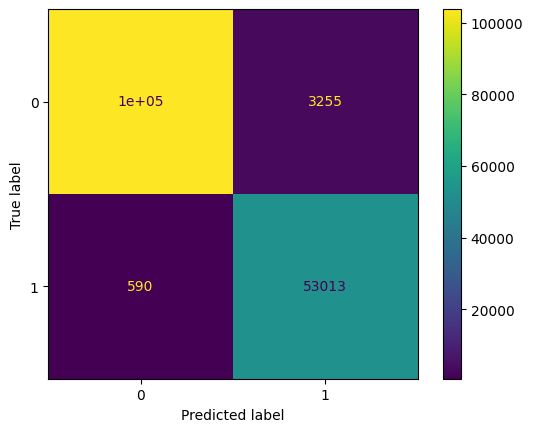

------------------------------------- ROC Plot ---------------------------------


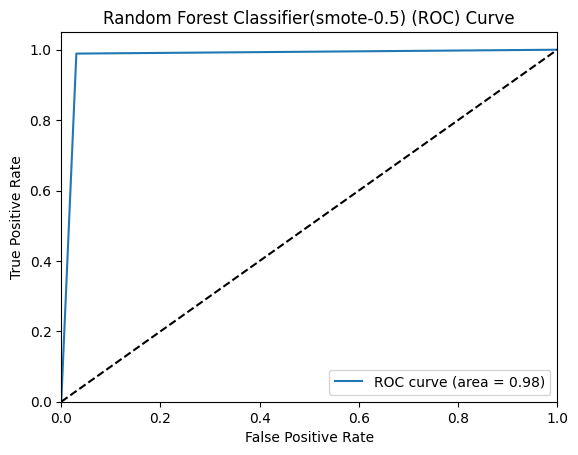

In [388]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier(smote-0.5)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

##### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier(smote-0.5) statistics ------------------------------
Bagging Classifier(smote-0.5) Accuracy: 0.9756458758524565
Bagging Classifier(smote-0.5) ROC AUC score: 0.9785556411587368
Bagging Classifier(smote-0.5) Precision: 0.9424272103997863
Bagging Classifier(smote-0.5) Recall: 0.987295487192881
Bagging Classifier(smote-0.5) F1-score: 0.9643397292224714
---------------------------------------------------------------------------------


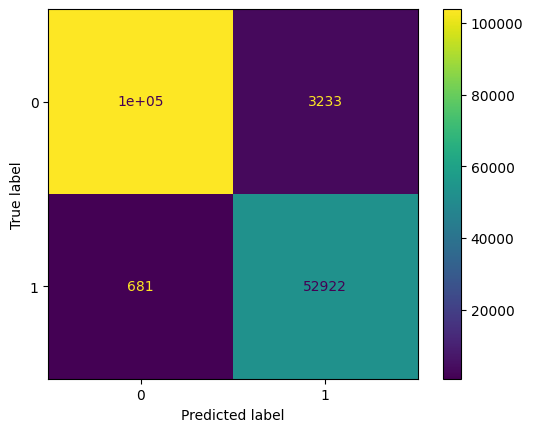

------------------------------------- ROC Plot ---------------------------------


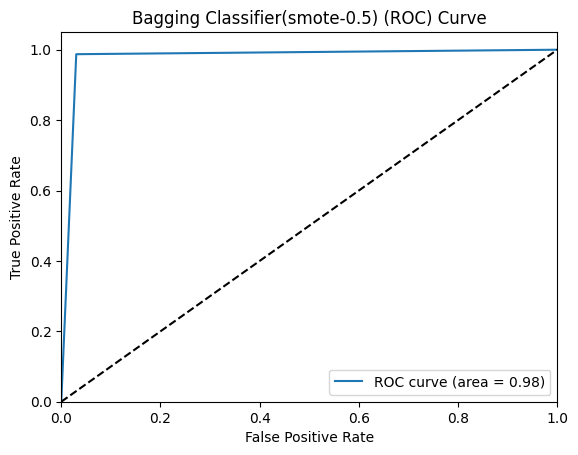

In [389]:
model = BaggingClassifier()
model_prediction("Bagging Classifier(smote-0.5)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

##### XGBoost

---------------------XG Boosting Classifier(smote-0.5) statistics ------------------------------
XG Boosting Classifier(smote-0.5) Accuracy: 0.9645763850863657
XG Boosting Classifier(smote-0.5) ROC AUC score: 0.9616072839169905
XG Boosting Classifier(smote-0.5) Precision: 0.9417785482443198
XG Boosting Classifier(smote-0.5) Recall: 0.9526892151558681
XG Boosting Classifier(smote-0.5) F1-score: 0.9472024632049486
---------------------------------------------------------------------------------


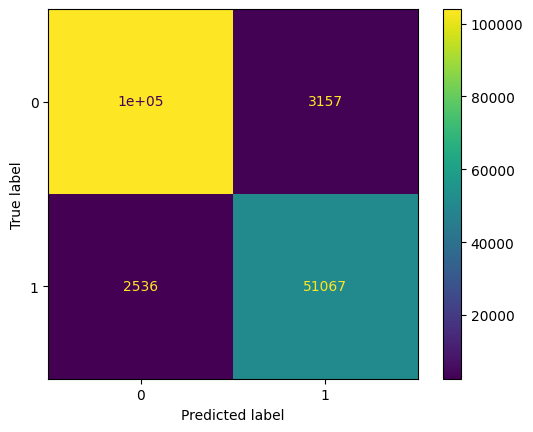

------------------------------------- ROC Plot ---------------------------------


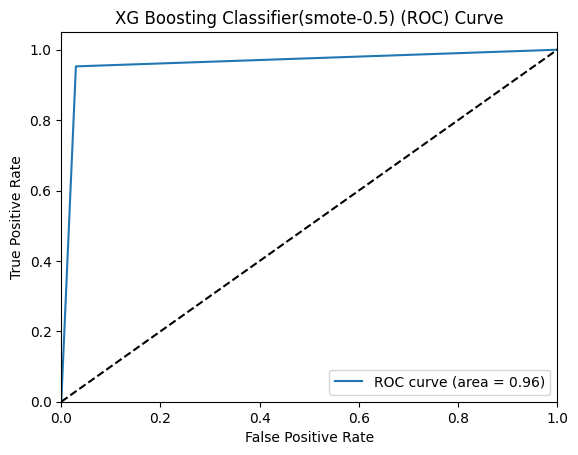

In [390]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier(smote-0.5)", model, X_ros_train, y_ros_train, X_ros_test, y_ros_test, stats_after_over_sampling_data)

### Balanced Data using Over Sampling Method- Model Comparision

In [391]:
stats_after_over_sampling_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.595645                  0.971449   
1  ROC AUC score             0.595461                  0.971411   
2      Precision             0.576670                  0.947840   
3         Recall             0.723752                  0.997894   
4       F1-score             0.641894                  0.972223   

   Random Forest Classifier  Bagging Classifier  XG Boosting Classifier  \
0                  0.971449            0.971440                0.968219   
1                  0.971411            0.971401                0.968194   
2                  0.947840            0.947824                0.952020   
3                  0.997894            0.997894                0.986234   
4                  0.972223            0.972214                0.968825   

   Logistic Regression(0.7)  Decision Tree Classifier(0.7)  \
0                  0.603722                       0.966987   
1                  0.546256                       0.970764   
2                  0.541261                       0.932074   
3                  0.225595                       0.991839   
4                  0.318458                       0.961028   

   Random Forest Classifier(0.7)  Bagging Classifier(0.7)  ...  \
0                       0.966987                 0.966987  ...   
1                       0.970764                 0.970764  ...   
2                       0.932074                 0.932074  ...   
3                       0.991839                 0.991839  ...   
4                       0.961028                 0.961028  ...   

   Logistic Regression(smote-1)  Decision Tree Classifier(smote-1)  \
0                      0.599635                           0.980530   
1                      0.599450                           0.980510   
2                      0.579742                           0.967521   
3                      0.728543                           0.994501   
4                      0.645681                           0.980826   

   Random Forest Classifier(smote-1)  Bagging Classifier(smote-1)  \
0                           0.980712                     0.980549   
1                           0.980692                     0.980529   
2                           0.967346                     0.967327   
3                           0.995070                     0.994753   
4                           0.981012                     0.980848   

   XG Boosting Classifier(smote-1)  Logistic Regression(smote-0.5)  \
0                         0.969829                        0.666465   
1                         0.969824                        0.500000   
2                         0.966124                        0.000000   
3                         0.973894                        0.000000   
4                         0.969993                        0.000000   

   Decision Tree Classifier(smote-0.5)  Random Forest Classifier(smote-0.5)  \
0                             0.975764                             0.976075   
1                             0.978831                             0.979302   
2                             0.942116                             0.942152   
3                             0.988042                             0.988993   
4                             0.964533                             0.965004   

   Bagging Classifier(smote-0.5)  XG Boosting Classifier(smote-0.5)  
0                       0.975646                           0.964576  
1                       0.978556                           0.961607  
2                       0.942427                           0.941779  
3                       0.987295                           0.952689  
4                       0.964340                           0.947202  

[5 rows x 21 columns]

In [392]:
# Observation on above statistics
# After balancing data with over sampling method where number of samples in both classes are equal
# We can see that there is a major change in ROC AUC, F1 Score 
# Coming to Linear regression accuracy is reduced from nearly 100% to 60% but we can see that it is able to predict defaulters way better compared to imbalanced data which increase both ROC AUC and F1-Score for Logistic regression
# And all other complex classifiers are able to predict well on testing data which we can see by improvement in all the metrics with just a small change in accuracy 

# As we decrease the sampling from 1 to 0.7 that is the ratio of samples in minority class vs samples in majority class the accuracy of linear regression is increased but F1 score is decreased.
# And all the metrics of complex models like decision trees and other ensemble methods tend to decrease very minutely



## Over Sampling train imbalanced dataset - After splitting data into train and test

In [393]:
# This way the testing data is still imbalanced but the training data set is balanced

In [394]:
# Splitting data into train and test

# Splitting the data into train and test
# train to test ratio is 4:1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.8)

### Method 1 : Random over sampling of data (1:1 ratio of both the samples)

In [395]:
# Random oversampling takes the minority class samples and duplicates the records in such a way that number of samples in minority class are comparable to majority class
# By default the ratio of minority and majority class samples will be 1:1

In [396]:
ros = RandomOverSampler(random_state=42)
print('Original training dataset size', y_train.shape[0])

# oversampling
x_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Over sampling training dataset size', y_ros.shape[0])

Original training dataset size 430133
Over sampling training dataset size 857160


In [397]:
print(y_ros.value_counts())
y_ros.value_counts()[1]/y_ros.value_counts()[0]

Target
0         428580
1         428580
dtype: int64


1.0

In [398]:
# Dataframe to store all the metrics related to each ML Model
stats_after_over_sampling_train_data = pd.DataFrame()
stats_after_over_sampling_train_data['Metrics'] = ['Accuracy', 'ROC AUC score', 'Precision', 'Recall', 'F1-score']

In [399]:
stats_after_over_sampling_train_data

Metrics
0       Accuracy
1  ROC AUC score
2      Precision
3         Recall
4       F1-score

#### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Logistic Regression statistics ------------------------------
Logistic Regression Accuracy: 0.4700652816783529
Logistic Regression ROC AUC score: 0.5903174832317204
Logistic Regression Precision: 0.005091061775048549
Logistic Regression Recall: 0.7114914425427873
Logistic Regression F1-score: 0.010109783212896052
---------------------------------------------------------------------------------


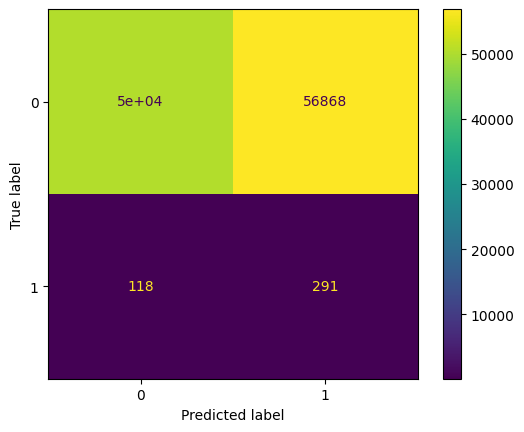

------------------------------------- ROC Plot ---------------------------------


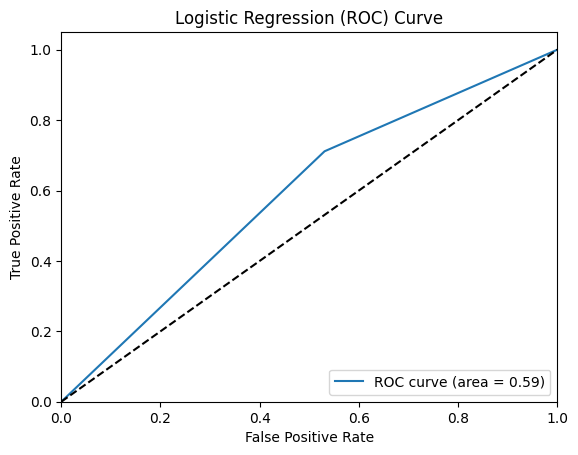

In [400]:
# Logistic Regression

model = LogisticRegression()
model_prediction("Logistic Regression", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

#### Decision Tree

---------------------Decision Tree Classifier statistics ------------------------------
Decision Tree Classifier Accuracy: 0.9453568173786895
Decision Tree Classifier ROC AUC score: 0.9555245254812232
Decision Tree Classifier Precision: 0.06312929518938788
Decision Tree Classifier Recall: 0.9657701711491442
Decision Tree Classifier F1-score: 0.11851185118511852
---------------------------------------------------------------------------------


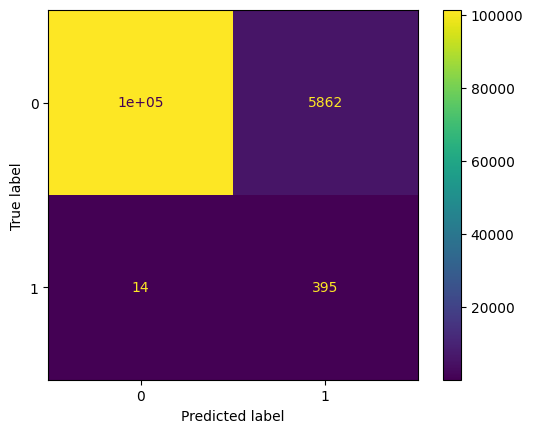

------------------------------------- ROC Plot ---------------------------------


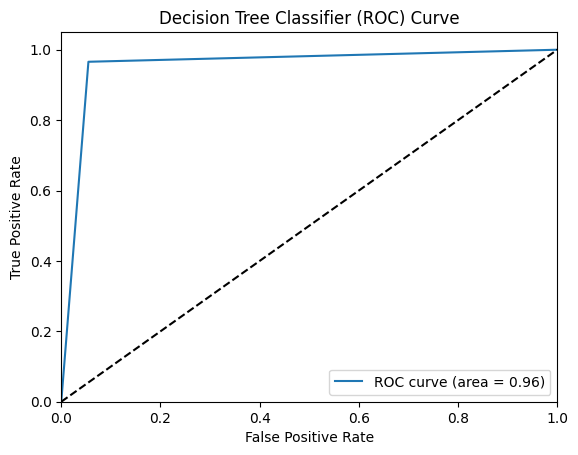

In [401]:
model = DecisionTreeClassifier()
model_prediction("Decision Tree Classifier", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

#### Ensemble Methods

#### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier statistics ------------------------------
Random Forest Classifier Accuracy: 0.9453568173786895
Random Forest Classifier ROC AUC score: 0.9555245254812232
Random Forest Classifier Precision: 0.06312929518938788
Random Forest Classifier Recall: 0.9657701711491442
Random Forest Classifier F1-score: 0.11851185118511852
---------------------------------------------------------------------------------


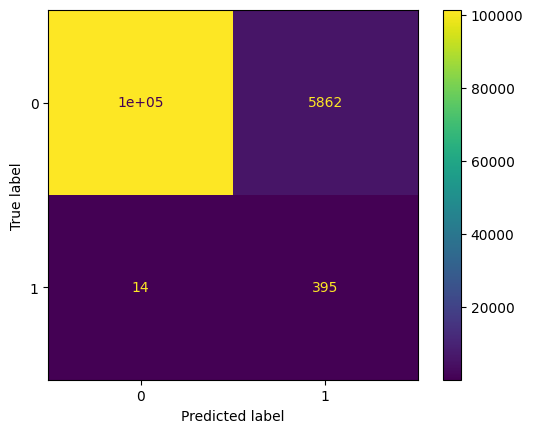

------------------------------------- ROC Plot ---------------------------------


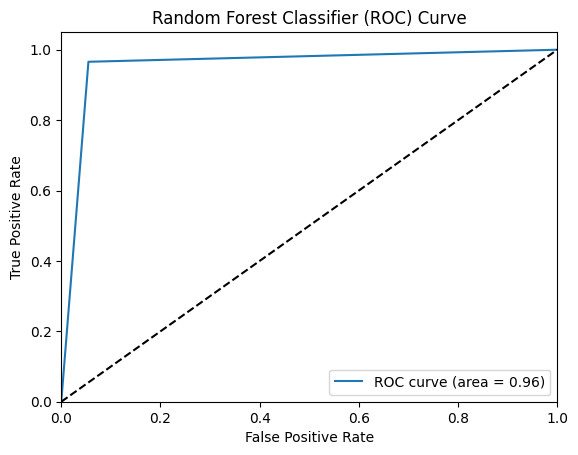

In [402]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

#### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier statistics ------------------------------
Bagging Classifier Accuracy: 0.9461007681291499
Bagging Classifier ROC AUC score: 0.9558979210471509
Bagging Classifier Precision: 0.06394689978954185
Bagging Classifier Recall: 0.9657701711491442
Bagging Classifier F1-score: 0.11995141208624355
---------------------------------------------------------------------------------


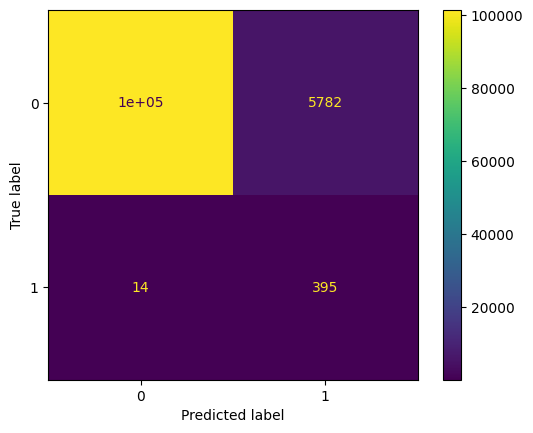

------------------------------------- ROC Plot ---------------------------------


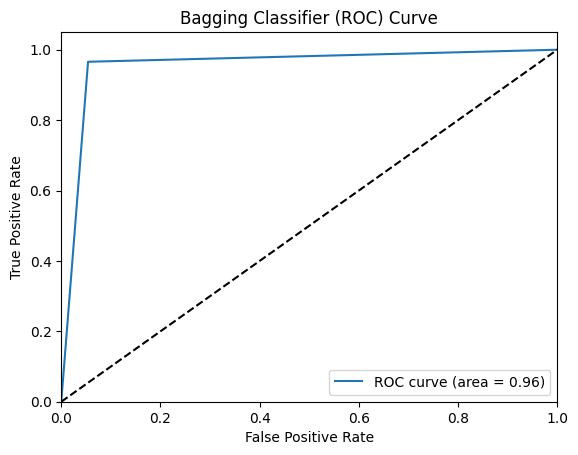

In [403]:
model = BaggingClassifier()
model_prediction("Bagging Classifier", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

#### XGBoost

---------------------XG Boosting Classifier statistics ------------------------------
XG Boosting Classifier Accuracy: 0.9487045957557609
XG Boosting Classifier ROC AUC score: 0.9572048055278977
XG Boosting Classifier Precision: 0.06698321180261149
XG Boosting Classifier Recall: 0.9657701711491442
XG Boosting Classifier F1-score: 0.1252775134792261
---------------------------------------------------------------------------------


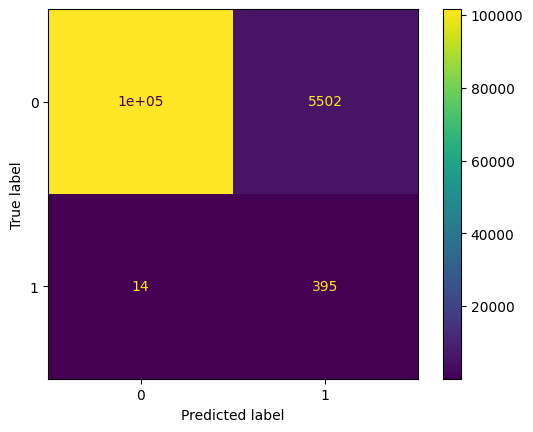

------------------------------------- ROC Plot ---------------------------------


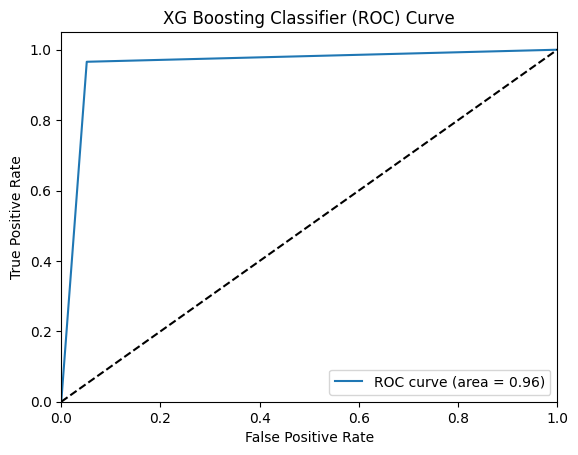

In [404]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

### Method 2 : Random over sampling of data (sampling_strategy = 0.7)

In [405]:
# Random oversampling takes the minority class samples and duplicates the records in such a way that number of samples in minority class are comparable to majority class
# By default the ratio of minority and majority class samples will be 0.7

In [406]:
ros = RandomOverSampler(random_state=42, sampling_strategy=0.7)
print('Original dataset size', y.shape[0])

# oversampling
x_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Over sampling training dataset size with sampling strategy of 0.7 is : ', y_ros.shape[0])

Original dataset size 537667
Over sampling training dataset size with sampling strategy of 0.7 is :  728586


In [407]:
print(y_ros.value_counts())
y_ros.value_counts()[1]/y_ros.value_counts()[0]

Target
0         428580
1         300006
dtype: int64


0.7

In [408]:
stats_after_over_sampling_train_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.470065                  0.945357   
1  ROC AUC score             0.590317                  0.955525   
2      Precision             0.005091                  0.063129   
3         Recall             0.711491                  0.965770   
4       F1-score             0.010110                  0.118512   

   Random Forest Classifier  Bagging Classifier  XG Boosting Classifier  
0                  0.945357            0.946101                0.948705  
1                  0.955525            0.955898                0.957205  
2                  0.063129            0.063947                0.066983  
3                  0.965770            0.965770                0.965770  
4                  0.118512            0.119951                0.125278

#### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Logistic Regression(0.7) statistics ------------------------------
Logistic Regression(0.7) Accuracy: 0.8506053899231871
Logistic Regression(0.7) ROC AUC score: 0.5353130411710835
Logistic Regression(0.7) Precision: 0.005620815965643552
Logistic Regression(0.7) Recall: 0.2176039119804401
Logistic Regression(0.7) F1-score: 0.010958566767222804
---------------------------------------------------------------------------------


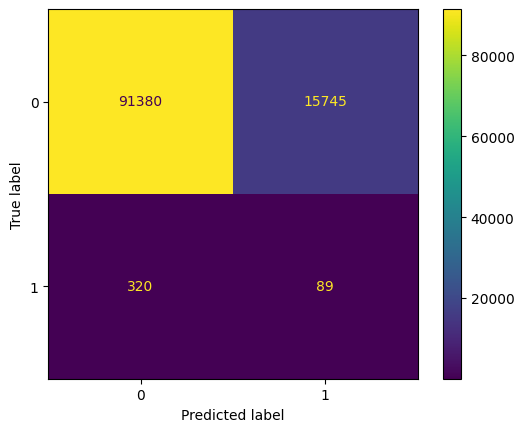

------------------------------------- ROC Plot ---------------------------------


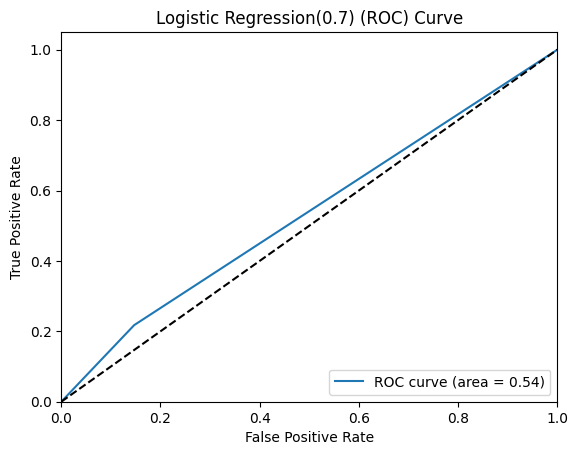

In [409]:
# Logistic Regression

model = LogisticRegression()
model_prediction("Logistic Regression(0.7)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

#### Decision Tree

---------------------Decision Tree Classifier(0.7) statistics ------------------------------
Decision Tree Classifier(0.7) Accuracy: 0.9491695649747987
Decision Tree Classifier(0.7) ROC AUC score: 0.9525668719847767
Decision Tree Classifier(0.7) Precision: 0.066963521150882
Decision Tree Classifier(0.7) Recall: 0.9559902200488998
Decision Tree Classifier(0.7) F1-score: 0.12516005121638923
---------------------------------------------------------------------------------


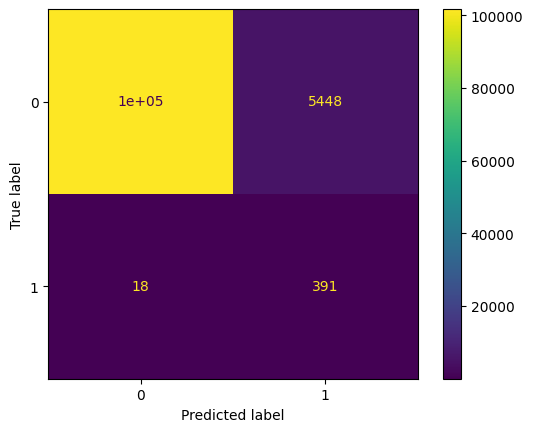

------------------------------------- ROC Plot ---------------------------------


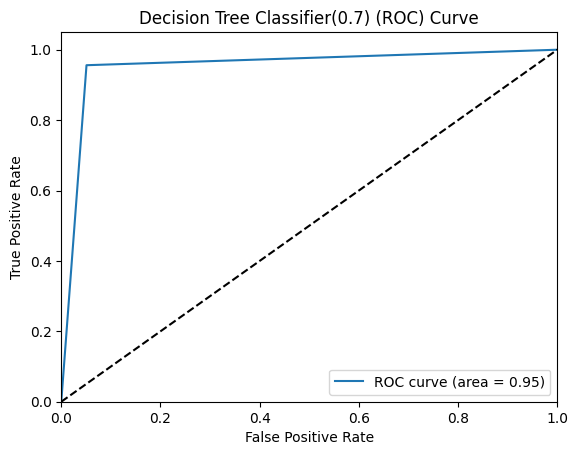

In [410]:
model = DecisionTreeClassifier()
model_prediction("Decision Tree Classifier(0.7)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

#### Ensemble Methods

##### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier(0.7) statistics ------------------------------
Random Forest Classifier(0.7) Accuracy: 0.9491695649747987
Random Forest Classifier(0.7) ROC AUC score: 0.9525668719847767
Random Forest Classifier(0.7) Precision: 0.066963521150882
Random Forest Classifier(0.7) Recall: 0.9559902200488998
Random Forest Classifier(0.7) F1-score: 0.12516005121638923
---------------------------------------------------------------------------------


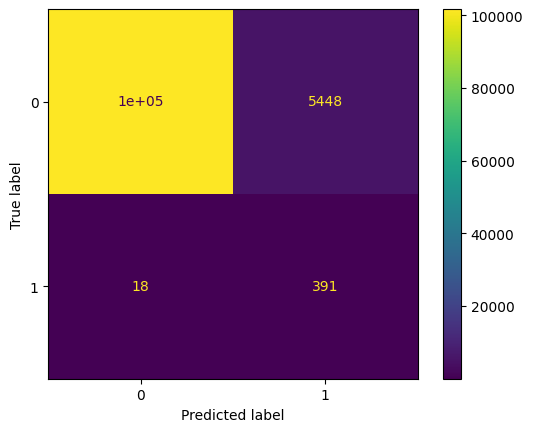

------------------------------------- ROC Plot ---------------------------------


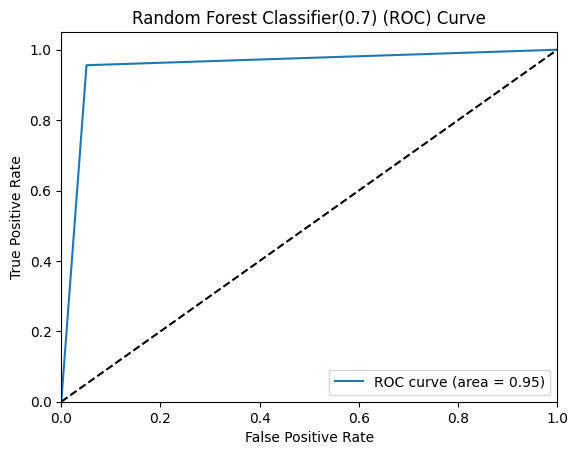

In [411]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier(0.7)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

##### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier(0.7) statistics ------------------------------
Bagging Classifier(0.7) Accuracy: 0.9496066360406941
Bagging Classifier(0.7) ROC AUC score: 0.9527862418797591
Bagging Classifier(0.7) Precision: 0.06750690607734806
Bagging Classifier(0.7) Recall: 0.9559902200488998
Bagging Classifier(0.7) F1-score: 0.12610869214642798
---------------------------------------------------------------------------------


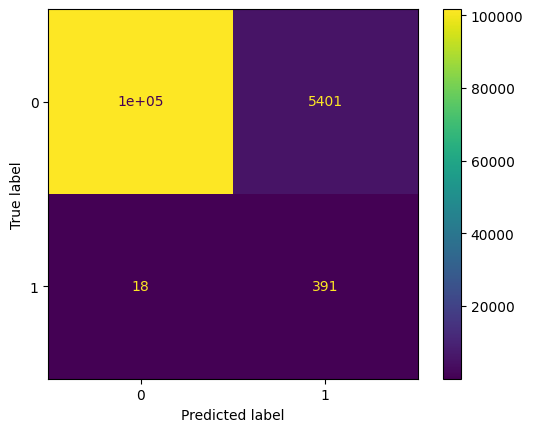

------------------------------------- ROC Plot ---------------------------------


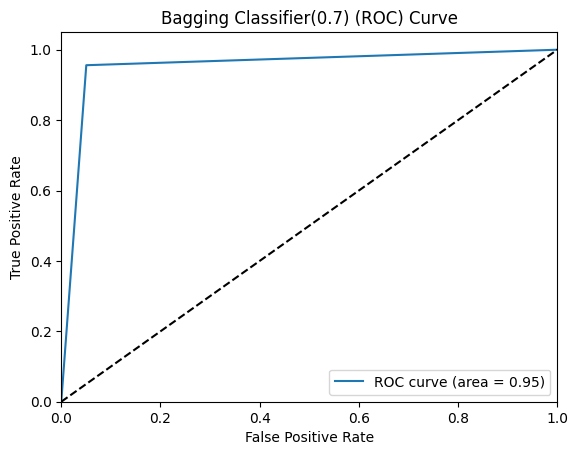

In [412]:
model = BaggingClassifier()
model_prediction("Bagging Classifier(0.7)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

##### XGBoost

---------------------XG Boosting Classifier(0.7) statistics ------------------------------
XG Boosting Classifier(0.7) Accuracy: 0.9564974798668329
XG Boosting Classifier(0.7) ROC AUC score: 0.9440665538795993
XG Boosting Classifier(0.7) Precision: 0.07573047107930829
XG Boosting Classifier(0.7) Recall: 0.9315403422982885
XG Boosting Classifier(0.7) F1-score: 0.14007352941176474
---------------------------------------------------------------------------------


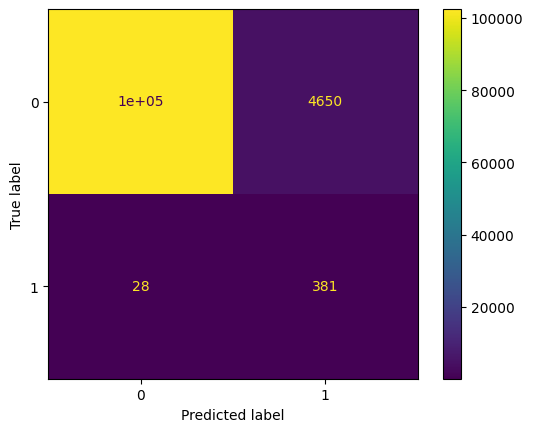

------------------------------------- ROC Plot ---------------------------------


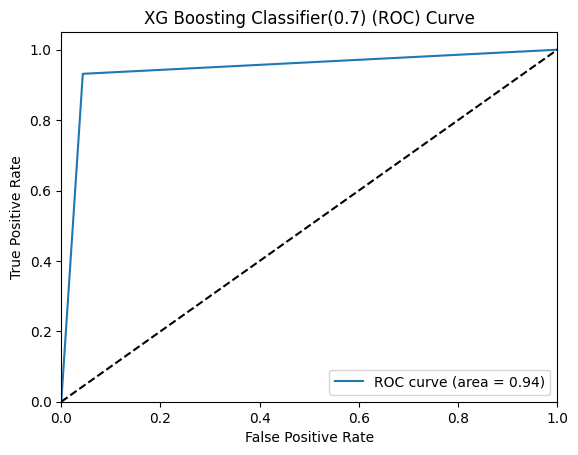

In [413]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier(0.7)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

### Method 3 : SMOTE(Synthetic Minority Oversampling Technique)

In [414]:
# This method is an alternative to random sampling where it will not just duplicate the minority class samples
# SMOTE techniques takes difference between a sample and its nearest neighbour
# Multiply the difference by a random number between 0 and 1
# Add this difference to the sample to generate a new synthetic example in feature space
# Continue on with next nearest neighbour untill the size of samples in different classes are in the given ratio

In [415]:
smote = SMOTE()

print('Original dataset shape', y.shape)

x_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Over sampling dataset size with SMOTE technique : ', y_ros.shape[0])

Original dataset shape (537667, 1)
Over sampling dataset size with SMOTE technique :  728586


In [416]:
print(y_ros.value_counts())
y_ros.value_counts()[1]/y_ros.value_counts()[0]

Target
0         428580
1         300006
dtype: int64


0.7

In [417]:
stats_after_over_sampling_train_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.470065                  0.945357   
1  ROC AUC score             0.590317                  0.955525   
2      Precision             0.005091                  0.063129   
3         Recall             0.711491                  0.965770   
4       F1-score             0.010110                  0.118512   

   Random Forest Classifier  Bagging Classifier  XG Boosting Classifier  \
0                  0.945357            0.946101                0.948705   
1                  0.955525            0.955898                0.957205   
2                  0.063129            0.063947                0.066983   
3                  0.965770            0.965770                0.965770   
4                  0.118512            0.119951                0.125278   

   Logistic Regression(0.7)  Decision Tree Classifier(0.7)  \
0                  0.850605                       0.949170   
1                  0.535313                       0.952567   
2                  0.005621                       0.066964   
3                  0.217604                       0.955990   
4                  0.010959                       0.125160   

   Random Forest Classifier(0.7)  Bagging Classifier(0.7)  \
0                       0.949170                 0.949607   
1                       0.952567                 0.952786   
2                       0.066964                 0.067507   
3                       0.955990                 0.955990   
4                       0.125160                 0.126109   

   XG Boosting Classifier(0.7)  
0                     0.956497  
1                     0.944067  
2                     0.075730  
3                     0.931540  
4                     0.140074

#### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Logistic Regression(smote-1) statistics ------------------------------
Logistic Regression(smote-1) Accuracy: 0.8506053899231871
Logistic Regression(smote-1) ROC AUC score: 0.5353130411710835
Logistic Regression(smote-1) Precision: 0.005620815965643552
Logistic Regression(smote-1) Recall: 0.2176039119804401
Logistic Regression(smote-1) F1-score: 0.010958566767222804
---------------------------------------------------------------------------------


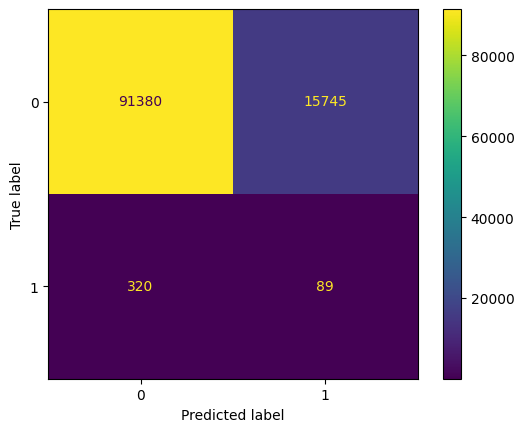

------------------------------------- ROC Plot ---------------------------------


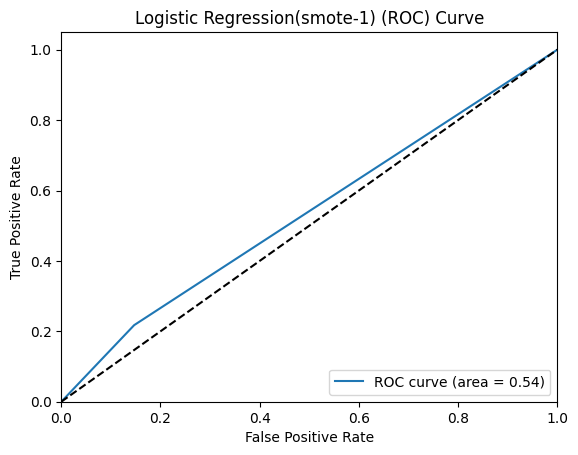

In [418]:
# Logistic Regression

model = LogisticRegression()
model_prediction("Logistic Regression(smote-1)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

#### Decision Tree

---------------------Decision Tree Classifier(smote-1) statistics ------------------------------
Decision Tree Classifier(smote-1) Accuracy: 0.9491695649747987
Decision Tree Classifier(smote-1) ROC AUC score: 0.9525668719847767
Decision Tree Classifier(smote-1) Precision: 0.066963521150882
Decision Tree Classifier(smote-1) Recall: 0.9559902200488998
Decision Tree Classifier(smote-1) F1-score: 0.12516005121638923
---------------------------------------------------------------------------------


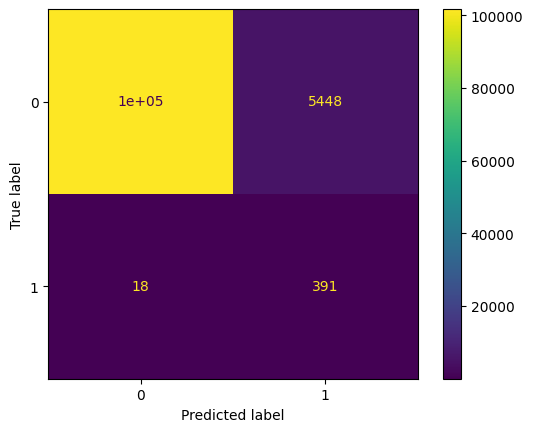

------------------------------------- ROC Plot ---------------------------------


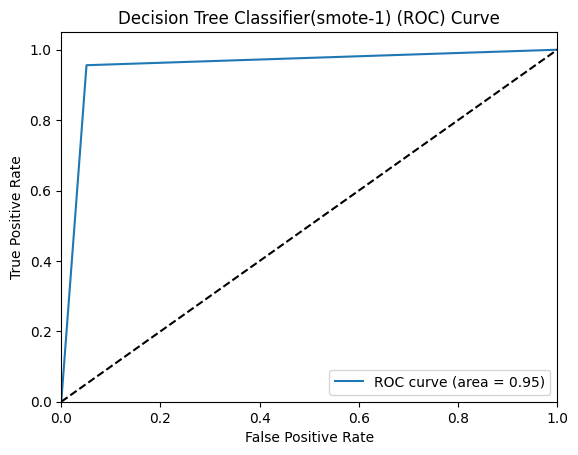

In [419]:
model = DecisionTreeClassifier()
model_prediction("Decision Tree Classifier(smote-1)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

#### Ensemble Methods

##### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier(smote-1) statistics ------------------------------
Random Forest Classifier(smote-1) Accuracy: 0.9491695649747987
Random Forest Classifier(smote-1) ROC AUC score: 0.9525668719847767
Random Forest Classifier(smote-1) Precision: 0.066963521150882
Random Forest Classifier(smote-1) Recall: 0.9559902200488998
Random Forest Classifier(smote-1) F1-score: 0.12516005121638923
---------------------------------------------------------------------------------


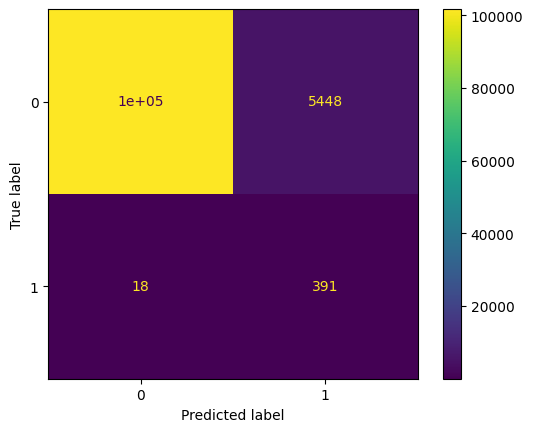

------------------------------------- ROC Plot ---------------------------------


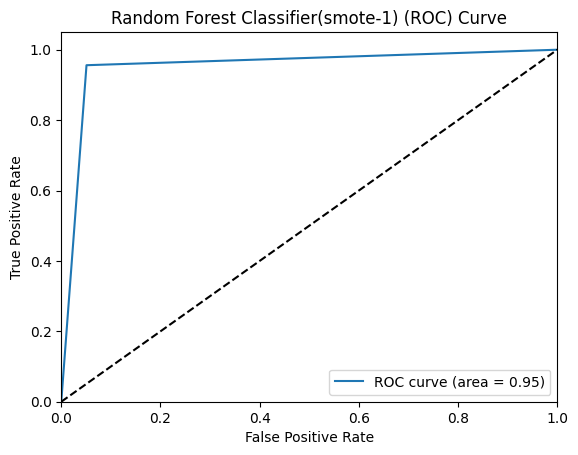

In [420]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier(smote-1)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

##### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier(smote-1) statistics ------------------------------
Bagging Classifier(smote-1) Accuracy: 0.9489463797496606
Bagging Classifier(smote-1) ROC AUC score: 0.9524548533149984
Bagging Classifier(smote-1) Precision: 0.06668940815282279
Bagging Classifier(smote-1) Recall: 0.9559902200488998
Bagging Classifier(smote-1) F1-score: 0.1246811224489796
---------------------------------------------------------------------------------


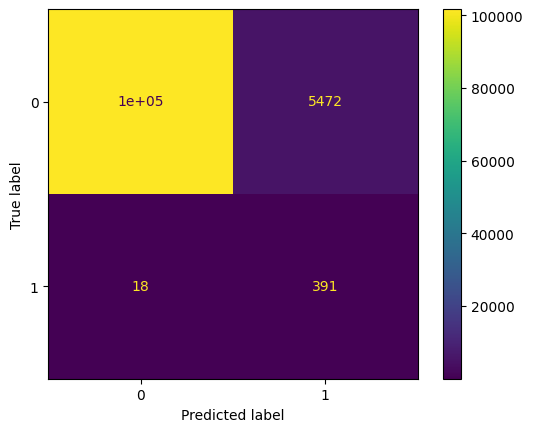

------------------------------------- ROC Plot ---------------------------------


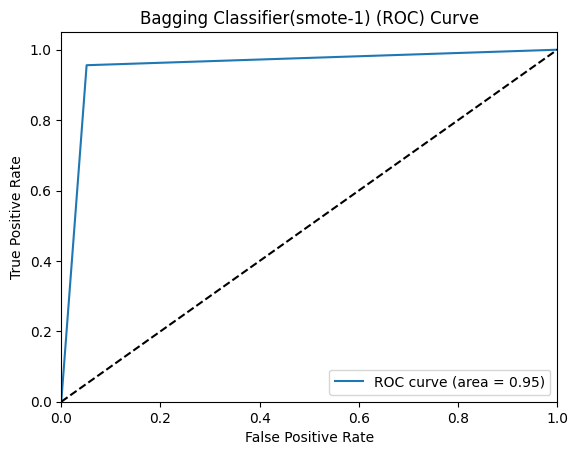

In [421]:
model = BaggingClassifier()
model_prediction("Bagging Classifier(smote-1)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

##### XGBoost

---------------------XG Boosting Classifier(smote-1) statistics ------------------------------
XG Boosting Classifier(smote-1) Accuracy: 0.9564974798668329
XG Boosting Classifier(smote-1) ROC AUC score: 0.9440665538795993
XG Boosting Classifier(smote-1) Precision: 0.07573047107930829
XG Boosting Classifier(smote-1) Recall: 0.9315403422982885
XG Boosting Classifier(smote-1) F1-score: 0.14007352941176474
---------------------------------------------------------------------------------


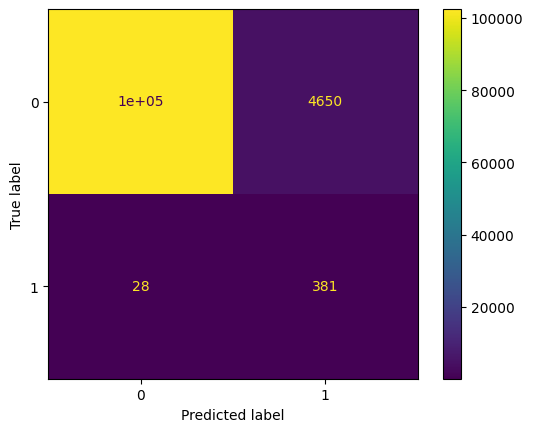

------------------------------------- ROC Plot ---------------------------------


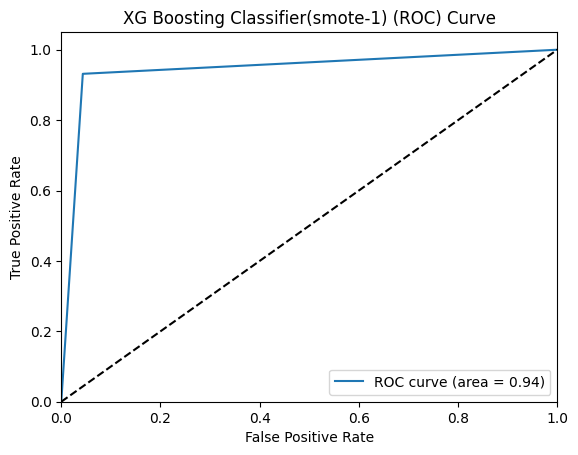

In [422]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier(smote-1)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

### Method 4 : SMOTE(Synthetic Minority Oversampling Technique) with sampling strategy equal to 0.5

In [423]:
# This method is an alternative to random sampling where it will not just duplicate the minority class samples
# SMOTE techniques takes difference between a sample and its nearest neighbour
# Multiply the difference by a random number between 0 and 1
# Add this difference to the sample to generate a new synthetic example in feature space
# Continue on with next nearest neighbour untill the size of samples in different classes are in the given ratio

In [424]:
smote = SMOTE(sampling_strategy = 0.5)

print('Original dataset shape', y.shape)

x_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Over sampling dataset size with SMOTE technique  with sampling strategy of 0.5 is : ', y_ros.shape[0])

Original dataset shape (537667, 1)
Over sampling dataset size with SMOTE technique  with sampling strategy of 0.5 is :  728586


In [425]:
print(y_ros.value_counts())
y_ros.value_counts()[1]/y_ros.value_counts()[0]

Target
0         428580
1         300006
dtype: int64


0.7

In [426]:
stats_after_over_sampling_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.595645                  0.971449   
1  ROC AUC score             0.595461                  0.971411   
2      Precision             0.576670                  0.947840   
3         Recall             0.723752                  0.997894   
4       F1-score             0.641894                  0.972223   

   Random Forest Classifier  Bagging Classifier  XG Boosting Classifier  \
0                  0.971449            0.971440                0.968219   
1                  0.971411            0.971401                0.968194   
2                  0.947840            0.947824                0.952020   
3                  0.997894            0.997894                0.986234   
4                  0.972223            0.972214                0.968825   

   Logistic Regression(0.7)  Decision Tree Classifier(0.7)  \
0                  0.603722                       0.966987   
1                  0.546256                       0.970764   
2                  0.541261                       0.932074   
3                  0.225595                       0.991839   
4                  0.318458                       0.961028   

   Random Forest Classifier(0.7)  Bagging Classifier(0.7)  ...  \
0                       0.966987                 0.966987  ...   
1                       0.970764                 0.970764  ...   
2                       0.932074                 0.932074  ...   
3                       0.991839                 0.991839  ...   
4                       0.961028                 0.961028  ...   

   Logistic Regression(smote-1)  Decision Tree Classifier(smote-1)  \
0                      0.599635                           0.980530   
1                      0.599450                           0.980510   
2                      0.579742                           0.967521   
3                      0.728543                           0.994501   
4                      0.645681                           0.980826   

   Random Forest Classifier(smote-1)  Bagging Classifier(smote-1)  \
0                           0.980712                     0.980549   
1                           0.980692                     0.980529   
2                           0.967346                     0.967327   
3                           0.995070                     0.994753   
4                           0.981012                     0.980848   

   XG Boosting Classifier(smote-1)  Logistic Regression(smote-0.5)  \
0                         0.969829                        0.666465   
1                         0.969824                        0.500000   
2                         0.966124                        0.000000   
3                         0.973894                        0.000000   
4                         0.969993                        0.000000   

   Decision Tree Classifier(smote-0.5)  Random Forest Classifier(smote-0.5)  \
0                             0.975764                             0.976075   
1                             0.978831                             0.979302   
2                             0.942116                             0.942152   
3                             0.988042                             0.988993   
4                             0.964533                             0.965004   

   Bagging Classifier(smote-0.5)  XG Boosting Classifier(smote-0.5)  
0                       0.975646                           0.964576  
1                       0.978556                           0.961607  
2                       0.942427                           0.941779  
3                       0.987295                           0.952689  
4                       0.964340                           0.947202  

[5 rows x 21 columns]

#### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Logistic Regression(smote-0.5) statistics ------------------------------
Logistic Regression(smote-0.5) Accuracy: 0.8506053899231871
Logistic Regression(smote-0.5) ROC AUC score: 0.5353130411710835
Logistic Regression(smote-0.5) Precision: 0.005620815965643552
Logistic Regression(smote-0.5) Recall: 0.2176039119804401
Logistic Regression(smote-0.5) F1-score: 0.010958566767222804
---------------------------------------------------------------------------------


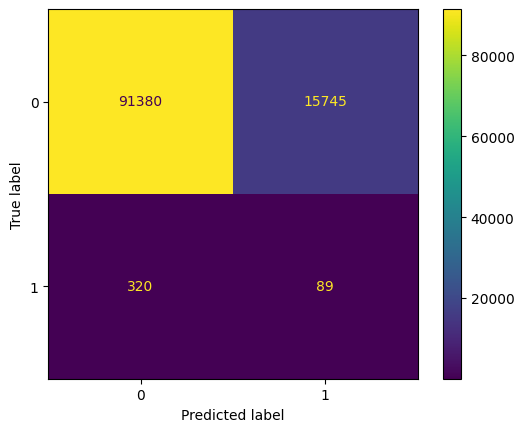

------------------------------------- ROC Plot ---------------------------------


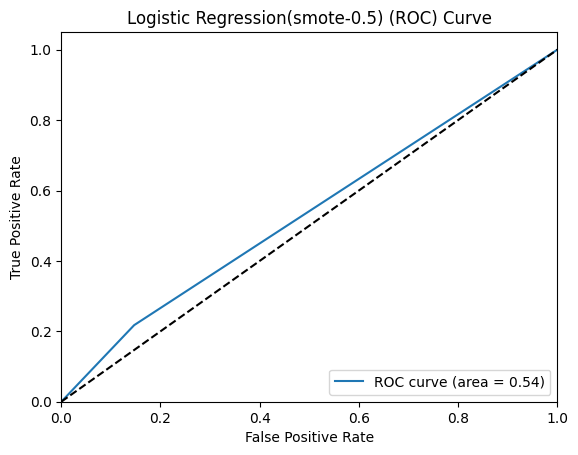

In [427]:
# Logistic Regression

model = LogisticRegression()
model_prediction("Logistic Regression(smote-0.5)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

#### Decision Tree

---------------------Decision Tree Classifier(smote-0.5) statistics ------------------------------
Decision Tree Classifier(smote-0.5) Accuracy: 0.9491695649747987
Decision Tree Classifier(smote-0.5) ROC AUC score: 0.9525668719847767
Decision Tree Classifier(smote-0.5) Precision: 0.066963521150882
Decision Tree Classifier(smote-0.5) Recall: 0.9559902200488998
Decision Tree Classifier(smote-0.5) F1-score: 0.12516005121638923
---------------------------------------------------------------------------------


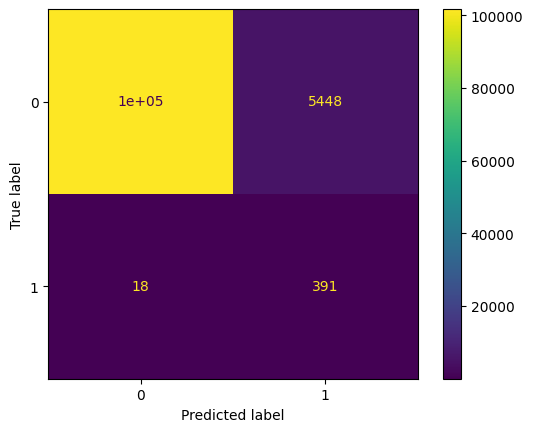

------------------------------------- ROC Plot ---------------------------------


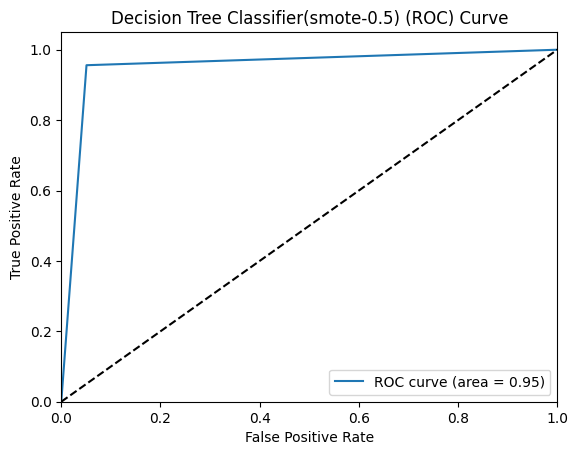

In [428]:
model = DecisionTreeClassifier()
model_prediction("Decision Tree Classifier(smote-0.5)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

#### Ensemble Methods

##### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier(smote-0.5) statistics ------------------------------
Random Forest Classifier(smote-0.5) Accuracy: 0.9491695649747987
Random Forest Classifier(smote-0.5) ROC AUC score: 0.9525668719847767
Random Forest Classifier(smote-0.5) Precision: 0.066963521150882
Random Forest Classifier(smote-0.5) Recall: 0.9559902200488998
Random Forest Classifier(smote-0.5) F1-score: 0.12516005121638923
---------------------------------------------------------------------------------


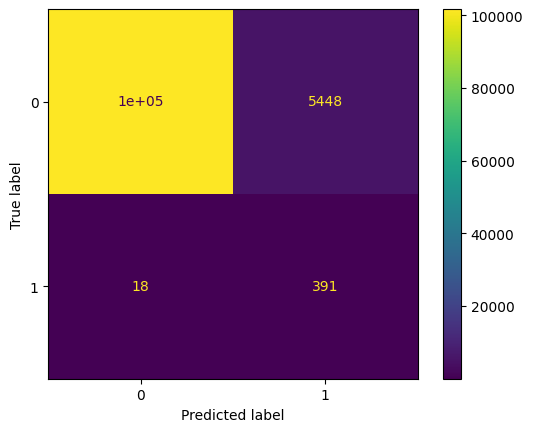

------------------------------------- ROC Plot ---------------------------------


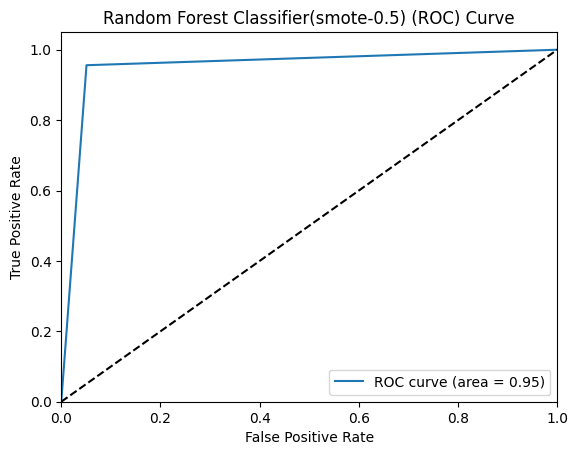

In [429]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier(smote-0.5)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

##### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier(smote-0.5) statistics ------------------------------
Bagging Classifier(smote-0.5) Accuracy: 0.9491695649747987
Bagging Classifier(smote-0.5) ROC AUC score: 0.9525668719847767
Bagging Classifier(smote-0.5) Precision: 0.066963521150882
Bagging Classifier(smote-0.5) Recall: 0.9559902200488998
Bagging Classifier(smote-0.5) F1-score: 0.12516005121638923
---------------------------------------------------------------------------------


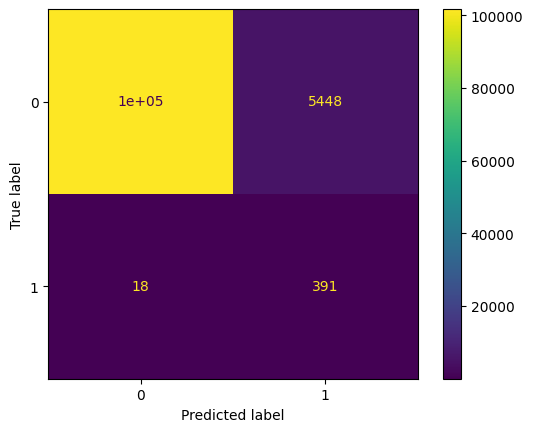

------------------------------------- ROC Plot ---------------------------------


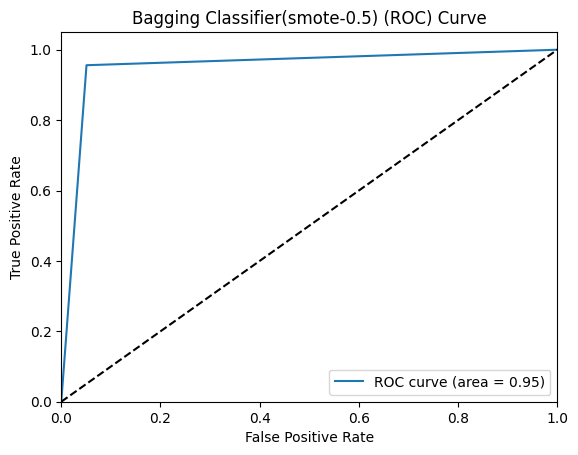

In [430]:
model = BaggingClassifier()
model_prediction("Bagging Classifier(smote-0.5)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

##### XGBoost

---------------------XG Boosting Classifier(smote-0.5) statistics ------------------------------
XG Boosting Classifier(smote-0.5) Accuracy: 0.9564974798668329
XG Boosting Classifier(smote-0.5) ROC AUC score: 0.9440665538795993
XG Boosting Classifier(smote-0.5) Precision: 0.07573047107930829
XG Boosting Classifier(smote-0.5) Recall: 0.9315403422982885
XG Boosting Classifier(smote-0.5) F1-score: 0.14007352941176474
---------------------------------------------------------------------------------


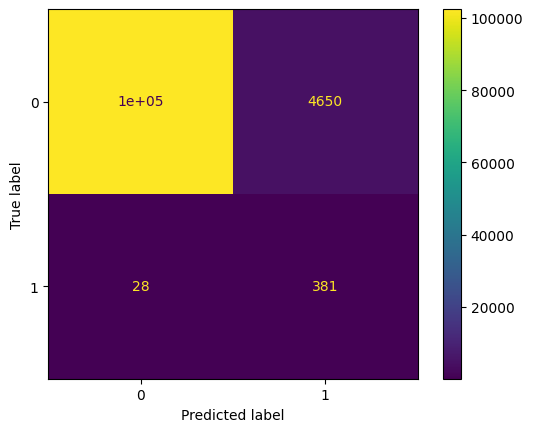

------------------------------------- ROC Plot ---------------------------------


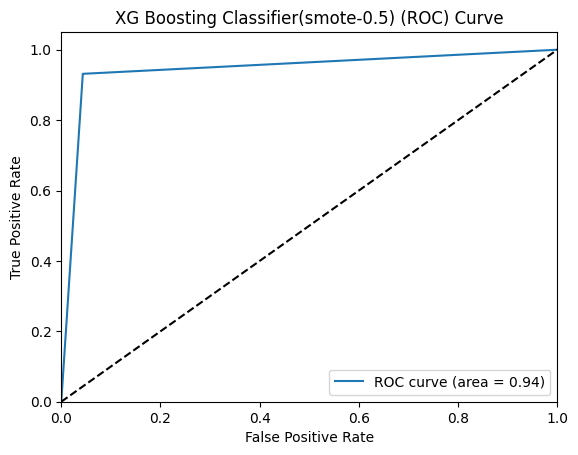

In [431]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier(smote-0.5)", model, x_ros, y_ros, X_test, y_test, stats_after_over_sampling_train_data)

### Balanced Data using Over Sampling Method- Model Comparision

In [432]:
stats_after_over_sampling_train_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.470065                  0.945357   
1  ROC AUC score             0.590317                  0.955525   
2      Precision             0.005091                  0.063129   
3         Recall             0.711491                  0.965770   
4       F1-score             0.010110                  0.118512   

   Random Forest Classifier  Bagging Classifier  XG Boosting Classifier  \
0                  0.945357            0.946101                0.948705   
1                  0.955525            0.955898                0.957205   
2                  0.063129            0.063947                0.066983   
3                  0.965770            0.965770                0.965770   
4                  0.118512            0.119951                0.125278   

   Logistic Regression(0.7)  Decision Tree Classifier(0.7)  \
0                  0.850605                       0.949170   
1                  0.535313                       0.952567   
2                  0.005621                       0.066964   
3                  0.217604                       0.955990   
4                  0.010959                       0.125160   

   Random Forest Classifier(0.7)  Bagging Classifier(0.7)  ...  \
0                       0.949170                 0.949607  ...   
1                       0.952567                 0.952786  ...   
2                       0.066964                 0.067507  ...   
3                       0.955990                 0.955990  ...   
4                       0.125160                 0.126109  ...   

   Logistic Regression(smote-1)  Decision Tree Classifier(smote-1)  \
0                      0.850605                           0.949170   
1                      0.535313                           0.952567   
2                      0.005621                           0.066964   
3                      0.217604                           0.955990   
4                      0.010959                           0.125160   

   Random Forest Classifier(smote-1)  Bagging Classifier(smote-1)  \
0                           0.949170                     0.948946   
1                           0.952567                     0.952455   
2                           0.066964                     0.066689   
3                           0.955990                     0.955990   
4                           0.125160                     0.124681   

   XG Boosting Classifier(smote-1)  Logistic Regression(smote-0.5)  \
0                         0.956497                        0.850605   
1                         0.944067                        0.535313   
2                         0.075730                        0.005621   
3                         0.931540                        0.217604   
4                         0.140074                        0.010959   

   Decision Tree Classifier(smote-0.5)  Random Forest Classifier(smote-0.5)  \
0                             0.949170                             0.949170   
1                             0.952567                             0.952567   
2                             0.066964                             0.066964   
3                             0.955990                             0.955990   
4                             0.125160                             0.125160   

   Bagging Classifier(smote-0.5)  XG Boosting Classifier(smote-0.5)  
0                       0.949170                           0.956497  
1                       0.952567                           0.944067  
2                       0.066964                           0.075730  
3                       0.955990                           0.931540  
4                       0.125160                           0.140074  

[5 rows x 21 columns]

In [433]:
# Observation on above statistics
# After balancing data with over sampling method where number of samples in both classes are equal
# We can see that there is a major change in ROC AUC, F1 Score 
# Coming to Linear regression accuracy is reduced from nearly 100% to 60% but we can see that it is able to predict defaulters way better compared to imbalanced data which increase both ROC AUC and F1-Score for Logistic regression
# And all other complex classifiers are able to predict well on testing data which we can see by improvement in all the metrics with just a small change in accuracy 

# As we decrease the sampling from 1 to 0.7 that is the ratio of samples in minority class vs samples in majority class the accuracy of linear regression is increased but F1 score is decreased.
# And all the metrics of complex models like decision trees and other ensemble methods tend to decrease very minutely



## Under Sampling Imbalanced Data - Before splitting data into train and test

Method 1 : Random under sampling of data (1:1 ratio of both the samples)

In [434]:
# DataFrame copy (reset to clean data )

X = main_x.copy()
y = main_y.copy()

In [435]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
print('Original dataset size:', y.shape[0])

# under-sampling
X_rus, y_rus = rus.fit_resample(X, y)

print('Under-sampling dataset size:', y_rus.shape[0])


Original dataset size: 537667
Under-sampling dataset size: 3924


In [436]:
print(y_rus.value_counts())
imbalance_ratio = y_rus.value_counts()[0] / y_rus.value_counts()[1]
print('Imbalance Ratio:', imbalance_ratio)


Target
0         1962
1         1962
dtype: int64
Imbalance Ratio: 1.0


In [437]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
# train to test ratio is 4:1
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, random_state=0, train_size=0.8)

# Print the shapes of the train and test sets
print('Train set size:', y_rus_train.shape[0])
print('Test set size:', y_rus_test.shape[0])


Train set size: 3139
Test set size: 785


In [438]:
import pandas as pd

# Create an empty DataFrame with columns for the metrics
stats_after_under_sampling_data = pd.DataFrame(columns=['Metrics'])
# Add the metric names to the DataFrame
stats_after_under_sampling_data['Metrics'] = ['Accuracy', 'ROC AUC score', 'Precision', 'Recall', 'F1-score']


In [439]:
stats_after_under_sampling_data

Metrics
0       Accuracy
1  ROC AUC score
2      Precision
3         Recall
4       F1-score

#### Logistic Regression

---------------------Logistic Regression statistics ------------------------------
Logistic Regression Accuracy: 0.5872611464968153
Logistic Regression ROC AUC score: 0.5884046586512244
Logistic Regression Precision: 0.5680851063829787
Logistic Regression Recall: 0.6881443298969072
Logistic Regression F1-score: 0.6223776223776224
---------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


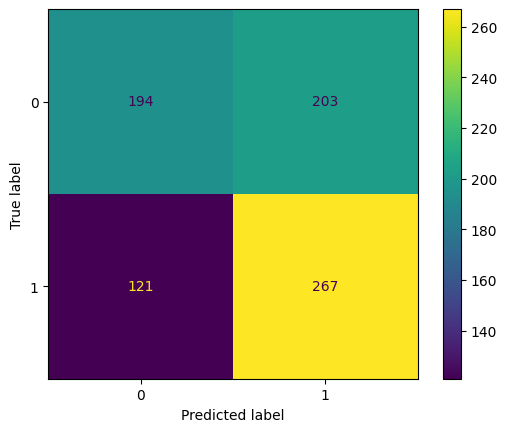

------------------------------------- ROC Plot ---------------------------------


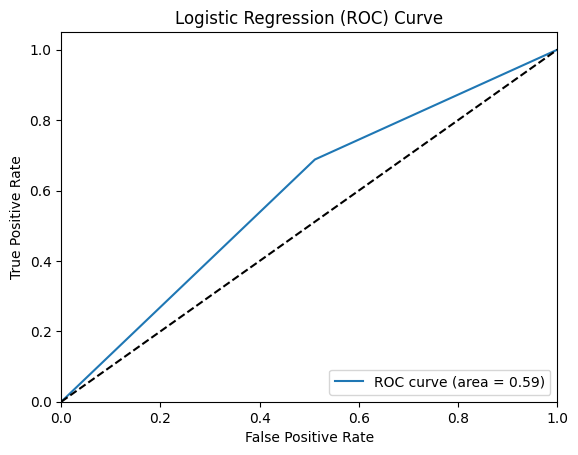

In [440]:
# Logistic Regression

model = LogisticRegression()
model_prediction("Logistic Regression", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)


#### Decision Tree

---------------------Decision Tree Classifier statistics ------------------------------
Decision Tree Classifier Accuracy: 0.8751592356687898
Decision Tree Classifier ROC AUC score: 0.8756394609052428
Decision Tree Classifier Precision: 0.8436018957345972
Decision Tree Classifier Recall: 0.9175257731958762
Decision Tree Classifier F1-score: 0.8790123456790124
---------------------------------------------------------------------------------


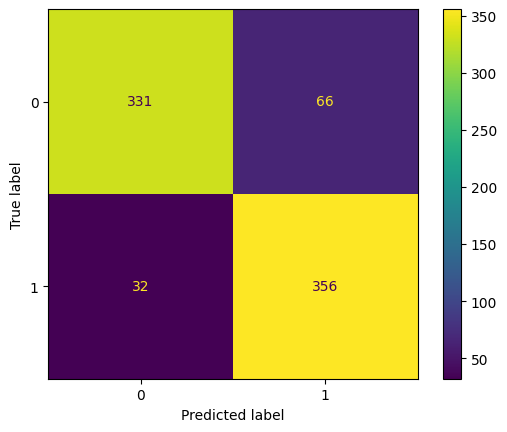

------------------------------------- ROC Plot ---------------------------------


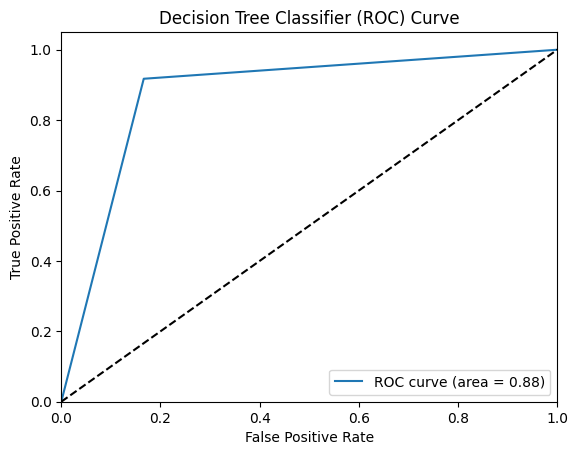

In [441]:
model = DecisionTreeClassifier()
model_prediction("Decision Tree Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)


#### Ensemble Methods

#### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier() statistics ------------------------------
Random Forest Classifier() Accuracy: 0.9312101910828026
Random Forest Classifier() ROC AUC score: 0.9309966501337349
Random Forest Classifier() Precision: 0.946524064171123
Random Forest Classifier() Recall: 0.9123711340206185
Random Forest Classifier() F1-score: 0.9291338582677166
---------------------------------------------------------------------------------


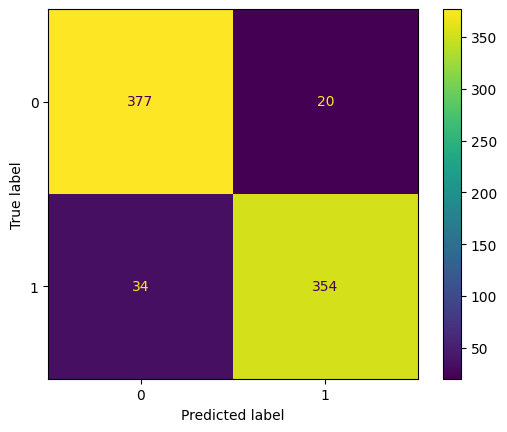

------------------------------------- ROC Plot ---------------------------------


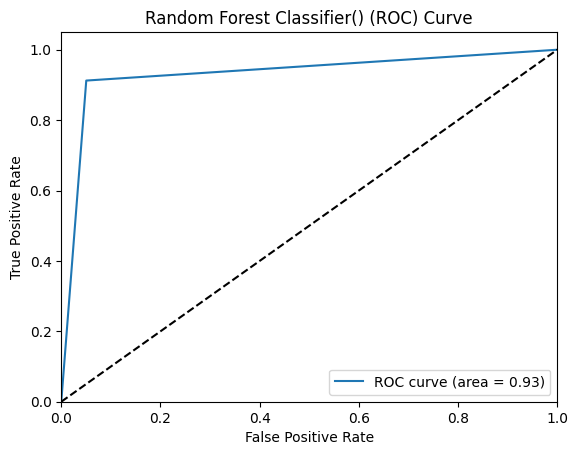

In [442]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier()", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)


#### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier() statistics ------------------------------
Bagging Classifier() Accuracy: 0.910828025477707
Bagging Classifier() ROC AUC score: 0.910787088732504
Bagging Classifier() Precision: 0.9119170984455959
Bagging Classifier() Recall: 0.9072164948453608
Bagging Classifier() F1-score: 0.9095607235142119
---------------------------------------------------------------------------------


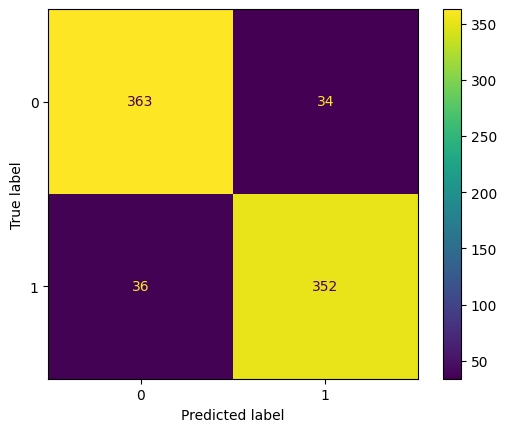

------------------------------------- ROC Plot ---------------------------------


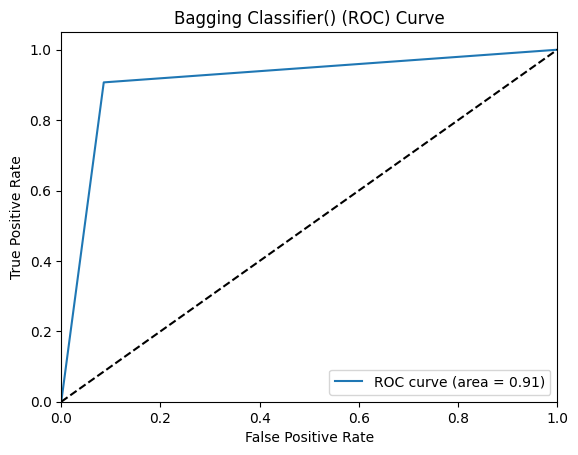

In [443]:
model = BaggingClassifier()
model_prediction("Bagging Classifier()", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)


#### XGBoost

---------------------XG Boosting Classifier statistics ------------------------------
XG Boosting Classifier Accuracy: 0.9095541401273886
XG Boosting Classifier ROC AUC score: 0.9094692149887039
XG Boosting Classifier Precision: 0.9138381201044387
XG Boosting Classifier Recall: 0.9020618556701031
XG Boosting Classifier F1-score: 0.9079118028534371
---------------------------------------------------------------------------------


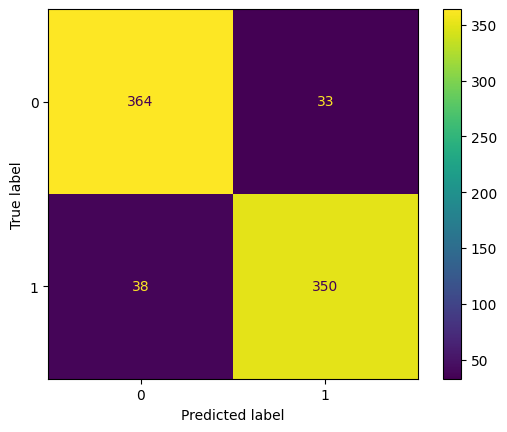

------------------------------------- ROC Plot ---------------------------------


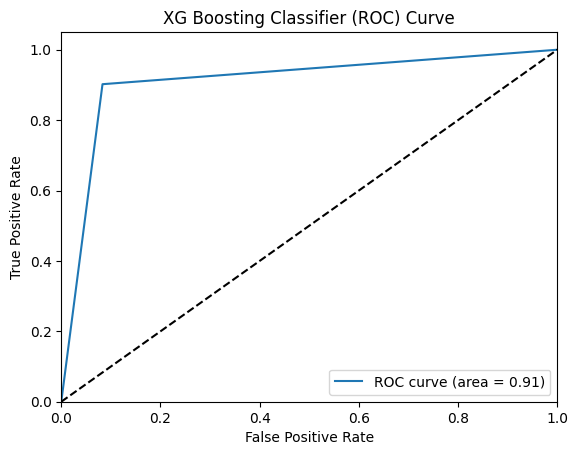

In [444]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

### Method 2 : Random under sampling of data (sampling_strategy = 0.7)

In [445]:
# Random oversampling takes the minority class samples and duplicates the records in such a way that number of samples in minority class are comparable to majority class
# By default the ratio of minority and majority class samples will be 0.7

In [446]:
# DataFrame copy (reset to clean data )

X = main_x.copy()
y = main_y.copy()

In [447]:
from imblearn.under_sampling import RandomUnderSampler

# perform under-sampling
rus = RandomUnderSampler(sampling_strategy=0.7, random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

print('Original dataset size:', y.shape[0])
print('Under-sampling dataset size with sampling strategy of 0.7:', y_rus.shape[0])


Original dataset size: 537667
Under-sampling dataset size with sampling strategy of 0.7: 4764


In [448]:
print(y_rus.value_counts())
y_rus.value_counts()[1]/y_rus.value_counts()[0]


Target
0         2802
1         1962
dtype: int64


0.7002141327623126

In [449]:
from sklearn.model_selection import train_test_split

# Split the under-sampled data into training and testing sets
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, random_state=0, train_size=0.8)


In [450]:
stats_after_under_sampling_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.587261                  0.875159   
1  ROC AUC score             0.588405                  0.875639   
2      Precision             0.568085                  0.843602   
3         Recall             0.688144                  0.917526   
4       F1-score             0.622378                  0.879012   

   Random Forest Classifier()  Bagging Classifier()  XG Boosting Classifier  
0                    0.931210              0.910828                0.909554  
1                    0.930997              0.910787                0.909469  
2                    0.946524              0.911917                0.913838  
3                    0.912371              0.907216                0.902062  
4                    0.929134              0.909561                0.907912

#### Logistic Regression

---------------------Logistic Regression statistics ------------------------------
Logistic Regression Accuracy: 0.608604407135362
Logistic Regression ROC AUC score: 0.5480578595074393
Logistic Regression Precision: 0.5664335664335665
Logistic Regression Recall: 0.2066326530612245
Logistic Regression F1-score: 0.30280373831775703
---------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


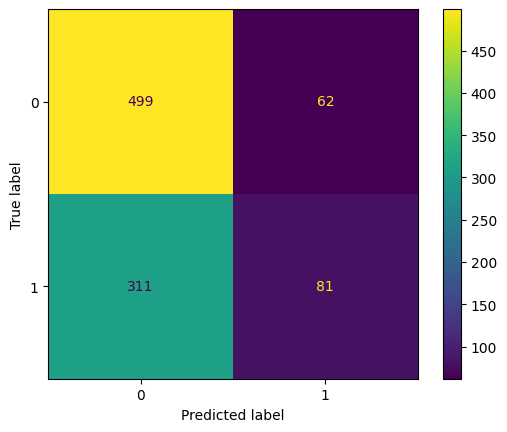

------------------------------------- ROC Plot ---------------------------------


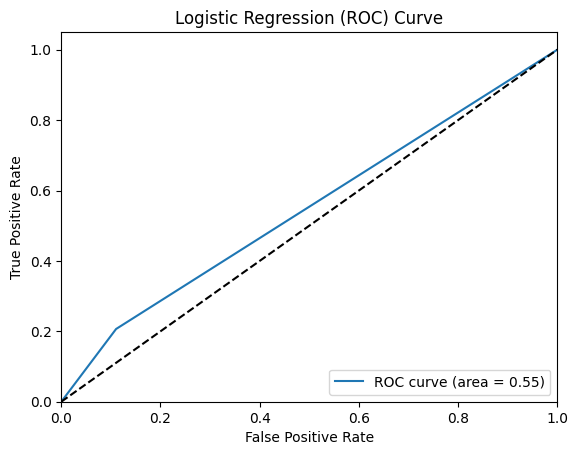

In [451]:
model = LogisticRegression()
model.fit(X_rus_train, y_rus_train)
model_prediction("Logistic Regression", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)


#### Decision Tree

---------------------Decision Tree Classifier statistics ------------------------------
Decision Tree Classifier Accuracy: 0.9087093389296957
Decision Tree Classifier ROC AUC score: 0.9109325548401179
Decision Tree Classifier Precision: 0.863961813842482
Decision Tree Classifier Recall: 0.923469387755102
Decision Tree Classifier F1-score: 0.8927250308261404
---------------------------------------------------------------------------------


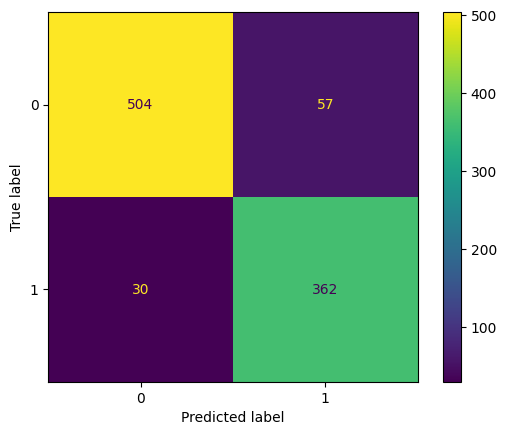

------------------------------------- ROC Plot ---------------------------------


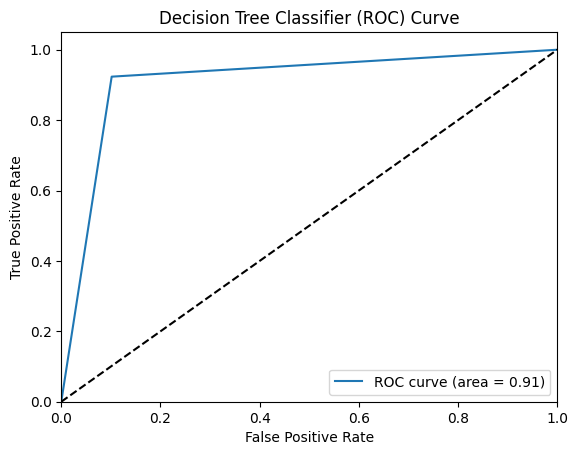

In [452]:
model = DecisionTreeClassifier()
model_prediction("Decision Tree Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

#### Ensemble Methods

##### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier statistics ------------------------------
Random Forest Classifier Accuracy: 0.9433368310598111
Random Forest Classifier ROC AUC score: 0.9395758303321328
Random Forest Classifier Precision: 0.9424083769633508
Random Forest Classifier Recall: 0.9183673469387755
Random Forest Classifier F1-score: 0.9302325581395349
---------------------------------------------------------------------------------


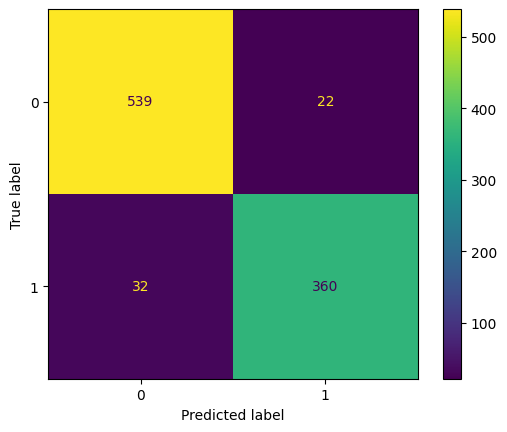

------------------------------------- ROC Plot ---------------------------------


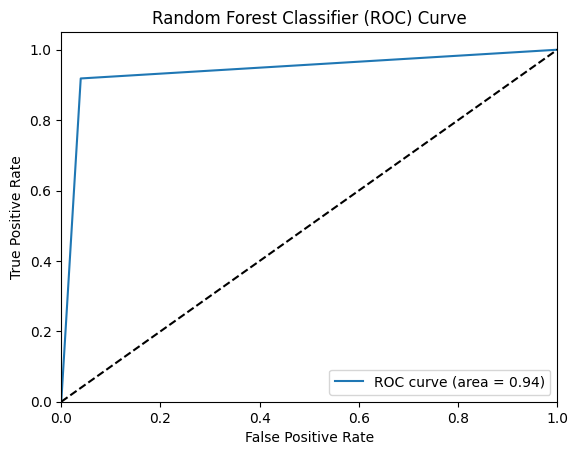

In [453]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

##### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier statistics ------------------------------
Bagging Classifier Accuracy: 0.9412381951731374
Bagging Classifier ROC AUC score: 0.9397145221725054
Bagging Classifier Precision: 0.9263959390862944
Bagging Classifier Recall: 0.9311224489795918
Bagging Classifier F1-score: 0.9287531806615775
---------------------------------------------------------------------------------


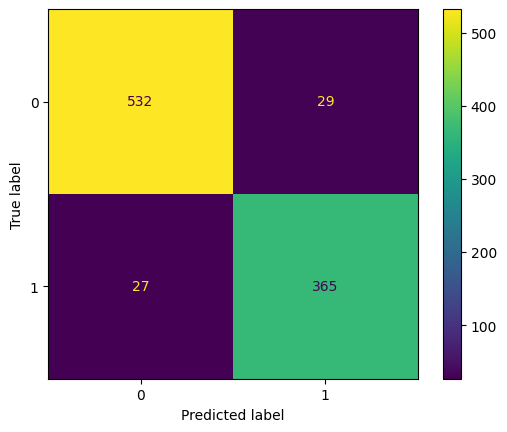

------------------------------------- ROC Plot ---------------------------------


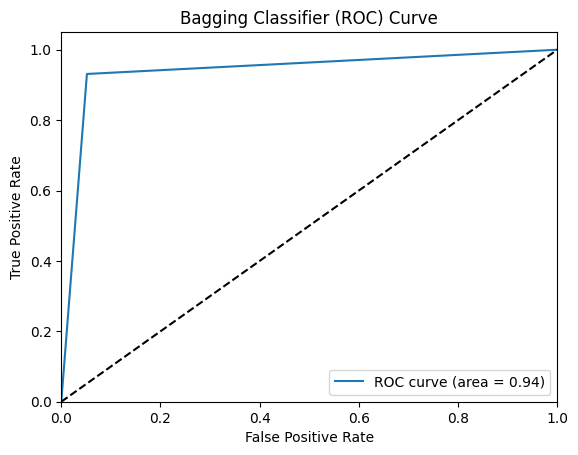

In [454]:
model = BaggingClassifier()
model_prediction("Bagging Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

##### XGBoost

---------------------XG Boosting Classifier statistics ------------------------------
XG Boosting Classifier Accuracy: 0.9296956977964324
XG Boosting Classifier ROC AUC score: 0.9268366437484085
XG Boosting Classifier Precision: 0.9177377892030848
XG Boosting Classifier Recall: 0.9107142857142857
XG Boosting Classifier F1-score: 0.9142125480153649
---------------------------------------------------------------------------------


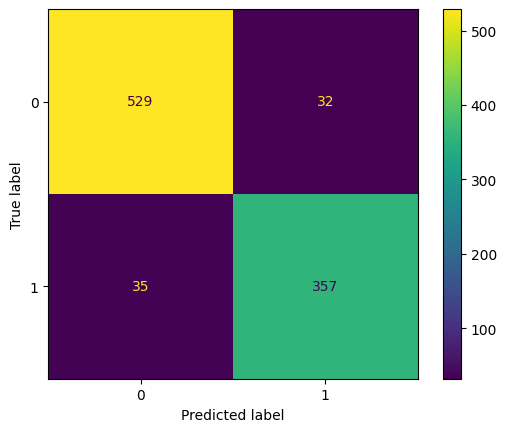

------------------------------------- ROC Plot ---------------------------------


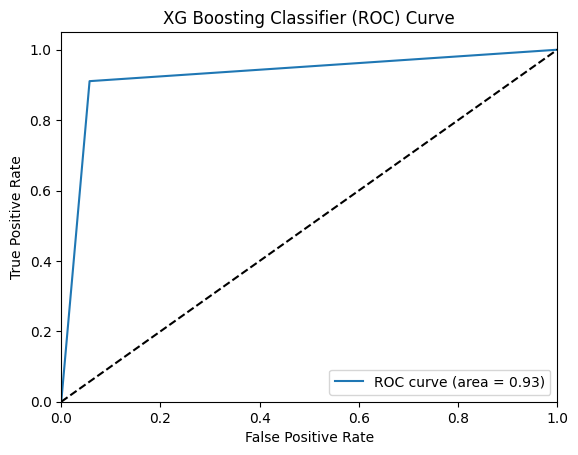

In [455]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

### Method 3 : Random under sampling of data (sampling_strategy = 0.5)

In [456]:
# Random oversampling takes the minority class samples and duplicates the records in such a way that number of samples in minority class are comparable to majority class
# By default the ratio of minority and majority class samples will be 0.7

In [457]:
from imblearn.under_sampling import RandomUnderSampler

# perform under-sampling
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

print('Original dataset size:', y.shape[0])
print('Under-sampling dataset size with sampling strategy of 0.5:', y_rus.shape[0])


Original dataset size: 537667
Under-sampling dataset size with sampling strategy of 0.5: 5886


In [458]:
print(y_rus.value_counts())
y_rus.value_counts()[1]/y_rus.value_counts()[0]


Target
0         3924
1         1962
dtype: int64


0.5

In [459]:
from sklearn.model_selection import train_test_split

# Split the under-sampled data into training and testing sets
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, random_state=0, train_size=0.8)


In [460]:
stats_after_under_sampling_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.608604                  0.908709   
1  ROC AUC score             0.548058                  0.910933   
2      Precision             0.566434                  0.863962   
3         Recall             0.206633                  0.923469   
4       F1-score             0.302804                  0.892725   

   Random Forest Classifier()  Bagging Classifier()  XG Boosting Classifier  \
0                    0.931210              0.910828                0.929696   
1                    0.930997              0.910787                0.926837   
2                    0.946524              0.911917                0.917738   
3                    0.912371              0.907216                0.910714   
4                    0.929134              0.909561                0.914213   

   Random Forest Classifier  Bagging Classifier  
0                  0.943337            0.941238  
1                  0.939576            0.939715  
2                  0.942408            0.926396  
3                  0.918367            0.931122  
4                  0.930233            0.928753

#### Logistic Regression

---------------------Logistic Regression statistics ------------------------------
Logistic Regression Accuracy: 0.6740237691001698
Logistic Regression ROC AUC score: 0.5
Logistic Regression Precision: 0.0
Logistic Regression Recall: 0.0
Logistic Regression F1-score: 0.0
---------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


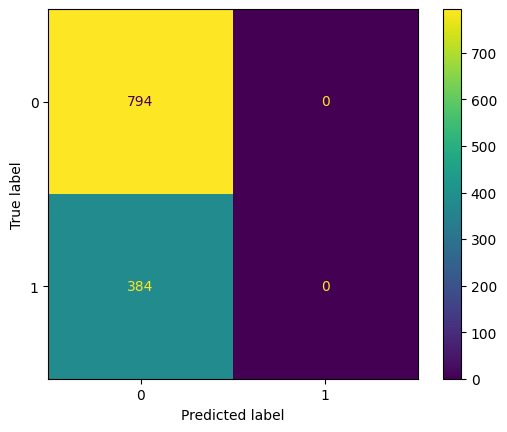

------------------------------------- ROC Plot ---------------------------------


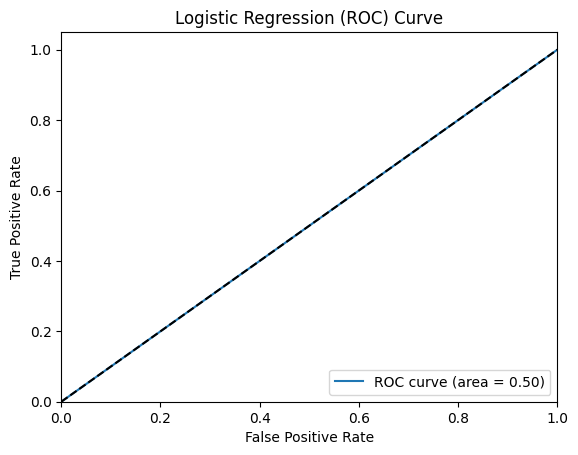

In [461]:
model = LogisticRegression()
model.fit(X_rus_train, y_rus_train)
model_prediction("Logistic Regression", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)


#### Decision Tree

---------------------Decision Tree Classifier statistics ------------------------------
Decision Tree Classifier Accuracy: 0.9185004074979625
Decision Tree Classifier ROC AUC score: 0.9223716381418092
Decision Tree Classifier Precision: 0.8395604395604396
Decision Tree Classifier Recall: 0.9339853300733496
Decision Tree Classifier F1-score: 0.8842592592592594
---------------------------------------------------------------------------------


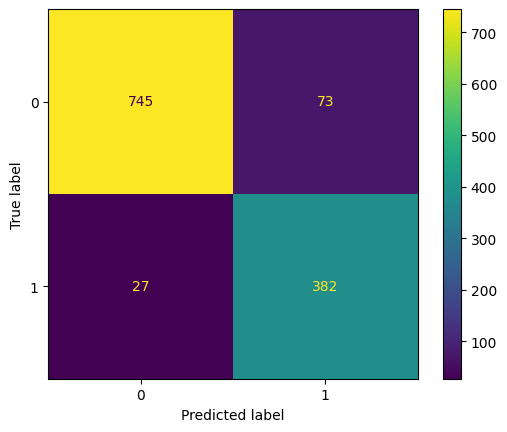

------------------------------------- ROC Plot ---------------------------------


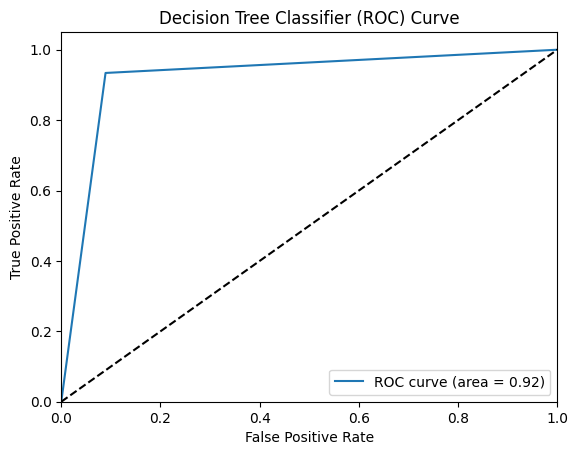

In [462]:
model = DecisionTreeClassifier()
X_rus_train, y_rus_train = rus.fit_resample(X_train, y_train)
X_rus_test, y_rus_test = rus.fit_resample(X_test, y_test)
model_prediction("Decision Tree Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

#### Ensemble Methods

##### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier statistics ------------------------------
Random Forest Classifier Accuracy: 0.9462102689486552
Random Forest Classifier ROC AUC score: 0.9425427872860634
Random Forest Classifier Precision: 0.9093078758949881
Random Forest Classifier Recall: 0.9315403422982885
Random Forest Classifier F1-score: 0.9202898550724637
---------------------------------------------------------------------------------


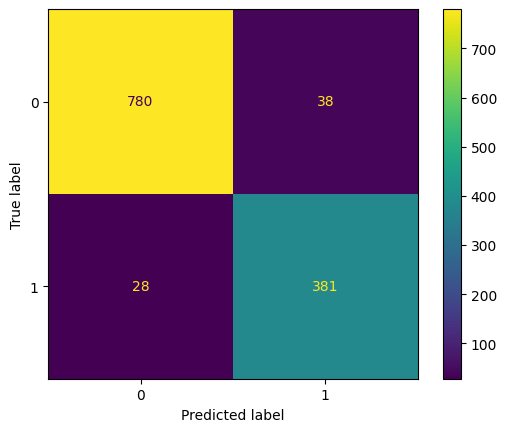

------------------------------------- ROC Plot ---------------------------------


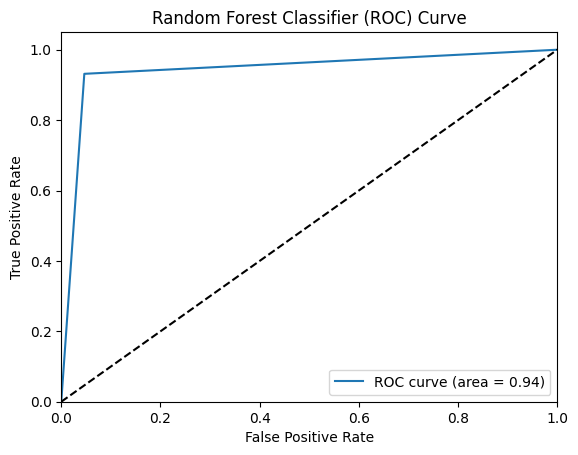

In [463]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

##### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier statistics ------------------------------
Bagging Classifier Accuracy: 0.9429502852485737
Bagging Classifier ROC AUC score: 0.9400977995110025
Bagging Classifier Precision: 0.900709219858156
Bagging Classifier Recall: 0.9315403422982885
Bagging Classifier F1-score: 0.9158653846153846
---------------------------------------------------------------------------------


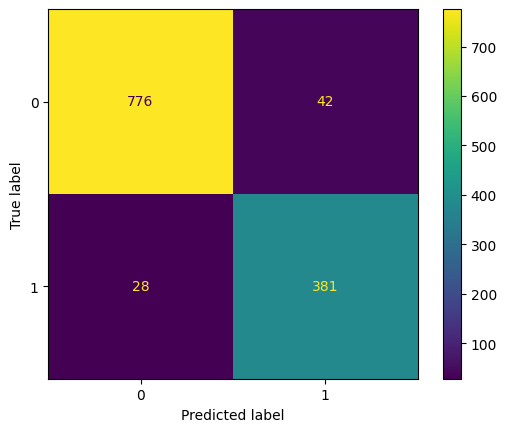

------------------------------------- ROC Plot ---------------------------------


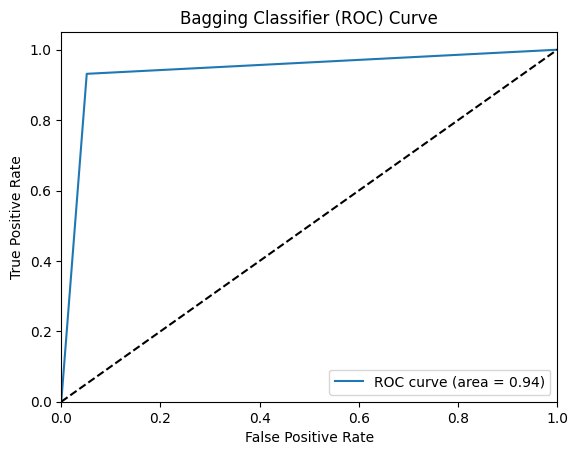

In [464]:
model = BaggingClassifier()
model_prediction("Bagging Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

##### XGBoost

---------------------XG Boosting Classifier statistics ------------------------------
XG Boosting Classifier Accuracy: 0.9364303178484108
XG Boosting Classifier ROC AUC score: 0.9272616136919316
XG Boosting Classifier Precision: 0.908641975308642
XG Boosting Classifier Recall: 0.8997555012224939
XG Boosting Classifier F1-score: 0.9041769041769042
---------------------------------------------------------------------------------


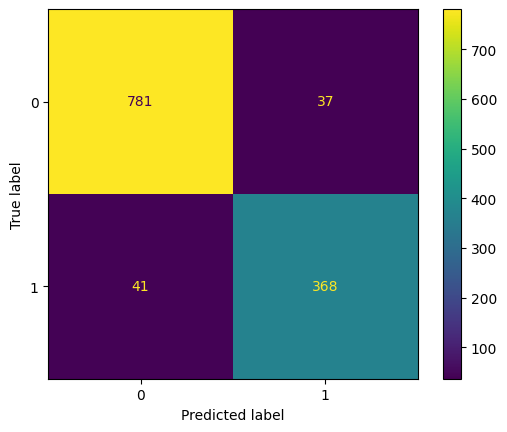

------------------------------------- ROC Plot ---------------------------------


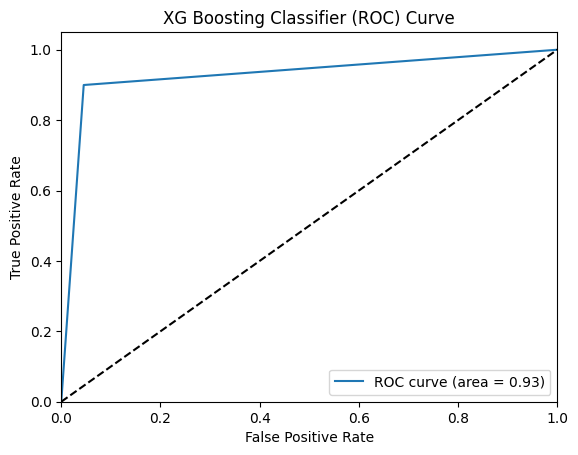

In [465]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

### Method 4 : Random under sampling of data (sampling_strategy = 0.3)

In [466]:
# Random oversampling takes the minority class samples and duplicates the records in such a way that number of samples in minority class are comparable to majority class
# By default the ratio of minority and majority class samples will be 0.7

In [467]:
from imblearn.under_sampling import RandomUnderSampler

# perform under-sampling
rus = RandomUnderSampler(sampling_strategy=0.3, random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

print('Original dataset size:', y.shape[0])
print('Under-sampling dataset size with sampling strategy of 0.3:', y_rus.shape[0])


Original dataset size: 537667
Under-sampling dataset size with sampling strategy of 0.3: 8502


In [468]:
print(y_rus.value_counts())
y_rus.value_counts()[1]/y_rus.value_counts()[0]


Target
0         6540
1         1962
dtype: int64


0.3

In [469]:
from sklearn.model_selection import train_test_split

# Split the under-sampled data into training and testing sets
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, random_state=0, train_size=0.8)


In [470]:
stats_after_under_sampling_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.674024                  0.918500   
1  ROC AUC score             0.500000                  0.922372   
2      Precision             0.000000                  0.839560   
3         Recall             0.000000                  0.933985   
4       F1-score             0.000000                  0.884259   

   Random Forest Classifier()  Bagging Classifier()  XG Boosting Classifier  \
0                    0.931210              0.910828                0.936430   
1                    0.930997              0.910787                0.927262   
2                    0.946524              0.911917                0.908642   
3                    0.912371              0.907216                0.899756   
4                    0.929134              0.909561                0.904177   

   Random Forest Classifier  Bagging Classifier  
0                  0.946210            0.942950  
1                  0.942543            0.940098  
2                  0.909308            0.900709  
3                  0.931540            0.931540  
4                  0.920290            0.915865

#### Logistic Regression

---------------------Logistic Regression statistics ------------------------------
Logistic Regression Accuracy: 0.7619047619047619
Logistic Regression ROC AUC score: 0.5
Logistic Regression Precision: 0.0
Logistic Regression Recall: 0.0
Logistic Regression F1-score: 0.0
---------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


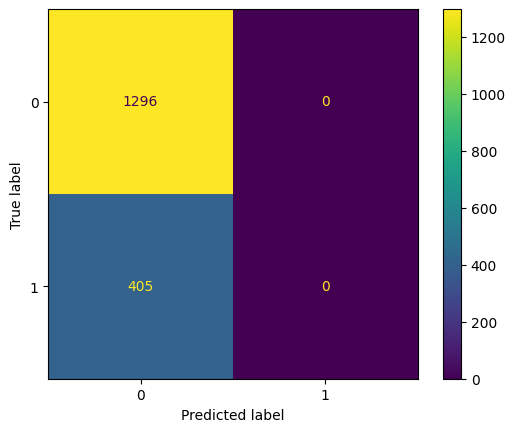

------------------------------------- ROC Plot ---------------------------------


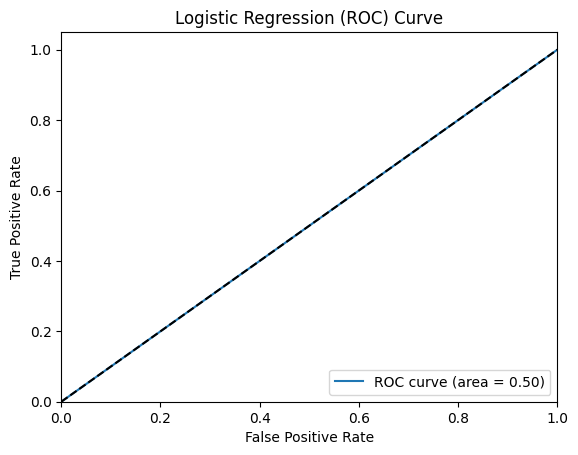

In [471]:
model = LogisticRegression()
model.fit(X_rus_train, y_rus_train)
model_prediction("Logistic Regression", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)


#### Decision Tree

---------------------Decision Tree Classifier statistics ------------------------------
Decision Tree Classifier Accuracy: 0.9384875846501128
Decision Tree Classifier ROC AUC score: 0.9257884323197606
Decision Tree Classifier Precision: 0.8424657534246576
Decision Tree Classifier Recall: 0.902200488997555
Decision Tree Classifier F1-score: 0.8713105076741441
---------------------------------------------------------------------------------


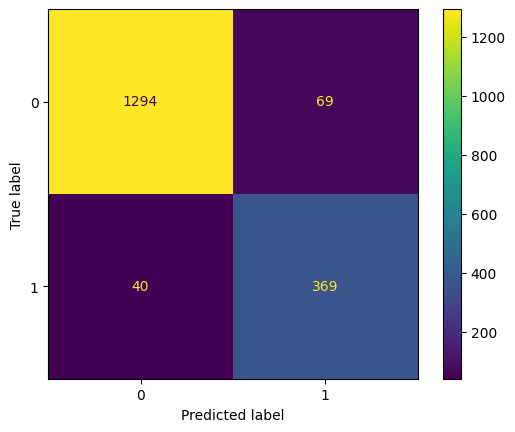

------------------------------------- ROC Plot ---------------------------------


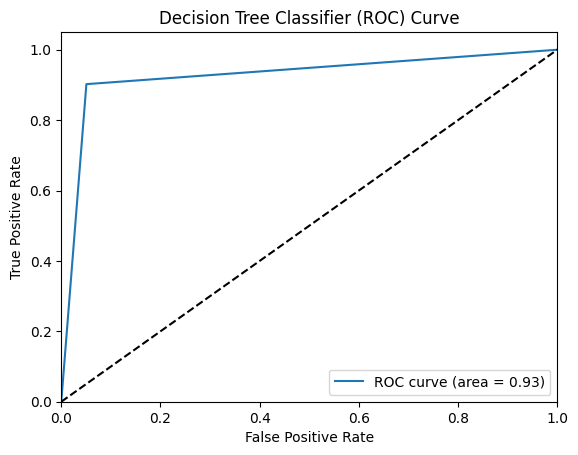

In [472]:
model = DecisionTreeClassifier()
X_rus_train, y_rus_train = rus.fit_resample(X_train, y_train)
X_rus_test, y_rus_test = rus.fit_resample(X_test, y_test)
model_prediction("Decision Tree Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

#### Ensemble Methods

##### Basic Random Forest

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier statistics ------------------------------
Random Forest Classifier Accuracy: 0.9497742663656885
Random Forest Classifier ROC AUC score: 0.9339808455029626
Random Forest Classifier Precision: 0.8809523809523809
Random Forest Classifier Recall: 0.9046454767726161
Random Forest Classifier F1-score: 0.8926417370325694
---------------------------------------------------------------------------------


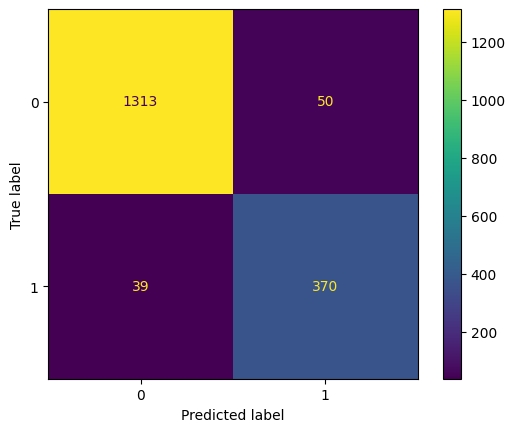

------------------------------------- ROC Plot ---------------------------------


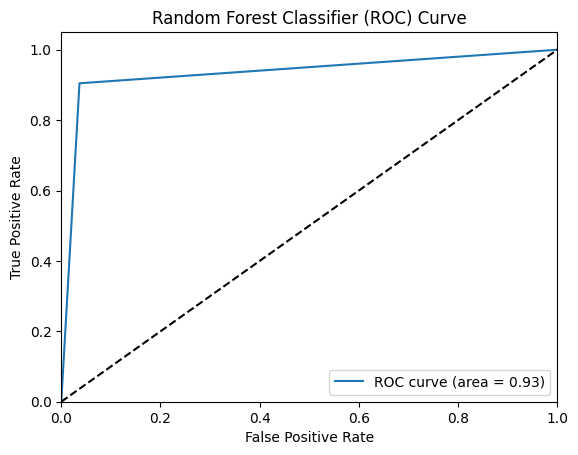

In [473]:
model = RandomForestClassifier()
model_prediction("Random Forest Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

##### Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier statistics ------------------------------
Bagging Classifier Accuracy: 0.9401805869074492
Bagging Classifier ROC AUC score: 0.925177633833034
Bagging Classifier Precision: 0.851508120649652
Bagging Classifier Recall: 0.8973105134474327
Bagging Classifier F1-score: 0.8738095238095239
---------------------------------------------------------------------------------


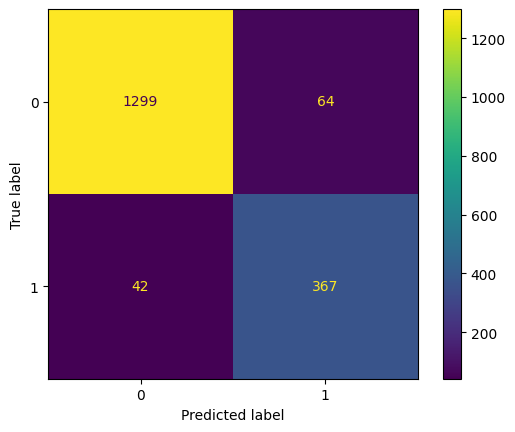

------------------------------------- ROC Plot ---------------------------------


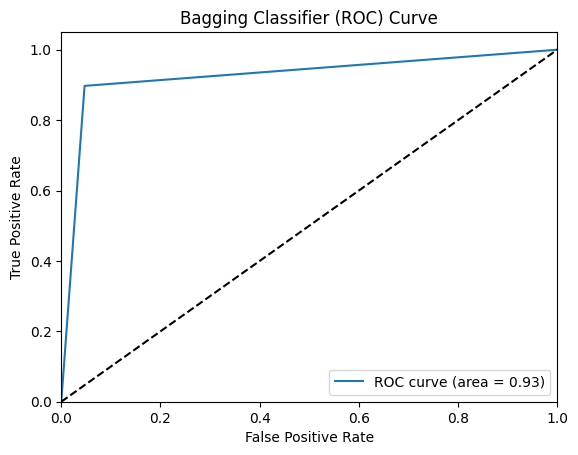

In [474]:
model = BaggingClassifier()
model_prediction("Bagging Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

##### XGBoost

---------------------XG Boosting Classifier statistics ------------------------------
XG Boosting Classifier Accuracy: 0.9424379232505643
XG Boosting Classifier ROC AUC score: 0.9146658008456107
XG Boosting Classifier Precision: 0.8847117794486216
XG Boosting Classifier Recall: 0.863080684596577
XG Boosting Classifier F1-score: 0.8737623762376238
---------------------------------------------------------------------------------


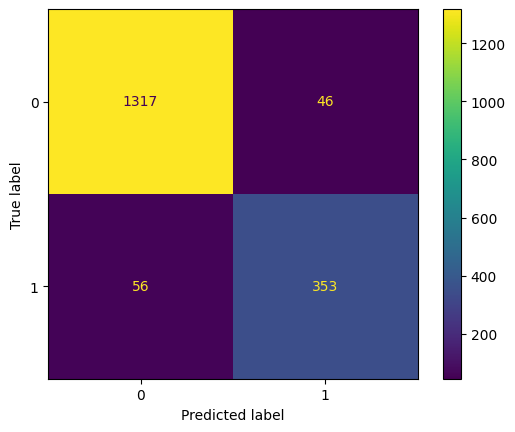

------------------------------------- ROC Plot ---------------------------------


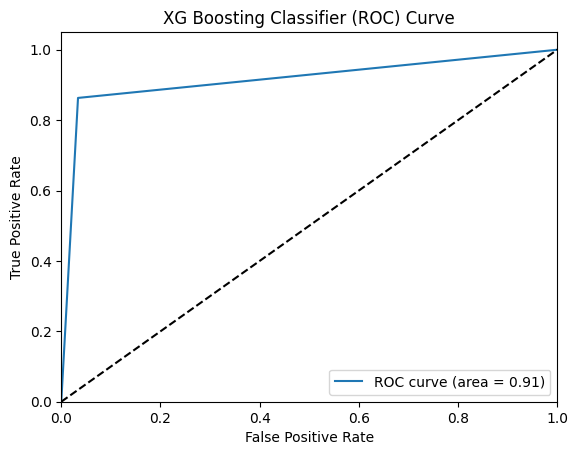

In [475]:
model = xgb.XGBClassifier()
model_prediction("XG Boosting Classifier", model, X_rus_train, y_rus_train, X_rus_test, y_rus_test, stats_after_under_sampling_data)

### **Under-Sampling Method- Model Comparision**



In [476]:
stats_after_under_sampling_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.761905                  0.938488   
1  ROC AUC score             0.500000                  0.925788   
2      Precision             0.000000                  0.842466   
3         Recall             0.000000                  0.902200   
4       F1-score             0.000000                  0.871311   

   Random Forest Classifier()  Bagging Classifier()  XG Boosting Classifier  \
0                    0.931210              0.910828                0.942438   
1                    0.930997              0.910787                0.914666   
2                    0.946524              0.911917                0.884712   
3                    0.912371              0.907216                0.863081   
4                    0.929134              0.909561                0.873762   

   Random Forest Classifier  Bagging Classifier  
0                  0.949774            0.940181  
1                  0.933981            0.925178  
2                  0.880952            0.851508  
3                  0.904645            0.897311  
4                  0.892642            0.873810

In [477]:
# Observation on above statistics
# After balancing data with over sampling method where number of samples in both classes are equal
# We can see that there is a major change in ROC AUC, F1 Score 
# Coming to Linear regression accuracy is reduced from nearly 100% to 60% but we can see that it is able to predict defaulters way better compared to imbalanced data which increase both ROC AUC and F1-Score for Logistic regression
# And all other complex classifiers are able to predict well on testing data which we can see by improvement in all the metrics with just a small change in accuracy 

# As we decrease the sampling from 1 to 0.7 that is the ratio of samples in minority class vs samples in majority class the accuracy of linear regression is increased but F1 score is decreased.
# And all the metrics of complex models like decision trees and other ensemble methods tend to decrease very minutely



In [478]:
stats_after_under_sampling_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.761905                  0.938488   
1  ROC AUC score             0.500000                  0.925788   
2      Precision             0.000000                  0.842466   
3         Recall             0.000000                  0.902200   
4       F1-score             0.000000                  0.871311   

   Random Forest Classifier()  Bagging Classifier()  XG Boosting Classifier  \
0                    0.931210              0.910828                0.942438   
1                    0.930997              0.910787                0.914666   
2                    0.946524              0.911917                0.884712   
3                    0.912371              0.907216                0.863081   
4                    0.929134              0.909561                0.873762   

   Random Forest Classifier  Bagging Classifier  
0                  0.949774            0.940181  
1                  0.933981            0.925178  
2                  0.880952            0.851508  
3                  0.904645            0.897311  
4                  0.892642            0.873810


# Reduced Dataset

####Data preprocessing for the reduce dataset

In [479]:
#creating a reduced dataframe.

df4 = df.copy()

In [480]:
df4

Has_a_car  Has_a_property    Income  Education_level  Marital_status  \
0               1               0  270000.0                4               1   
1               0               0   81000.0                4               3   
2               1               1  270000.0                1               1   
3               1               1  112500.0                4               1   
4               1               1  139500.0                4               1   
...           ...             ...       ...              ...             ...   
537662          1               0  166500.0                4               1   
537663          0               1  135000.0                1               1   
537664          0               1  180000.0                1               1   
537665          1               0  220500.0                4               1   
537666          0               1  387000.0                4               1   

        Days_birth  Days_employed  Has_a_mobile_phone  Begin_month  Target  \
0           -13258          -2300                   1           -6       0   
1           -17876           -377                   1           -4       0   
2           -19579          -1028                   1            0       0   
3           -15109          -1956                   1           -3       0   
4           -17281          -5578                   1          -29       0   
...            ...            ...                 ...          ...     ...   
537662      -12372          -5401                   1           -8       0   
537663      -14160          -4635                   1           -8       0   
537664      -24204          -2462                   1           -7       0   
537665      -22647          -3847                   1           -1       0   
537666      -20082          -4979                   1          -45       0   

        Days_birth1  years_birth   Birth_group  Days_Emp  years_emp  \
0           13258.0         36.0  (31.0, 36.0]    2300.0        6.0   
1           17876.0         49.0  (45.0, 51.0]     377.0        1.0   
2           19579.0         54.0  (51.0, 67.0]    1028.0        3.0   
3           15109.0         41.0  (36.0, 41.0]    1956.0        5.0   
4           17281.0         47.0  (45.0, 51.0]    5578.0       15.0   
...             ...          ...           ...       ...        ...   
537662      12372.0         34.0  (31.0, 36.0]    5401.0       15.0   
537663      14160.0         39.0  (36.0, 41.0]    4635.0       13.0   
537664      24204.0         66.0  (51.0, 67.0]    2462.0        7.0   
537665      22647.0         62.0  (51.0, 67.0]    3847.0       11.0   
537666      20082.0         55.0  (51.0, 67.0]    4979.0       14.0   

          YRS_EMP_GRP          INCOME_BUCKET  Days_Age  
0          (4.0, 6.0]   (225000.0, 270000.0]   13258.0  
1       (-0.001, 2.0]  (26999.999, 112500.0]   17876.0  
2          (2.0, 4.0]   (225000.0, 270000.0]   19579.0  
3          (4.0, 6.0]  (26999.999, 112500.0]   15109.0  
4        (13.0, 43.0]   (135000.0, 180000.0]   17281.0  
...               ...                    ...       ...  
537662   (13.0, 43.0]   (135000.0, 180000.0]   12372.0  
537663    (8.0, 13.0]   (112500.0, 135000.0]   14160.0  
537664     (6.0, 8.0]   (135000.0, 180000.0]   24204.0  
537665    (8.0, 13.0]   (180000.0, 225000.0]   22647.0  
537666   (13.0, 43.0]  (270000.0, 1575000.0]   20082.0  

[537667 rows x 18 columns]

In [481]:
df5 = df4.drop(["Days_birth", "Has_a_mobile_phone","Begin_month", "Days_employed"], axis=1)


In [482]:
#Normalizating the dataframe

df4['Income'] = (df4['Income'] - df4['Income'].min()) / (df4['Income'].max() - df4['Income'].min()) 
df4['Days_Age'] = (df4['Days_Age'] - df4['Days_Age'].min()) / (df4['Days_Age'].max() - df4['Days_Age'].min()) 
df4['Days_Emp'] = (df4['Days_Emp'] - df4['Days_Emp'].min()) / (df4['Days_Emp'].max() - df4['Days_Emp'].min()) 

In [483]:
df5

Has_a_car  Has_a_property    Income  Education_level  Marital_status  \
0               1               0  270000.0                4               1   
1               0               0   81000.0                4               3   
2               1               1  270000.0                1               1   
3               1               1  112500.0                4               1   
4               1               1  139500.0                4               1   
...           ...             ...       ...              ...             ...   
537662          1               0  166500.0                4               1   
537663          0               1  135000.0                1               1   
537664          0               1  180000.0                1               1   
537665          1               0  220500.0                4               1   
537666          0               1  387000.0                4               1   

        Target  Days_birth1  years_birth   Birth_group  Days_Emp  years_emp  \
0            0      13258.0         36.0  (31.0, 36.0]    2300.0        6.0   
1            0      17876.0         49.0  (45.0, 51.0]     377.0        1.0   
2            0      19579.0         54.0  (51.0, 67.0]    1028.0        3.0   
3            0      15109.0         41.0  (36.0, 41.0]    1956.0        5.0   
4            0      17281.0         47.0  (45.0, 51.0]    5578.0       15.0   
...        ...          ...          ...           ...       ...        ...   
537662       0      12372.0         34.0  (31.0, 36.0]    5401.0       15.0   
537663       0      14160.0         39.0  (36.0, 41.0]    4635.0       13.0   
537664       0      24204.0         66.0  (51.0, 67.0]    2462.0        7.0   
537665       0      22647.0         62.0  (51.0, 67.0]    3847.0       11.0   
537666       0      20082.0         55.0  (51.0, 67.0]    4979.0       14.0   

          YRS_EMP_GRP          INCOME_BUCKET  Days_Age  
0          (4.0, 6.0]   (225000.0, 270000.0]   13258.0  
1       (-0.001, 2.0]  (26999.999, 112500.0]   17876.0  
2          (2.0, 4.0]   (225000.0, 270000.0]   19579.0  
3          (4.0, 6.0]  (26999.999, 112500.0]   15109.0  
4        (13.0, 43.0]   (135000.0, 180000.0]   17281.0  
...               ...                    ...       ...  
537662   (13.0, 43.0]   (135000.0, 180000.0]   12372.0  
537663    (8.0, 13.0]   (112500.0, 135000.0]   14160.0  
537664     (6.0, 8.0]   (135000.0, 180000.0]   24204.0  
537665    (8.0, 13.0]   (180000.0, 225000.0]   22647.0  
537666   (13.0, 43.0]  (270000.0, 1575000.0]   20082.0  

[537667 rows x 14 columns]

In [484]:
# Rearranging the columns

df5 = df5.iloc[:,[0,1,2,3,4,6,7,5]]

In [485]:
df5

Has_a_car  Has_a_property    Income  Education_level  Marital_status  \
0               1               0  270000.0                4               1   
1               0               0   81000.0                4               3   
2               1               1  270000.0                1               1   
3               1               1  112500.0                4               1   
4               1               1  139500.0                4               1   
...           ...             ...       ...              ...             ...   
537662          1               0  166500.0                4               1   
537663          0               1  135000.0                1               1   
537664          0               1  180000.0                1               1   
537665          1               0  220500.0                4               1   
537666          0               1  387000.0                4               1   

        Days_birth1  years_birth  Target  
0           13258.0         36.0       0  
1           17876.0         49.0       0  
2           19579.0         54.0       0  
3           15109.0         41.0       0  
4           17281.0         47.0       0  
...             ...          ...     ...  
537662      12372.0         34.0       0  
537663      14160.0         39.0       0  
537664      24204.0         66.0       0  
537665      22647.0         62.0       0  
537666      20082.0         55.0       0  

[537667 rows x 8 columns]

In [486]:
# Removing the 533000 entries from the target column
df5 = df5.drop(df5[df5['Target'] == '0'].index[:533000])

In [487]:
# Removing the 533000 entries from the predicators
df5 = df5.drop(df5[(df5['Target'] == 0)].head(533000).index)

In [488]:
df5

Has_a_car  Has_a_property    Income  Education_level  Marital_status  \
102             0               1   90000.0                4               0   
325             1               1  112500.0                4               1   
380             1               1  265500.0                1               1   
529             0               1  202500.0                4               1   
764             1               1   90000.0                4               1   
...           ...             ...       ...              ...             ...   
537662          1               0  166500.0                4               1   
537663          0               1  135000.0                1               1   
537664          0               1  180000.0                1               1   
537665          1               0  220500.0                4               1   
537666          0               1  387000.0                4               1   

        Days_birth1  years_birth  Target  
102         16569.0         45.0       1  
325         17300.0         47.0       1  
380         10998.0         30.0       1  
529         14523.0         40.0       1  
764         18950.0         52.0       1  
...             ...          ...     ...  
537662      12372.0         34.0       0  
537663      14160.0         39.0       0  
537664      24204.0         66.0       0  
537665      22647.0         62.0       0  
537666      20082.0         55.0       0  

[4667 rows x 8 columns]

In [489]:
#Feature selection for model 
features = ['Has_a_car','Has_a_property','Income','Education_level','Marital_status','years_birth']
X = df5.loc[:, features]
y = df5.loc[:, ['Target']]

In [490]:
#Dividing the dataset into training and testing phase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.8)

In [491]:
# Dataframe to store all the metrics related to each ML Model
stats_before_balancing_data = pd.DataFrame()
stats_before_balancing_data['Metrics'] = ['Accuracy', 'ROC AUC score', 'Precision', 'Recall', 'F1-score']

In [492]:
stats_before_balancing_data

Metrics
0       Accuracy
1  ROC AUC score
2      Precision
3         Recall
4       F1-score

####Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------------------Logistic Regression statistics ------------------------------
Logistic Regression Accuracy: 0.556745182012848
Logistic Regression ROC AUC score: 0.5
Logistic Regression Precision: 0.0
Logistic Regression Recall: 0.0
Logistic Regression F1-score: 0.0
---------------------------------------------------------------------------------


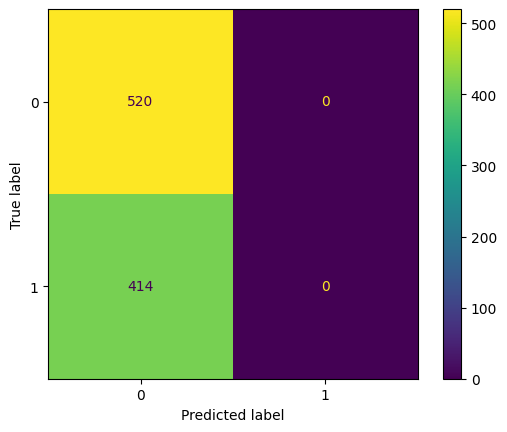

------------------------------------- ROC Plot ---------------------------------


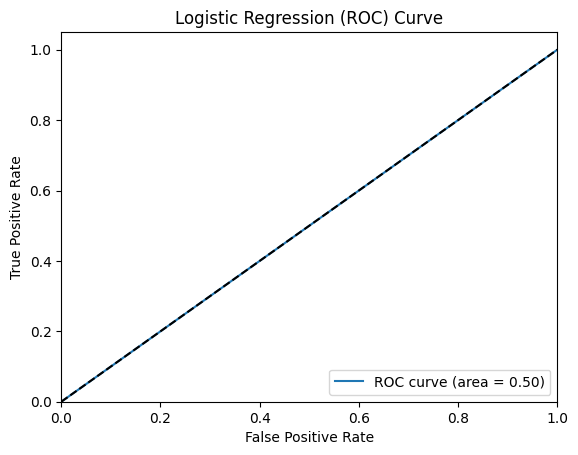

In [493]:
model = LogisticRegression()
model_prediction("Logistic Regression", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

####Ridge Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------------------Ridge Regression statistics ------------------------------
Ridge Regression Accuracy: 0.556745182012848
Ridge Regression ROC AUC score: 0.5
Ridge Regression Precision: 0.0
Ridge Regression Recall: 0.0
Ridge Regression F1-score: 0.0
---------------------------------------------------------------------------------


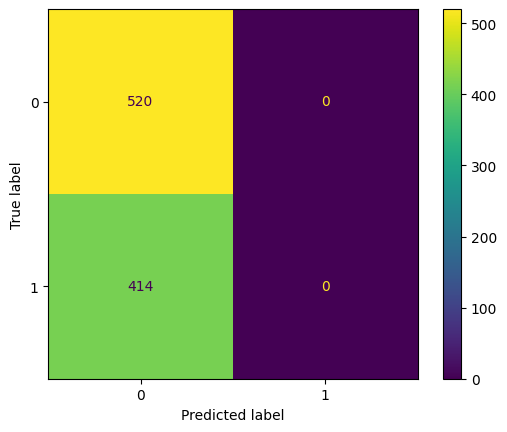

------------------------------------- ROC Plot ---------------------------------


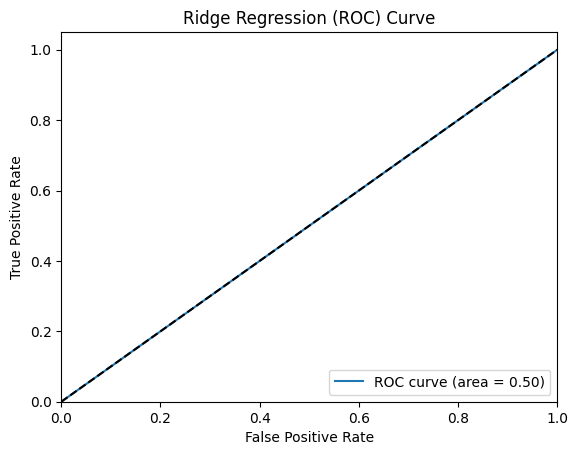

In [494]:
Model = RidgeCV(alphas=np.logspace(-4, 6, 10), cv=5)
model_prediction("Ridge Regression", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

####Decision Tree

---------------------Decision Tree Classifier statistics ------------------------------
Decision Tree Classifier Accuracy: 0.8843683083511777
Decision Tree Classifier ROC AUC score: 0.8850752508361204
Decision Tree Classifier Precision: 0.8541666666666666
Decision Tree Classifier Recall: 0.8913043478260869
Decision Tree Classifier F1-score: 0.8723404255319149
---------------------------------------------------------------------------------


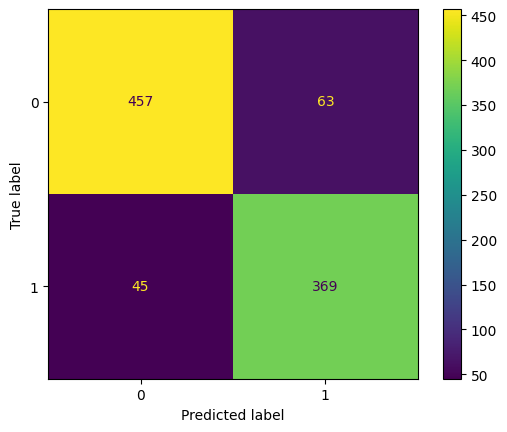

------------------------------------- ROC Plot ---------------------------------


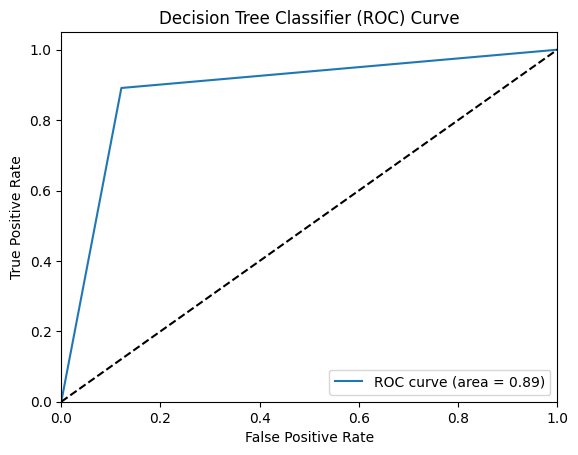

In [495]:
model = DecisionTreeClassifier()
model_prediction("Decision Tree Classifier", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

#### KNN Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


---------------------KNN statistics ------------------------------
KNN Accuracy: 0.8361884368308351
KNN ROC AUC score: 0.8403288740245263
KNN Precision: 0.7806451612903226
KNN Recall: 0.8768115942028986
KNN F1-score: 0.825938566552901
---------------------------------------------------------------------------------


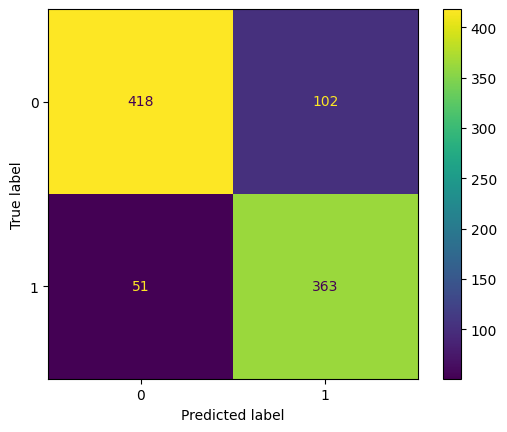

------------------------------------- ROC Plot ---------------------------------


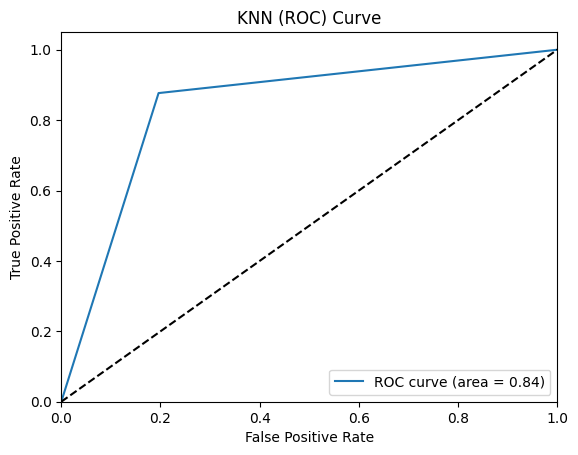

In [496]:
model = KNeighborsClassifier(n_neighbors=5)
model_prediction("KNN", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

####Random Forest Classifier

<ipython-input-333-43da2ca2b7b2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


---------------------Random Forest Classifier statistics ------------------------------
Random Forest Classifier Accuracy: 0.9036402569593148
Random Forest Classifier ROC AUC score: 0.9023829431438127
Random Forest Classifier Precision: 0.8913043478260869
Random Forest Classifier Recall: 0.8913043478260869
Random Forest Classifier F1-score: 0.8913043478260869
---------------------------------------------------------------------------------


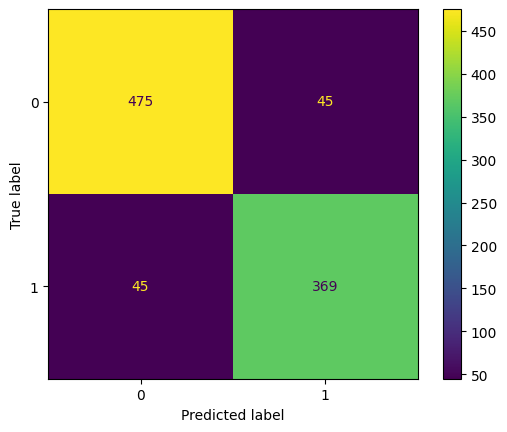

------------------------------------- ROC Plot ---------------------------------


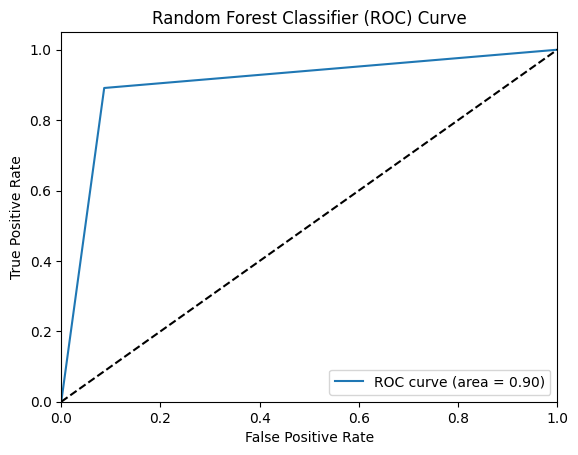

In [497]:
model = RandomForestClassifier(random_state=42)
model_prediction("Random Forest Classifier", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

####XG Boost Classifier

---------------------Random Forest Classifier statistics ------------------------------
Random Forest Classifier Accuracy: 0.8725910064239829
Random Forest Classifier ROC AUC score: 0.8695745076179859
Random Forest Classifier Precision: 0.8660049627791563
Random Forest Classifier Recall: 0.8429951690821256
Random Forest Classifier F1-score: 0.854345165238678
---------------------------------------------------------------------------------


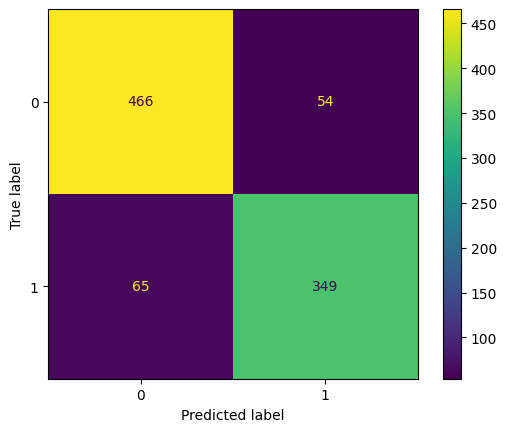

------------------------------------- ROC Plot ---------------------------------


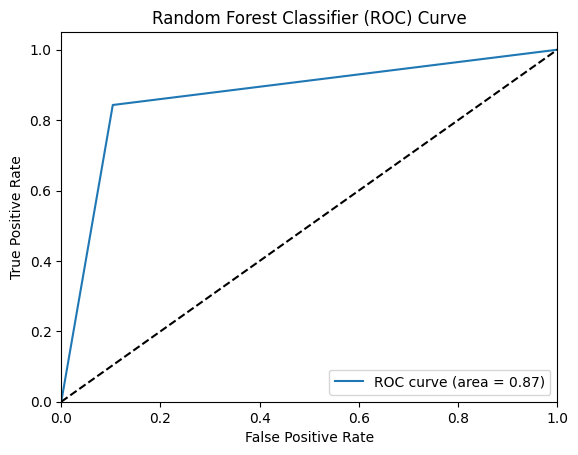

In [498]:
model = xgb.XGBClassifier()
model_prediction("Random Forest Classifier", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

####Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------Bagging Classifier statistics ------------------------------
Bagging Classifier Accuracy: 0.8993576017130621
Bagging Classifier ROC AUC score: 0.8992753623188406
Bagging Classifier Precision: 0.8773584905660378
Bagging Classifier Recall: 0.8985507246376812
Bagging Classifier F1-score: 0.8878281622911696
---------------------------------------------------------------------------------


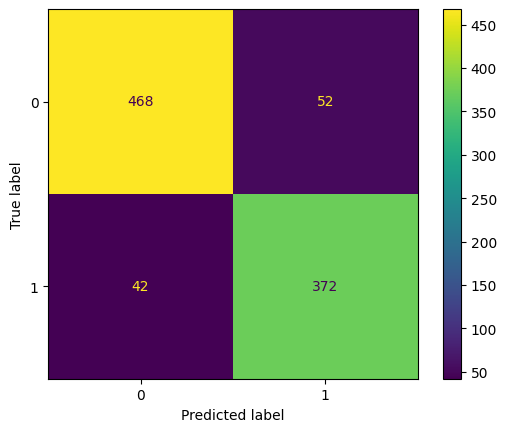

------------------------------------- ROC Plot ---------------------------------


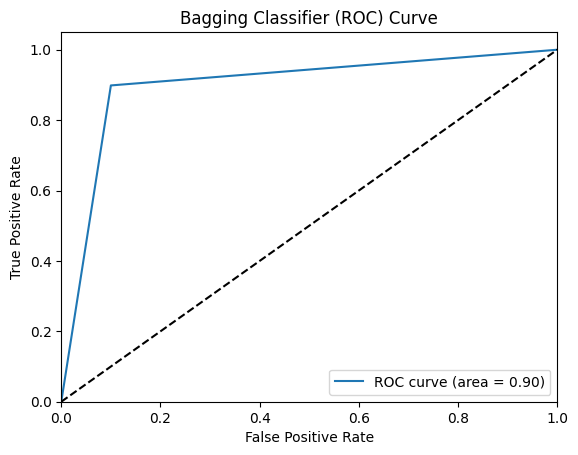

In [499]:
model = BaggingClassifier()
model_prediction("Bagging Classifier", model, X_train, y_train, X_test, y_test, stats_before_balancing_data)

# Model Comparision

In [500]:
stats_before_balancing_data

Metrics  Logistic Regression  Ridge Regression  \
0       Accuracy             0.556745          0.556745   
1  ROC AUC score             0.500000          0.500000   
2      Precision             0.000000          0.000000   
3         Recall             0.000000          0.000000   
4       F1-score             0.000000          0.000000   

   Decision Tree Classifier       KNN  Random Forest Classifier  \
0                  0.884368  0.836188                  0.872591   
1                  0.885075  0.840329                  0.869575   
2                  0.854167  0.780645                  0.866005   
3                  0.891304  0.876812                  0.842995   
4                  0.872340  0.825939                  0.854345   

   Bagging Classifier  
0            0.899358  
1            0.899275  
2            0.877358  
3            0.898551  
4            0.887828

In [501]:
stats_after_under_sampling_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.761905                  0.938488   
1  ROC AUC score             0.500000                  0.925788   
2      Precision             0.000000                  0.842466   
3         Recall             0.000000                  0.902200   
4       F1-score             0.000000                  0.871311   

   Random Forest Classifier()  Bagging Classifier()  XG Boosting Classifier  \
0                    0.931210              0.910828                0.942438   
1                    0.930997              0.910787                0.914666   
2                    0.946524              0.911917                0.884712   
3                    0.912371              0.907216                0.863081   
4                    0.929134              0.909561                0.873762   

   Random Forest Classifier  Bagging Classifier  
0                  0.949774            0.940181  
1                  0.933981            0.925178  
2                  0.880952            0.851508  
3                  0.904645            0.897311  
4                  0.892642            0.873810

In [502]:
stats_after_over_sampling_data

Metrics  Logistic Regression  Decision Tree Classifier  \
0       Accuracy             0.595645                  0.971449   
1  ROC AUC score             0.595461                  0.971411   
2      Precision             0.576670                  0.947840   
3         Recall             0.723752                  0.997894   
4       F1-score             0.641894                  0.972223   

   Random Forest Classifier  Bagging Classifier  XG Boosting Classifier  \
0                  0.971449            0.971440                0.968219   
1                  0.971411            0.971401                0.968194   
2                  0.947840            0.947824                0.952020   
3                  0.997894            0.997894                0.986234   
4                  0.972223            0.972214                0.968825   

   Logistic Regression(0.7)  Decision Tree Classifier(0.7)  \
0                  0.603722                       0.966987   
1                  0.546256                       0.970764   
2                  0.541261                       0.932074   
3                  0.225595                       0.991839   
4                  0.318458                       0.961028   

   Random Forest Classifier(0.7)  Bagging Classifier(0.7)  ...  \
0                       0.966987                 0.966987  ...   
1                       0.970764                 0.970764  ...   
2                       0.932074                 0.932074  ...   
3                       0.991839                 0.991839  ...   
4                       0.961028                 0.961028  ...   

   Logistic Regression(smote-1)  Decision Tree Classifier(smote-1)  \
0                      0.599635                           0.980530   
1                      0.599450                           0.980510   
2                      0.579742                           0.967521   
3                      0.728543                           0.994501   
4                      0.645681                           0.980826   

   Random Forest Classifier(smote-1)  Bagging Classifier(smote-1)  \
0                           0.980712                     0.980549   
1                           0.980692                     0.980529   
2                           0.967346                     0.967327   
3                           0.995070                     0.994753   
4                           0.981012                     0.980848   

   XG Boosting Classifier(smote-1)  Logistic Regression(smote-0.5)  \
0                         0.969829                        0.666465   
1                         0.969824                        0.500000   
2                         0.966124                        0.000000   
3                         0.973894                        0.000000   
4                         0.969993                        0.000000   

   Decision Tree Classifier(smote-0.5)  Random Forest Classifier(smote-0.5)  \
0                             0.975764                             0.976075   
1                             0.978831                             0.979302   
2                             0.942116                             0.942152   
3                             0.988042                             0.988993   
4                             0.964533                             0.965004   

   Bagging Classifier(smote-0.5)  XG Boosting Classifier(smote-0.5)  
0                       0.975646                           0.964576  
1                       0.978556                           0.961607  
2                       0.942427                           0.941779  
3                       0.987295                           0.952689  
4                       0.964340                           0.947202  

[5 rows x 21 columns]

In [ ]:
# Observation on above statistics
# Regardless of sampling method we see that accuracy decreases from original data because we are able to predict customer's at risk of defaulting at a more accurate rate.
# And all other complex classifiers are able to predict well on testing data which we can see by improvement in all the metrics with just a small change in accuracy.
# Sampling method shows that decision trees tend to have the best measurements.  